In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_282300/1235065739.py:27: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")


Text(0, 0.5, 'SzSz-SzSz$_{fci}$')

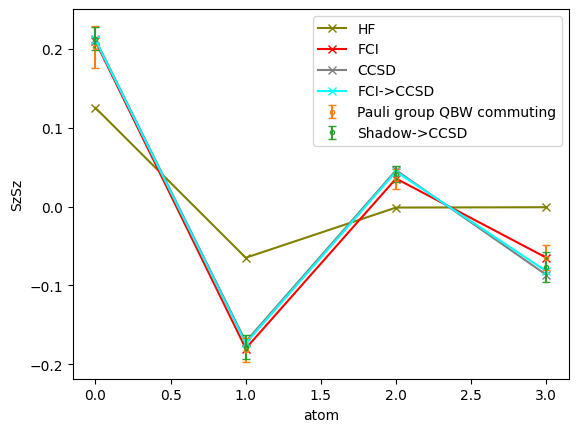

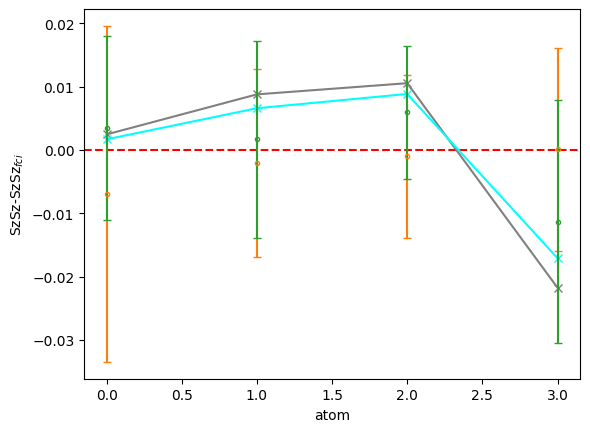

In [2]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0","1","2","3"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")

    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()

    shadow_ccsdt_mean=((data["CS_CCSDT"])).mean()
    shadow_ccsdt_std=((data["CS_CCSDT"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    shadow_ccsdt_list.append(shadow_ccsdt_mean)
    shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)


# plt.errorbar(range(4),hf_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
# plt.errorbar(range(4),hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
# plt.errorbar(range(4),pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# 
# plt.plot(c0_list,hf_list,c="C7",label="HF")   

plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
plt.plot(range(4),fci_list,c="red",marker="x",label="FCI")  
plt.plot(range(4),ccsd_list,c="grey",marker="x",label="CCSD")   


plt.plot(range(4),fci_ccsd_list,c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),shadow_ccsd_list,shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")
plt.xlabel("atom")
plt.ylabel("SzSz")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()


# plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
# plt.plot(range(4),fci_list,c="red",marker="x",label="FCI") 

plt.axhline(0.0,c="r",ls="--") 
plt.plot(range(4),[ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="grey",marker="x",label="CCSD")   


plt.plot(range(4),[fci_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),[pauli_qbw_list[x] - fci_list[x] for x in range(len(fci_list))],pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),[shadow_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")


plt.xlabel("atom")
plt.ylabel(r"SzSz-SzSz$_{fci}$")
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1456830/308966394.py:29: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_scaling/SzSz_0"+U_str+"_H_8_d_1.5_nshots_40960and_Etot_rdm_E_all_ci_fci_GS.dat", sep="\s+")


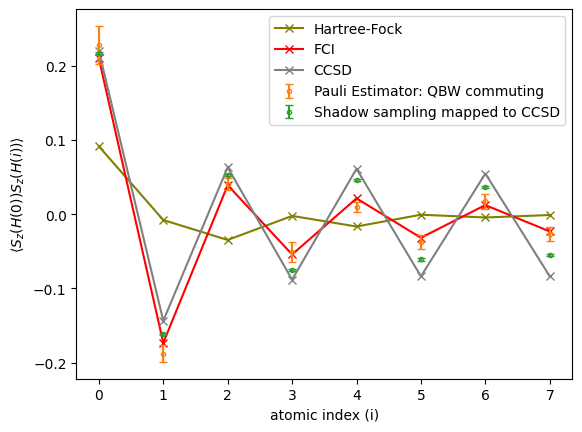

In [34]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

num_err_points = 10

data_files_list=["0","1","2","3","4","5","6","7"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("properties_scaling/SzSz_0"+U_str+"_H_8_d_1.5_nshots_40960and_Etot_rdm_E_all_ci_fci_GS.dat", sep="\s+")

    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:num_err_points].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()
    pauli_qbw_err=((data["Pauli_group_qwc"]))[:num_err_points].std()/np.sqrt(num_err_points)    

    shadow_ccsd_mean=((data["CS_CCSD"]))[:num_err_points].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()
    shadow_ccsd_err=((data["CS_CCSD"]))[:num_err_points].std()/np.sqrt(num_err_points)    

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_err)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_err)


# plt.errorbar(range(8),hf_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
# plt.errorbar(range(8),hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
# plt.errorbar(range(8),pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# 
# plt.plot(c0_list,hf_list,c="C7",label="HF")   

plt.plot(range(8),hf_list,c="olive",marker="x",label="Hartree-Fock")
plt.plot(range(8),fci_list,c="red",marker="x",label="FCI")  
plt.plot(range(8),ccsd_list,c="grey",marker="x",label="CCSD")   


# plt.plot(range(8),fci_ccsd_list,c="cyan",marker="x",label=r"FCI C$_1$,C$_2$->CCSD")
# plt.plot(range(8),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")
# plt.plot(range(8),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")

plt.errorbar(range(8),pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli Estimator: QBW commuting")
plt.errorbar(range(8),shadow_ccsd_list,shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow sampling mapped to CCSD")
# plt.errorbar(range(8),shadow_ccsdt_list,shadow_ccsdt_err_list,capsize=3.,c="C4",marker=".",mfc="none",ls="none",label="Shadow->CCSDT")
plt.xlabel("atomic index (i)")
plt.ylabel(r"$\langle S_z(H(0))S_z(H(i))\rangle$")
plt.legend()
#plt.ylim(-0.1,1.0)
plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_SzSz_Hydrogen1d_16qb_40960shots.png",bbox_inches="tight",dpi=500)







# plt.figure()


# # plt.plot(range(8),hf_list,c="olive",marker="x",label="HF")
# # plt.plot(range(8),fci_list,c="red",marker="x",label="FCI") 

# plt.axhline(0.0,c="r",ls="--") 
# plt.plot(range(8),[ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="grey",marker="x",label="CCSD")   


# plt.plot(range(8),[fci_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(8),[fci_ccsdt_list[x] - fci_list[x] for x in range(len(fci_list))],c="teal",marker="x",label="FCI->CCSDT")



# plt.errorbar(range(8),[pauli_qbw_list[x] - fci_list[x] for x in range(len(fci_list))],pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.errorbar(range(8),[shadow_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")


# # plt.errorbar(range(8),[pauli_qbw_list[x] - fci_list[x] for x in range(len(fci_list))],pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
# # plt.errorbar(range(8),[shadow_ccsdt_list[x] - fci_list[x] for x in range(len(fci_list))],shadow_ccsdt_err_list,capsize=3.,c="C4",marker=".",mfc="none",ls="none",label="Shadow->CCSDT")


# plt.xlabel("atom")
# plt.ylabel(r"SzSz-SzSz$_{fci}$")
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2024685/3239467796.py:45: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2.dat", sep="\s+")


len:  3512
len:  2612
len:  3493
len:  3920
len:  1752
len:  2184
len:  940
len:  737
len:  751
len:  555
len:  372
len:  189
[np.float64(-0.9985643411710816), np.float64(-0.9981958854426415), np.float64(-0.9984264079498409), np.float64(-0.998054263164123), np.float64(-0.9978924651065384), np.float64(-0.9980246732525816), np.float64(-0.9982469005980823), np.float64(-0.9980025072807832), np.float64(-0.9980049927360999), np.float64(-0.9980221362015453), np.float64(-0.9982589455804308), np.float64(-0.9981525228905109)]
-0.9981493534714098


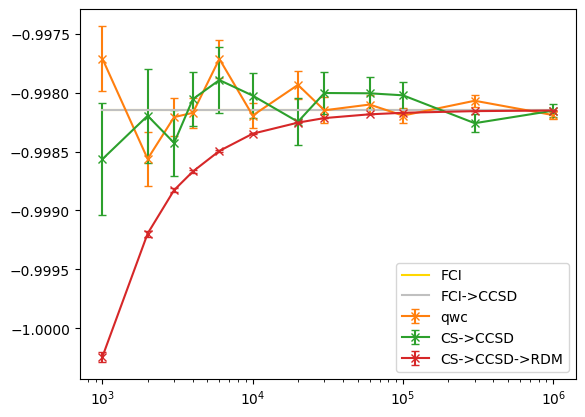

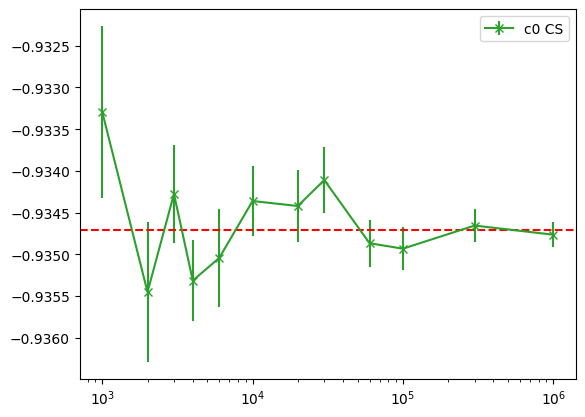

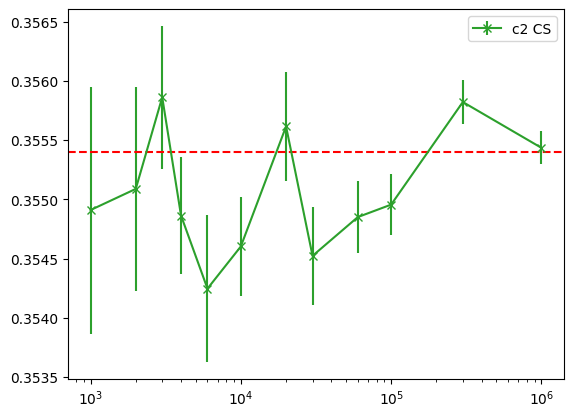

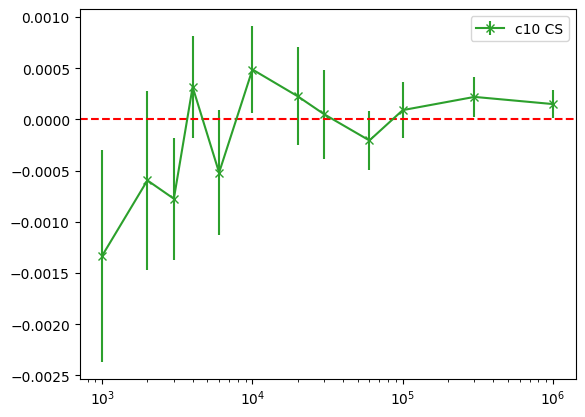

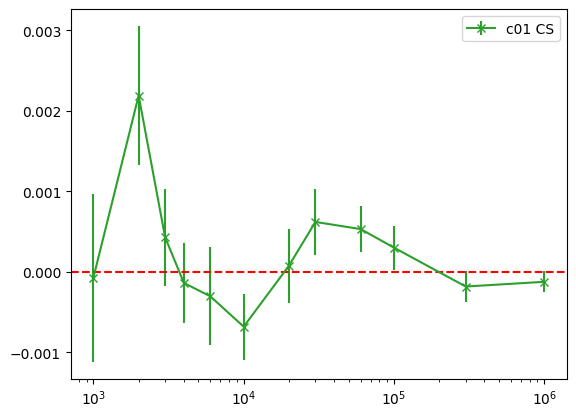

In [3]:
shots_list=[1000,2000,3000,4000,6000,10000,20000,30000,60000,100000,300000,1000000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_std_list = []
e_shadow_ccsd_rdm_std_list = []
e_pauli_qbw_std_list = []

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []

e_proj_list= []
e_proj_std_list= []

c0_list = []
c0_std_list = []
c0_err_list = []

c01_list = []
c01_std_list = []
c01_err_list = []

c10_list = []
c10_std_list = []
c10_err_list = []

c2_list = []
c2_std_list = []
c2_err_list = []

for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)

    e_proj_list.append(((data["e_proj"]))[:].mean())
    e_proj_std_list.append(((data["e_proj"]))[:].std())

    c0_list.append(((data["c0"]))[:].mean())
    c0_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_std_list.append(((data["c0"]))[:].std())

    c01_list.append(((data["c01"]))[:].mean())
    c01_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_std_list.append(((data["c01"]))[:].std())

    c10_list.append(((data["c10"]))[:].mean())
    c10_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_std_list.append(((data["c10"]))[:].std())

    c2_list.append(((data["c2"]))[:].mean())
    c2_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_std_list.append(((data["c2"]))[:].std())
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_std_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_std_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_std_list.append(pauli_qbw_std)

    e_shadow_ccsd_err_list.append(((data["qwc_rdm_energy"]))[:].std()/np.sqrt(len(data["qwc_rdm_energy"])))
    e_shadow_ccsd_rdm_err_list.append(((data["cs_sd_rdm_energy"]))[:].std()/np.sqrt(len(data["cs_sd_rdm_energy"])))
    e_pauli_qbw_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))



# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[:],e_pauli_qbw_list[:],e_pauli_qbw_std_list[:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_list[:],e_shadow_ccsd_std_list[:],color="C2",marker="x",label="CS->CCSD")   
# # plt.errorbar(shots_list[:],e_proj_list[:],e_proj_std_list[:],color="C4",marker="x",label="CS->CCSD proj")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_rdm_list[:],e_shadow_ccsd_rdm_std_list[:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[:],e_fci_list[:],color="gold",label="FCI")
# plt.plot(shots_list[:],e_fci_ccsd_list[:],color="silver",label="FCI->CCSD")
# # plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


# plt.xscale("log")
# plt.legend()

# plt.figure()

# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_std_list[2:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_std_list[2:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_std_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
# plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.xscale("log")
# plt.legend()

# plt.figure()
plot_start=0
# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[plot_start:],e_pauli_qbw_list[plot_start:],e_pauli_qbw_err_list[plot_start:],capsize=3., color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_list[plot_start:],e_shadow_ccsd_err_list[plot_start:],capsize=3., color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[:],e_proj_list[:],color="C4",marker="x",label="CS->CCSD proj")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_rdm_list[plot_start:],e_shadow_ccsd_rdm_err_list[plot_start:],capsize=3., color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[plot_start:],e_fci_list[plot_start:],color="gold",label="FCI")
plt.plot(shots_list[plot_start:],e_fci_ccsd_list[plot_start:],color="silver",label="FCI->CCSD")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c0_list[plot_start:],c0_err_list[plot_start:],color="C2",marker="x",label="c0 CS")   
plt.axhline(-0.9347130554017394,c="r",ls="--")
plt.xscale("log")
plt.legend()

plt.figure()
plt.errorbar(shots_list[plot_start:],c2_list[plot_start:],c2_err_list[plot_start:],color="C2",marker="x",label="c2 CS")   
plt.axhline(0.3554032977640258,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c10_list[plot_start:],c10_err_list[plot_start:],color="C2",marker="x",label="c10 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c01_list[plot_start:],c01_err_list[plot_start:],color="C2",marker="x",label="c01 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()



# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list)
print(fci_mean)


<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2024685/3521053223.py:45: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2.dat", sep="\s+")


len:  564
len:  438
len:  341
len:  343
len:  216
len:  106
len:  115
[np.float64(-1.9964401927254511), np.float64(-1.9968527573298833), np.float64(-1.9959281221737852), np.float64(-1.9961989027210985), np.float64(-1.9957719077478673), np.float64(-1.9973276688830155), np.float64(-1.9963781345953593)]
-1.9961503255188084


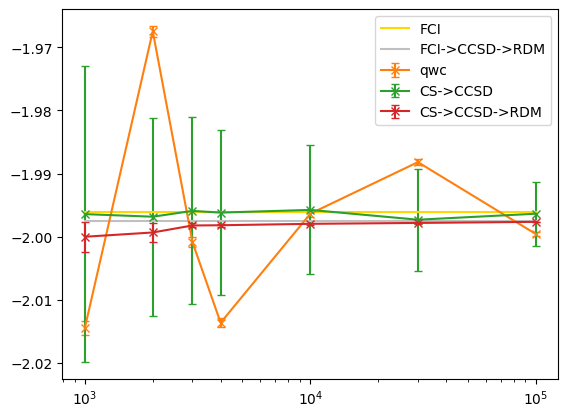

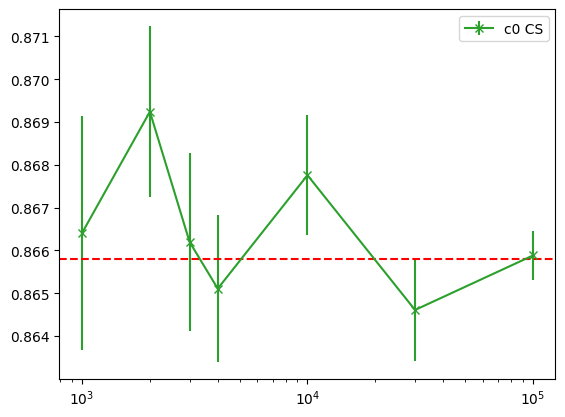

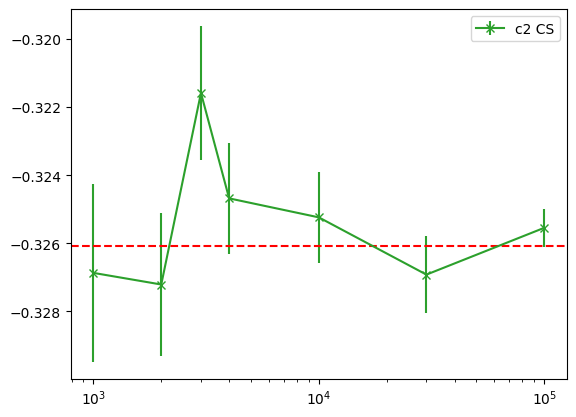

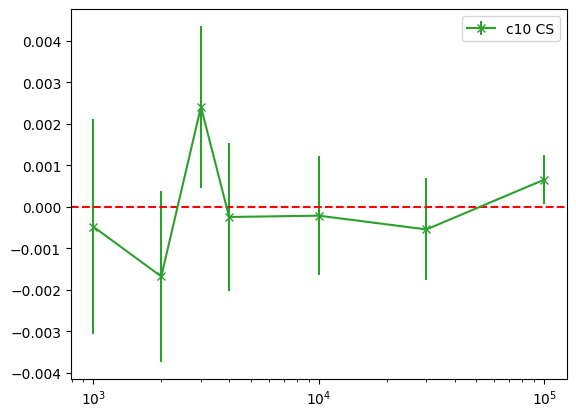

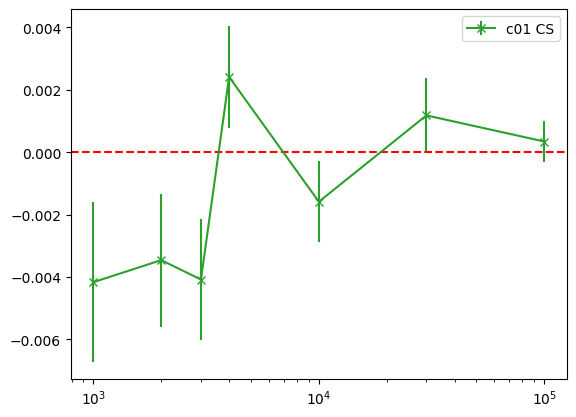

In [9]:
shots_list=[1000,2000,3000,4000,10000,30000,100000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_std_list = []
e_shadow_ccsd_rdm_std_list = []
e_pauli_qbw_std_list = []

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []

e_proj_list= []
e_proj_std_list= []

c0_list = []
c0_std_list = []
c0_err_list = []

c01_list = []
c01_std_list = []
c01_err_list = []

c10_list = []
c10_std_list = []
c10_err_list = []

c2_list = []
c2_std_list = []
c2_err_list = []

for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)

    e_proj_list.append(((data["e_proj"]))[:].mean())
    e_proj_std_list.append(((data["e_proj"]))[:].std())

    c0_list.append(((data["c0"]))[:].mean())
    c0_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_std_list.append(((data["c0"]))[:].std())

    c01_list.append(((data["c01"]))[:].mean())
    c01_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_std_list.append(((data["c01"]))[:].std())

    c10_list.append(((data["c10"]))[:].mean())
    c10_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_std_list.append(((data["c10"]))[:].std())

    c2_list.append(((data["c2"]))[:].mean())
    c2_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_std_list.append(((data["c2"]))[:].std())
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_std_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_std_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_std_list.append(pauli_qbw_std)

    e_shadow_ccsd_err_list.append(((data["qwc_rdm_energy"]))[:].std()/np.sqrt(len(data["qwc_rdm_energy"])))
    e_shadow_ccsd_rdm_err_list.append(((data["cs_sd_rdm_energy"]))[:].std()/np.sqrt(len(data["cs_sd_rdm_energy"])))
    e_pauli_qbw_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))



# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[:],e_pauli_qbw_list[:],e_pauli_qbw_std_list[:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_list[:],e_shadow_ccsd_std_list[:],color="C2",marker="x",label="CS->CCSD")   
# # plt.errorbar(shots_list[:],e_proj_list[:],e_proj_std_list[:],color="C4",marker="x",label="CS->CCSD proj")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_rdm_list[:],e_shadow_ccsd_rdm_std_list[:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[:],e_fci_list[:],color="gold",label="FCI")
# plt.plot(shots_list[:],e_fci_ccsd_list[:],color="silver",label="FCI->CCSD")
# # plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


# plt.xscale("log")
# plt.legend()

# plt.figure()

# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_std_list[2:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_std_list[2:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_std_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
# plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.xscale("log")
# plt.legend()

# plt.figure()
plot_start=0
# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[plot_start:],e_pauli_qbw_list[plot_start:],e_pauli_qbw_err_list[plot_start:],capsize=3., color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_list[plot_start:],e_shadow_ccsd_err_list[plot_start:],capsize=3., color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[:],e_proj_list[:],color="C4",marker="x",label="CS->CCSD proj")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_rdm_list[plot_start:],e_shadow_ccsd_rdm_err_list[plot_start:],capsize=3., color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[plot_start:],e_fci_list[plot_start:],color="gold",label="FCI")
# plt.plot(shots_list[plot_start:],e_fci_ccsd_list[plot_start:],color="silver",label="FCI->CCSD")
plt.plot(shots_list[plot_start:],e_fci_ccsd_rdm_list[plot_start:],color="silver",label="FCI->CCSD->RDM")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c0_list[plot_start:],c0_err_list[plot_start:],color="C2",marker="x",label="c0 CS")   
plt.axhline(8.65800092e-01,c="r",ls="--")
plt.xscale("log")
plt.legend()

plt.figure()
plt.errorbar(shots_list[plot_start:],c2_list[plot_start:],c2_err_list[plot_start:],color="C2",marker="x",label="c2 CS")   
plt.axhline(-3.26078370e-01,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c10_list[plot_start:],c10_err_list[plot_start:],color="C2",marker="x",label="c10 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c01_list[plot_start:],c01_err_list[plot_start:],color="C2",marker="x",label="c01 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()



# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list)
print(fci_mean)


<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1456830/574034689.py:54: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(f_name, sep="\s+")


len:  150
len:  149
len:  150
len:  150


<ErrorbarContainer object of 3 artists>

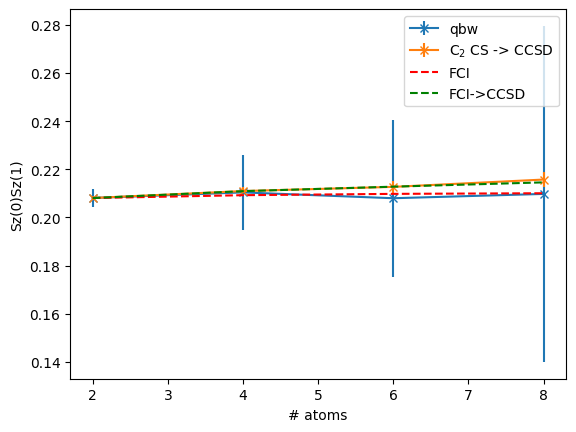

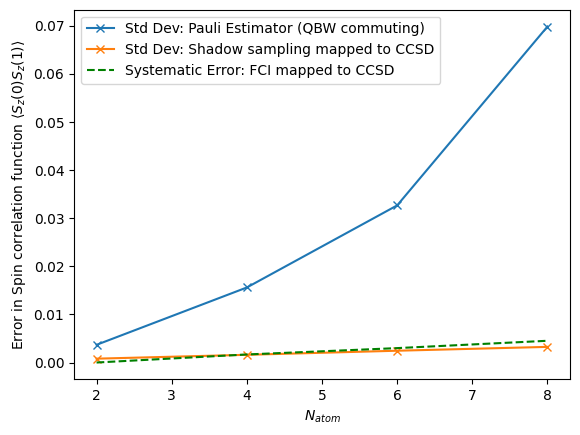

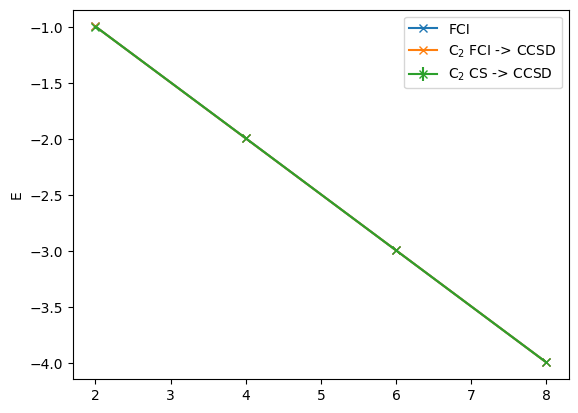

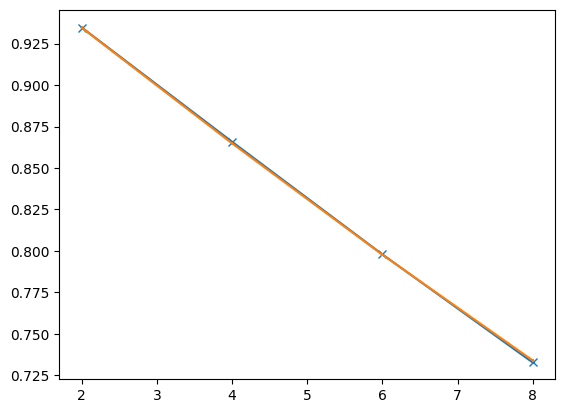

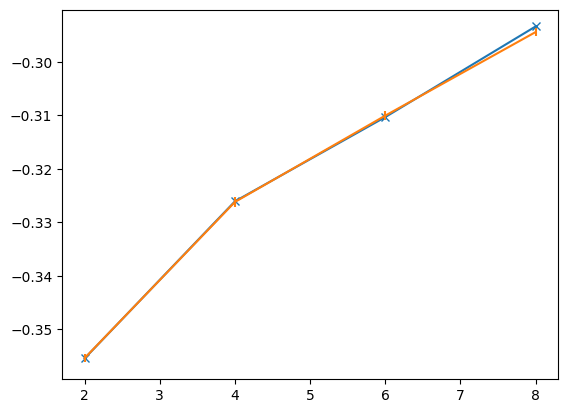

In [36]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


atoms_list=[2,4,6,8]

e_fci_list=[]
e_fci_ccsd_list=[]
e_cs_ccsd_list=[] 
e_cs_ccsd_err_list=[] 

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


c0_cs_list = []
c0_cs_std_list = []
c0_cs_err_list = []

c01_cs_list = []
c01_cs_std_list = []
c01_cs_err_list = []

c10_cs_list = []
c10_cs_std_list = []
c10_cs_err_list = []

c2_cs_list = []
c2_cs_std_list = []
c2_cs_err_list = []

for n in atoms_list:
    # f_name = "properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2_update.dat"
    # if os.path.isfile(f_name):
    #     print("YES")
    #     data = pd.read_csv(f_name, sep="\s+")
    # else:
    f_name = "properties_scaling/SzSz_00_H_"+str(n)+"_d_1.5_nshots_40960and_Etot_rdm_E_all_ci_fci_GS.dat"
    if os.path.isfile(f_name):
        data = pd.read_csv(f_name, sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(len(data["Pauli_group_qwc"]))

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(len(data["CS_CCSD"]))#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

        

    e_fci_list.append(((data["e_fci"]))[:].mean())
    e_fci_ccsd_list.append(((data["e_fci_ccsd"]))[:].mean())
    e_cs_ccsd_list.append(((data["e_cs_ccsd"]))[:].mean())
    e_cs_ccsd_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))
    
    c0_cs_list.append(((data["c0"]))[:].mean())
    c0_cs_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_cs_std_list.append(((data["c0"]))[:].std())

    c01_cs_list.append(((data["c01"]))[:].mean())
    c01_cs_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_cs_std_list.append(((data["c01"]))[:].std())

    c10_cs_list.append(((data["c10"]))[:].mean())
    c10_cs_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_cs_std_list.append(((data["c10"]))[:].std())

    c2_cs_list.append(((data["c2"]))[:].mean())
    c2_cs_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_cs_std_list.append(((data["c2"]))[:].std())

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
# plt.plot(atoms_list,pauli_qbw_list,marker="x",label="qbw")   
# plt.plot(atoms_list,shadow_ccsd_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
# plt.ylim(0.13,0.27)
plt.legend()
plt.xlabel("# atoms")
plt.ylabel(r"Sz(0)Sz(1)")

plt.figure()

plt.plot(atoms_list,pauli_qbw_err_list,marker="x",label=r"Std Dev: Pauli Estimator (QBW commuting)")
plt.plot(atoms_list,shadow_ccsd_err_list,marker="x",label=r"Std Dev: Shadow sampling mapped to CCSD")
plt.plot(atoms_list,[abs(fci_ccsd_list[x] - fci_list[x]) for x in range(len(fci_list))],c="g",ls="--",label=r"Systematic Error: FCI mapped to CCSD")

plt.xlabel(r"$N_{atom}$")
plt.ylabel(r"Error in Spin correlation function $\langle S_z(0)S_z(1)\rangle$")
plt.legend()
plt.savefig("../figures/figures_for_CS_paper/SzSz_scaling_40960_shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.plot(atoms_list,e_fci_list,marker="x",label="FCI")
plt.plot(atoms_list,e_fci_ccsd_list,marker="x",label=r"C$_2$ FCI -> CCSD")
plt.errorbar(atoms_list,e_cs_ccsd_list,e_cs_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.ylabel("E")
plt.legend()

plt.figure()

plt.plot(atoms_list,[np.float64(0.9347130554017395),
  np.float64(0.865800091977417),
  np.float64(0.7978995214713848),
  np.float64(0.7326922908599751)],marker="x",label="FCI")
plt.errorbar(atoms_list,c0_cs_list,c0_cs_err_list)  

plt.figure()

plt.plot(atoms_list,[np.float64(-0.3554032977640255),np.float64(-0.32607836959718733),np.float64(-0.31034744933527036),  np.float64(-0.2934250221926759)],marker="x",label="FCI")
plt.errorbar(atoms_list,c2_cs_list,c2_cs_err_list)
 

len:  150
len:  149
len:  150
len:  150


<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:53: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2216201/2453024239.py:53: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(f_name, sep="\s+")


<ErrorbarContainer object of 3 artists>

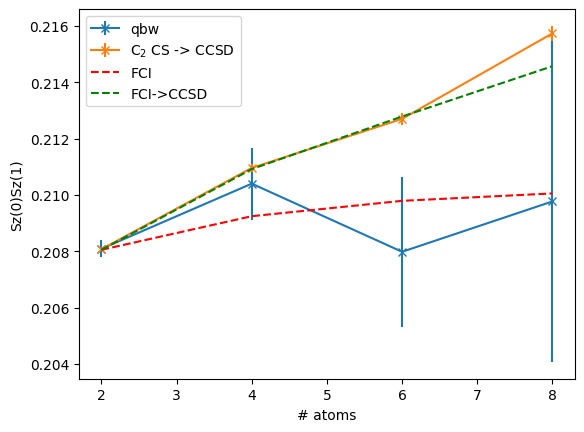

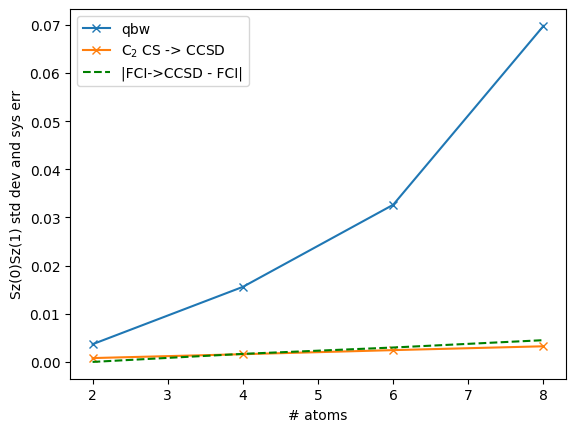

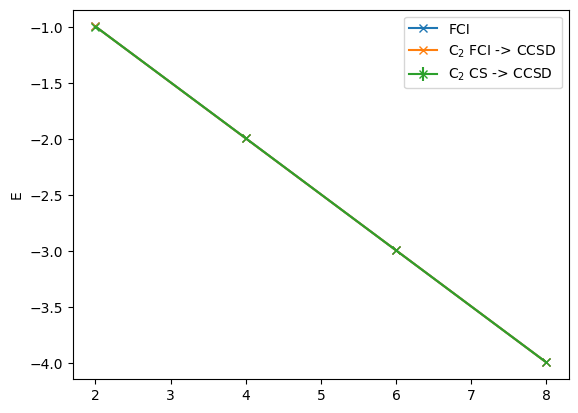

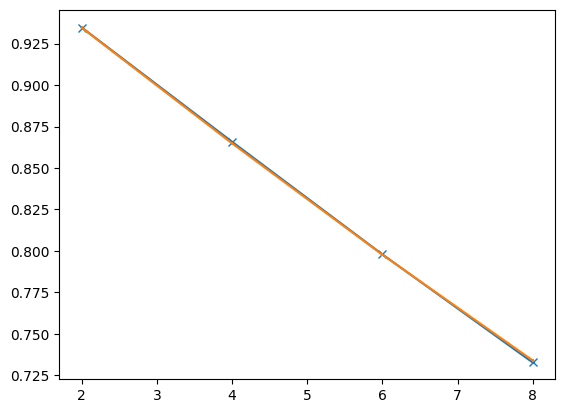

In [12]:
import os.path


atoms_list=[2,4,6,8]

e_fci_list=[]
e_fci_ccsd_list=[]
e_cs_ccsd_list=[] 
e_cs_ccsd_err_list=[] 

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsd_std_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []
pauli_qbw_std_list = []


c0_cs_list = []
c0_cs_std_list = []
c0_cs_err_list = []

c01_cs_list = []
c01_cs_std_list = []
c01_cs_err_list = []

c10_cs_list = []
c10_cs_std_list = []
c10_cs_err_list = []

c2_cs_list = []
c2_cs_std_list = []
c2_cs_err_list = []

for n in atoms_list:
    # f_name = "properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2_update.dat"
    # if os.path.isfile(f_name):
    #     print("YES")
    #     data = pd.read_csv(f_name, sep="\s+")
    # else:
    f_name = "properties_scaling/SzSz_00_H_"+str(n)+"_d_1.5_nshots_40960and_Etot_rdm_E_all_ci_fci_GS.dat"
    if os.path.isfile(f_name):
        data = pd.read_csv(f_name, sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()/np.sqrt(len(data["Pauli_group_qwc"]))

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()/np.sqrt(len(data["CS_CCSD"]))#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)
    shadow_ccsd_std_list.append(((data["CS_CCSD"]))[:].std())
        
    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
    pauli_qbw_std_list.append(((data["Pauli_group_qwc"]))[:].std())
        

    e_fci_list.append(((data["e_fci"]))[:].mean())
    e_fci_ccsd_list.append(((data["e_fci_ccsd"]))[:].mean())
    e_cs_ccsd_list.append(((data["e_cs_ccsd"]))[:].mean())
    e_cs_ccsd_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))
    
    c0_cs_list.append(((data["c0"]))[:].mean())
    c0_cs_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_cs_std_list.append(((data["c0"]))[:].std())

    c01_cs_list.append(((data["c01"]))[:].mean())
    c01_cs_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_cs_std_list.append(((data["c01"]))[:].std())

    c10_cs_list.append(((data["c10"]))[:].mean())
    c10_cs_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_cs_std_list.append(((data["c10"]))[:].std())

    c2_cs_list.append(((data["c2"]))[:].mean())
    c2_cs_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_cs_std_list.append(((data["c2"]))[:].std())

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
# plt.plot(atoms_list,pauli_qbw_list,marker="x",label="qbw")   
# plt.plot(atoms_list,shadow_ccsd_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
# plt.ylim(0.13,0.27)
plt.legend()
plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1)")

plt.figure()

plt.plot(atoms_list,pauli_qbw_std_list,marker="x",label="qbw")
plt.plot(atoms_list,shadow_ccsd_std_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.plot(atoms_list,[abs(fci_ccsd_list[x] - fci_list[x]) for x in range(len(fci_list))],c="g",ls="--",label="|FCI->CCSD - FCI|")

plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1) std dev and sys err")
plt.legend()

plt.figure()

plt.plot(atoms_list,e_fci_list,marker="x",label="FCI")
plt.plot(atoms_list,e_fci_ccsd_list,marker="x",label=r"C$_2$ FCI -> CCSD")
plt.errorbar(atoms_list,e_cs_ccsd_list,e_cs_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.ylabel("E")
plt.legend()

plt.figure()

plt.plot(atoms_list,[np.float64(0.9347130554017395),
  np.float64(0.865800091977417),
  np.float64(0.7978995214713848),
  np.float64(0.7326922908599751)
  ],
  marker="x",label="FCI")
plt.errorbar(atoms_list,c0_cs_list,c0_cs_err_list)  

# plt.figure()

# plt.plot(atoms_list,[np.float64(-0.3554032977640255),np.float64(-0.32607836959718733),np.float64(-0.31034744933527036),  np.float64(-0.2934250221926759)],marker="x",label="FCI")
# plt.errorbar(atoms_list,c2_cs_list,c2_cs_err_list)
 

len:  100
len:  100
len:  100
len:  100


<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:53: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_383132/140002875.py:53: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(f_name, sep="\s+")


<ErrorbarContainer object of 3 artists>

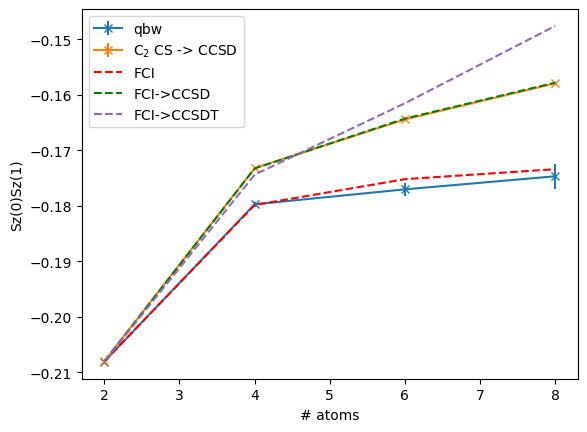

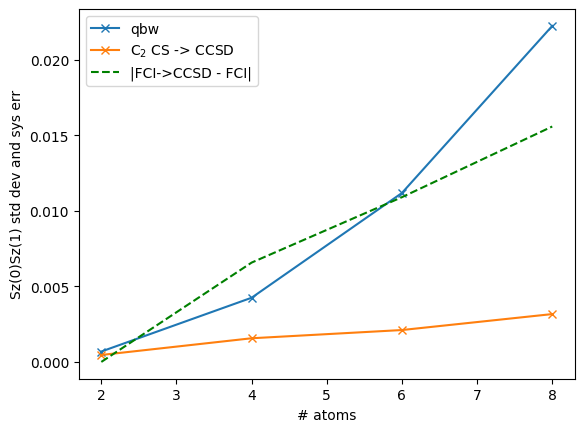

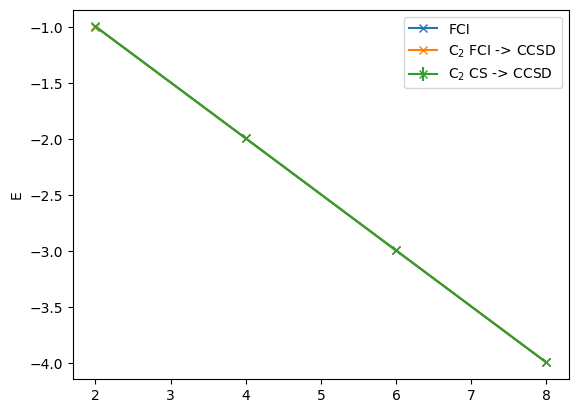

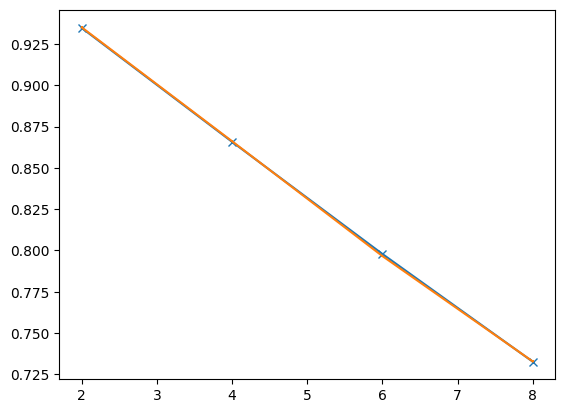

In [3]:
import os.path


atoms_list=[2,4,6,8]

e_fci_list=[]
e_fci_ccsd_list=[]
e_cs_ccsd_list=[] 
e_cs_ccsd_err_list=[] 

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsd_std_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []
pauli_qbw_std_list = []


c0_cs_list = []
c0_cs_std_list = []
c0_cs_err_list = []

c01_cs_list = []
c01_cs_std_list = []
c01_cs_err_list = []

c10_cs_list = []
c10_cs_std_list = []
c10_cs_err_list = []

c2_cs_list = []
c2_cs_std_list = []
c2_cs_err_list = []

for n in atoms_list:
    # f_name = "properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2_update.dat"
    # if os.path.isfile(f_name):
    #     print("YES")
    #     data = pd.read_csv(f_name, sep="\s+")
    # else:
    f_name = "properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_102400and_Etot_rdm_E_all_ci_fci_GS.dat"
    if os.path.isfile(f_name):
        data = pd.read_csv(f_name, sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()/np.sqrt(len(data["Pauli_group_qwc"]))

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()/np.sqrt(len(data["CS_CCSD"]))#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)
    shadow_ccsd_std_list.append(((data["CS_CCSD"]))[:].std())
        
    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
    pauli_qbw_std_list.append(((data["Pauli_group_qwc"]))[:].std())
        

    e_fci_list.append(((data["e_fci"]))[:].mean())
    e_fci_ccsd_list.append(((data["e_fci_ccsd"]))[:].mean())
    e_cs_ccsd_list.append(((data["e_cs_ccsd"]))[:].mean())
    e_cs_ccsd_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))
    
    c0_cs_list.append(((data["c0"]))[:].mean())
    c0_cs_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_cs_std_list.append(((data["c0"]))[:].std())

    c01_cs_list.append(((data["c01"]))[:].mean())
    c01_cs_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_cs_std_list.append(((data["c01"]))[:].std())

    c10_cs_list.append(((data["c10"]))[:].mean())
    c10_cs_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_cs_std_list.append(((data["c10"]))[:].std())

    c2_cs_list.append(((data["c2"]))[:].mean())
    c2_cs_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_cs_std_list.append(((data["c2"]))[:].std())

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
# plt.plot(atoms_list,pauli_qbw_list,marker="x",label="qbw")   
# plt.plot(atoms_list,shadow_ccsd_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
plt.errorbar(atoms_list,fci_ccsdt_list,c="C4",ls="--",label="FCI->CCSDT")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
# plt.ylim(0.13,0.27)
plt.legend()
plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1)")

plt.figure()

plt.plot(atoms_list,pauli_qbw_std_list,marker="x",label="qbw")
plt.plot(atoms_list,shadow_ccsd_std_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.plot(atoms_list,[abs(fci_ccsd_list[x] - fci_list[x]) for x in range(len(fci_list))],c="g",ls="--",label="|FCI->CCSD - FCI|")

plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1) std dev and sys err")
plt.legend()

plt.figure()

plt.plot(atoms_list,e_fci_list,marker="x",label="FCI")
plt.plot(atoms_list,e_fci_ccsd_list,marker="x",label=r"C$_2$ FCI -> CCSD")
plt.errorbar(atoms_list,e_cs_ccsd_list,e_cs_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.ylabel("E")
plt.legend()

plt.figure()

plt.plot(atoms_list,[np.float64(0.9347130554017395),
  np.float64(0.865800091977417),
  np.float64(0.7978995214713848),
  np.float64(0.7326922908599751)
  ],
  marker="x",label="FCI")
plt.errorbar(atoms_list,c0_cs_list,c0_cs_err_list)  

# plt.figure()

# plt.plot(atoms_list,[np.float64(-0.3554032977640255),np.float64(-0.32607836959718733),np.float64(-0.31034744933527036),  np.float64(-0.2934250221926759)],marker="x",label="FCI")
# plt.errorbar(atoms_list,c2_cs_list,c2_cs_err_list)
 

<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3259999/1308631737.py:51: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(f_name, sep="\s+")


len:  649
len:  250
len:  150
len:  181
len:  100


<ErrorbarContainer object of 3 artists>

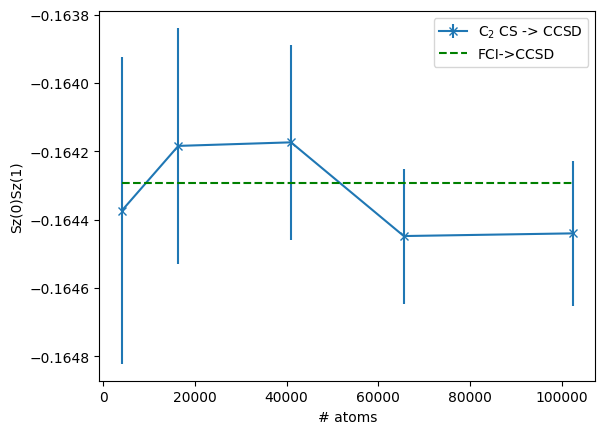

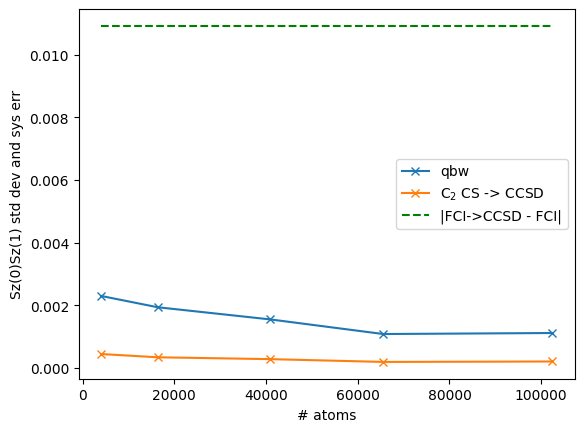

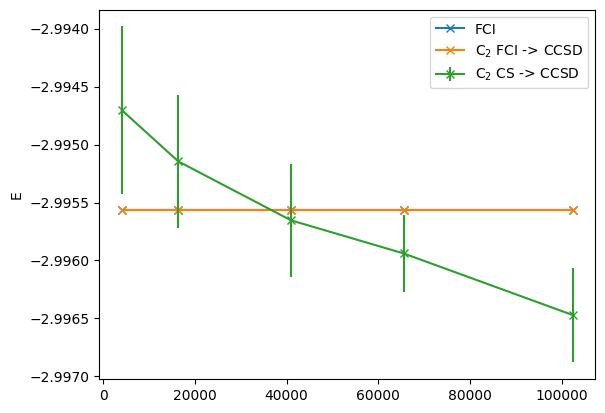

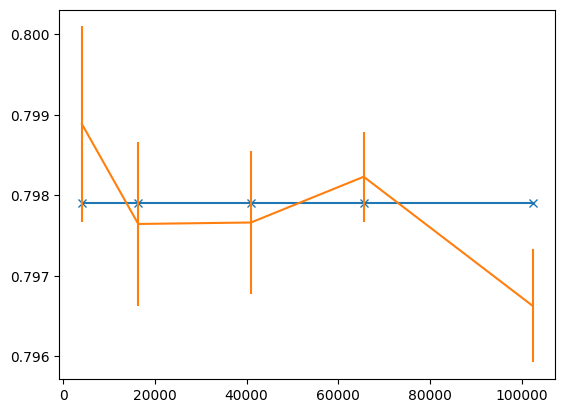

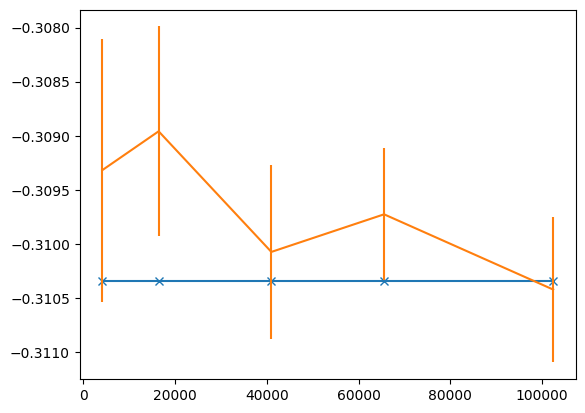

In [7]:
import os.path


atoms_list=[4096,16384,40960,65536,102400]

e_fci_list=[]
e_fci_ccsd_list=[]
e_cs_ccsd_list=[] 
e_cs_ccsd_err_list=[] 

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


c0_cs_list = []
c0_cs_std_list = []
c0_cs_err_list = []

c01_cs_list = []
c01_cs_std_list = []
c01_cs_err_list = []

c10_cs_list = []
c10_cs_std_list = []
c10_cs_err_list = []

c2_cs_list = []
c2_cs_std_list = []
c2_cs_err_list = []

for n in atoms_list:
    # f_name = "properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_E_all_ci_qwc_and_ac_cliff_fix_w_c0_2_update.dat"
    # if os.path.isfile(f_name):
    #     print("YES")
    #     data = pd.read_csv(f_name, sep="\s+")
    # else:
    f_name = "properties_scaling/SzSz_01_H_6_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_fci_GS.dat"
    # if os.path.isfile(f_name):
    data = pd.read_csv(f_name, sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()/np.sqrt(len(data["Pauli_group_qwc"]))

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()/np.sqrt(len(data["CS_CCSD"]))#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

        

    e_fci_list.append(((data["e_fci"]))[:].mean())
    e_fci_ccsd_list.append(((data["e_fci_ccsd"]))[:].mean())
    e_cs_ccsd_list.append(((data["e_cs_ccsd"]))[:].mean())
    e_cs_ccsd_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))
    
    c0_cs_list.append(((data["c0"]))[:].mean())
    c0_cs_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_cs_std_list.append(((data["c0"]))[:].std())

    c01_cs_list.append(((data["c01"]))[:].mean())
    c01_cs_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_cs_std_list.append(((data["c01"]))[:].std())

    c10_cs_list.append(((data["c10"]))[:].mean())
    c10_cs_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_cs_std_list.append(((data["c10"]))[:].std())

    c2_cs_list.append(((data["c2"]))[:].mean())
    c2_cs_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_cs_std_list.append(((data["c2"]))[:].std())

# print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
# plt.plot(atoms_list,pauli_qbw_list,marker="x",label="qbw")   
# plt.plot(atoms_list,shadow_ccsd_list,marker="x",label=r"C$_2$ CS -> CCSD")   
# plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
# plt.ylim(0.13,0.27)
plt.legend()
plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1)")

plt.figure()

plt.plot(atoms_list,pauli_qbw_err_list,marker="x",label="qbw")
plt.plot(atoms_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.plot(atoms_list,[abs(fci_ccsd_list[x] - fci_list[x]) for x in range(len(fci_list))],c="g",ls="--",label="|FCI->CCSD - FCI|")

plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1) std dev and sys err")
plt.legend()

plt.figure()

plt.plot(atoms_list,e_fci_list,marker="x",label="FCI")
plt.plot(atoms_list,e_fci_ccsd_list,marker="x",label=r"C$_2$ FCI -> CCSD")
plt.errorbar(atoms_list,e_cs_ccsd_list,e_cs_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.ylabel("E")
plt.legend()

plt.figure()

plt.plot(atoms_list,[  np.float64(0.7978995214713848)]*len(atoms_list),marker="x",label="FCI")
plt.errorbar(atoms_list,c0_cs_list,c0_cs_err_list)  

plt.figure()

plt.plot(atoms_list,[np.float64(-0.31034744933527036)]*len(atoms_list),marker="x",label="FCI")
plt.errorbar(atoms_list,c2_cs_list,c2_cs_err_list)
 

In [8]:
print(e_fci_list)
print(e_fci_ccsd_list)
print(e_fci_ccsd_rdm_list)

[np.float64(-1.9961503255188087), np.float64(-1.9961503255188084), np.float64(-1.9961503255188087), np.float64(-1.9961503255188087), np.float64(-1.9961503255188082), np.float64(-1.9961503255188084), np.float64(-1.9961503255188084)]
[np.float64(-1.9961503255188087), np.float64(-1.9961503255188084), np.float64(-1.9961503255188087), np.float64(-1.9961503255188087), np.float64(-1.9961503255188082), np.float64(-1.9961503255188084), np.float64(-1.9961503255188084)]
[np.float64(-1.9975995854388016), np.float64(-1.997599585438802), np.float64(-1.9975995854388018), np.float64(-1.9975995854388016), np.float64(-1.9975995854388022), np.float64(-1.997599585438802), np.float64(-1.997599585438802)]


<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_122330/4122637282.py:45: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix_w_c0_2.dat", sep="\s+")


len:  449
len:  1398
len:  549
len:  1771
len:  548
len:  1400
len:  1148
len:  825
len:  825
len:  825
len:  825
len:  200
len:  50
[np.float64(-0.9995859659554793), np.float64(-0.9973840697968965), np.float64(-0.9980670625474396), np.float64(-0.9976578067918652), np.float64(-0.9975515704514883), np.float64(-0.998142672997509), np.float64(-0.9978512776551498), np.float64(-0.9980463809828559), np.float64(-0.9978011941906438), np.float64(-0.997913828391655), np.float64(-0.9978439366226098), np.float64(-0.997733553924449), np.float64(-0.9978039479499502)]
-0.99814935347141


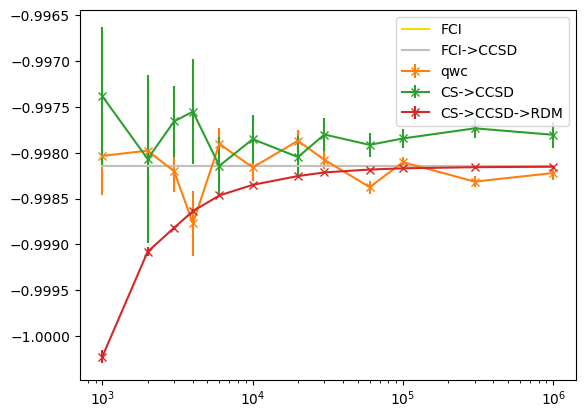

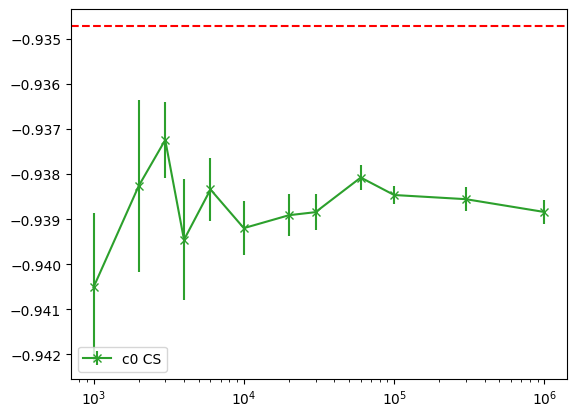

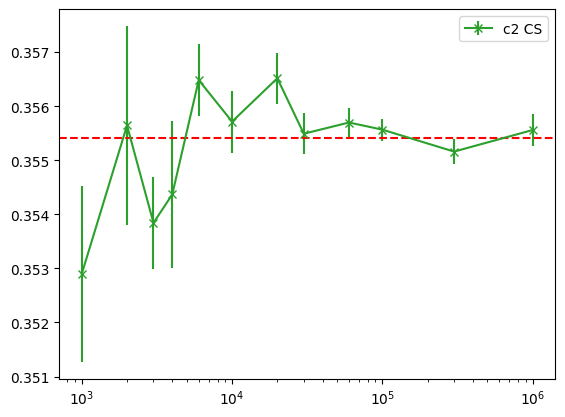

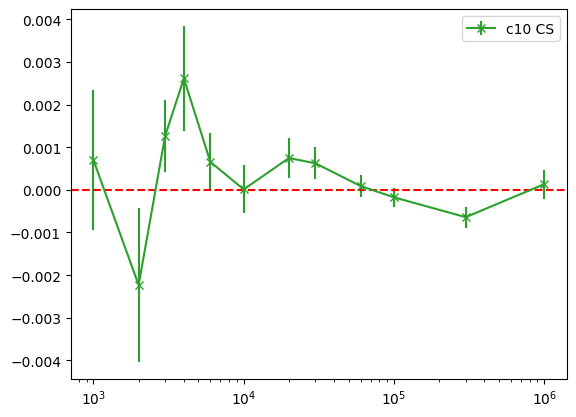

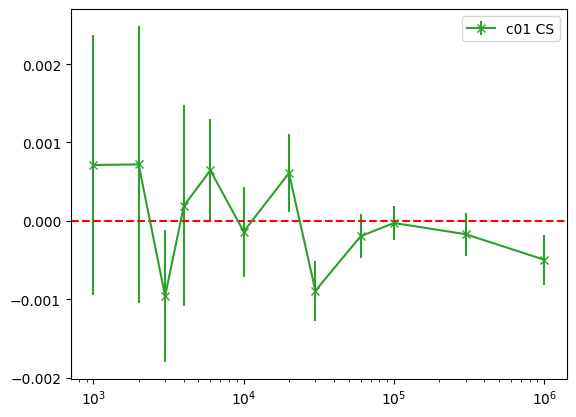

In [58]:
shots_list=[300,1000,2000,3000,4000,6000,10000,20000,30000,60000,100000,300000,1000000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_std_list = []
e_shadow_ccsd_rdm_std_list = []
e_pauli_qbw_std_list = []

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []

e_proj_list= []
e_proj_std_list= []

c0_list = []
c0_std_list = []
c0_err_list = []

c01_list = []
c01_std_list = []
c01_err_list = []

c10_list = []
c10_std_list = []
c10_err_list = []

c2_list = []
c2_std_list = []
c2_err_list = []

for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix_w_c0_2.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)

    e_proj_list.append(((data["e_proj"]))[:].mean())
    e_proj_std_list.append(((data["e_proj"]))[:].std())

    c0_list.append(((data["c0"]))[:].mean())
    c0_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_std_list.append(((data["c0"]))[:].std())

    c01_list.append(((data["c01"]))[:].mean())
    c01_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_std_list.append(((data["c01"]))[:].std())

    c10_list.append(((data["c10"]))[:].mean())
    c10_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_std_list.append(((data["c10"]))[:].std())

    c2_list.append(((data["c2"]))[:].mean())
    c2_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_std_list.append(((data["c2"]))[:].std())
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_std_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_std_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_std_list.append(pauli_qbw_std)

    e_shadow_ccsd_err_list.append(((data["qwc_rdm_energy"]))[:].std()/np.sqrt(len(data["qwc_rdm_energy"])))
    e_shadow_ccsd_rdm_err_list.append(((data["cs_sd_rdm_energy"]))[:].std()/np.sqrt(len(data["cs_sd_rdm_energy"])))
    e_pauli_qbw_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))



# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[:],e_pauli_qbw_list[:],e_pauli_qbw_std_list[:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_list[:],e_shadow_ccsd_std_list[:],color="C2",marker="x",label="CS->CCSD")   
# # plt.errorbar(shots_list[:],e_proj_list[:],e_proj_std_list[:],color="C4",marker="x",label="CS->CCSD proj")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_rdm_list[:],e_shadow_ccsd_rdm_std_list[:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[:],e_fci_list[:],color="gold",label="FCI")
# plt.plot(shots_list[:],e_fci_ccsd_list[:],color="silver",label="FCI->CCSD")
# # plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


# plt.xscale("log")
# plt.legend()

# plt.figure()

# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_std_list[2:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_std_list[2:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_std_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
# plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.xscale("log")
# plt.legend()

# plt.figure()
plot_start=1
# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[plot_start:],e_pauli_qbw_list[plot_start:],e_pauli_qbw_err_list[plot_start:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_list[plot_start:],e_shadow_ccsd_err_list[plot_start:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[:],e_proj_list[:],color="C4",marker="x",label="CS->CCSD proj")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_rdm_list[plot_start:],e_shadow_ccsd_rdm_err_list[plot_start:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[plot_start:],e_fci_list[plot_start:],color="gold",label="FCI")
plt.plot(shots_list[plot_start:],e_fci_ccsd_list[plot_start:],color="silver",label="FCI->CCSD")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c0_list[plot_start:],c0_err_list[plot_start:],color="C2",marker="x",label="c0 CS")   
plt.axhline(-0.9347130554017394,c="r",ls="--")
plt.xscale("log")
plt.legend()

plt.figure()
plt.errorbar(shots_list[plot_start:],c2_list[plot_start:],c2_err_list[plot_start:],color="C2",marker="x",label="c2 CS")   
plt.axhline(0.3554032977640258,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c10_list[plot_start:],c10_err_list[plot_start:],color="C2",marker="x",label="c10 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c01_list[plot_start:],c01_err_list[plot_start:],color="C2",marker="x",label="c01 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()



# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list)
print(fci_mean)


<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2586710/2930124304.py:45: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix_w_c0_2.dat", sep="\s+")


len:  196
len:  1037
len:  817
len:  614
len:  622
len:  426
len:  205
len:  202
len:  185
[np.float64(-1.9990173981831587), np.float64(-1.9978273235271529), np.float64(-1.998680286888575), np.float64(-1.9972133492474624), np.float64(-1.9974268174928131), np.float64(-1.9969730109360437), np.float64(-1.9980246791132383), np.float64(-1.99774800112194), np.float64(-1.9973952694276602)]
-1.9961503255188084


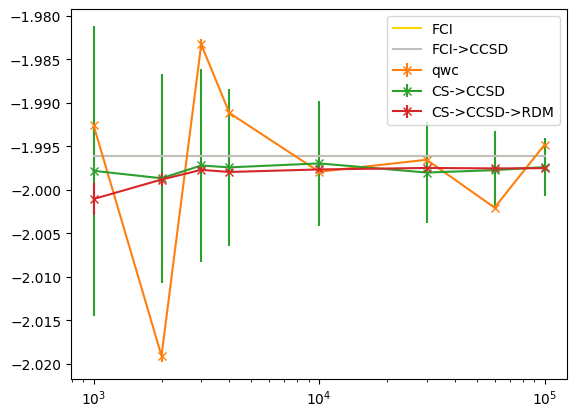

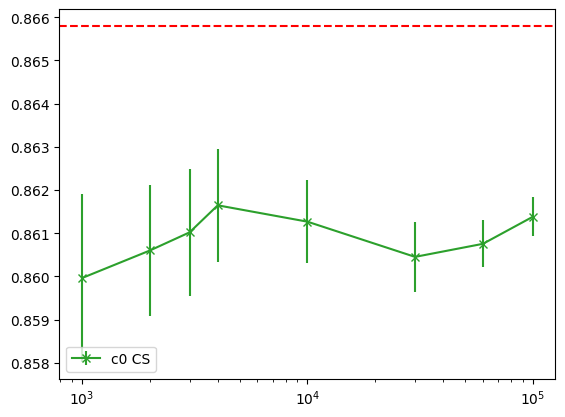

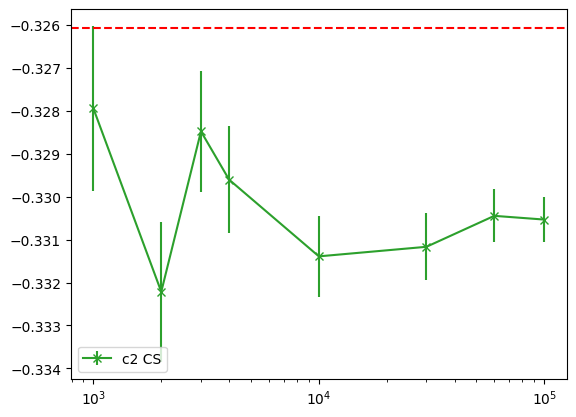

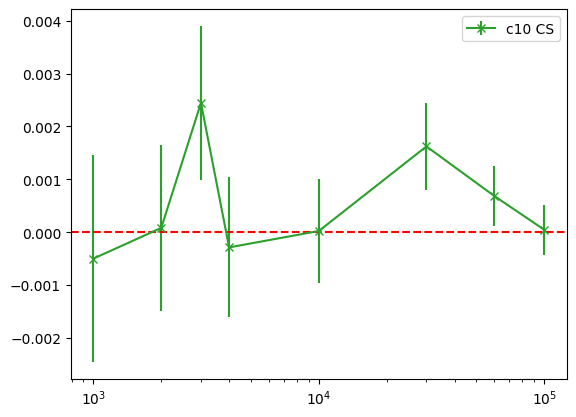

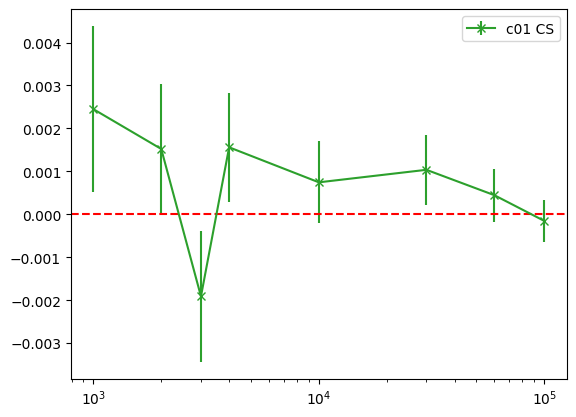

In [3]:
shots_list=[300,1000,2000,3000,4000,10000,30000,60000,100000]#,300000,1000000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_std_list = []
e_shadow_ccsd_rdm_std_list = []
e_pauli_qbw_std_list = []

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []

e_proj_list= []
e_proj_std_list= []

c0_list = []
c0_std_list = []
c0_err_list = []

c01_list = []
c01_std_list = []
c01_err_list = []

c10_list = []
c10_std_list = []
c10_err_list = []

c2_list = []
c2_std_list = []
c2_err_list = []

for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix_w_c0_2.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)

    e_proj_list.append(((data["e_proj"]))[:].mean())
    e_proj_std_list.append(((data["e_proj"]))[:].std())

    c0_list.append(((data["c0"]))[:].mean())
    c0_err_list.append(((data["c0"]))[:].std()/np.sqrt(len(data["c0"])))
    c0_std_list.append(((data["c0"]))[:].std())

    c01_list.append(((data["c01"]))[:].mean())
    c01_err_list.append(((data["c01"]))[:].std()/np.sqrt(len(data["c01"])))
    c01_std_list.append(((data["c01"]))[:].std())

    c10_list.append(((data["c10"]))[:].mean())
    c10_err_list.append(((data["c10"]))[:].std()/np.sqrt(len(data["c10"])))
    c10_std_list.append(((data["c10"]))[:].std())

    c2_list.append(((data["c2"]))[:].mean())
    c2_err_list.append(((data["c2"]))[:].std()/np.sqrt(len(data["c2"])))
    c2_std_list.append(((data["c2"]))[:].std())
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_std_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_std_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_std_list.append(pauli_qbw_std)

    e_shadow_ccsd_err_list.append(((data["qwc_rdm_energy"]))[:].std()/np.sqrt(len(data["qwc_rdm_energy"])))
    e_shadow_ccsd_rdm_err_list.append(((data["cs_sd_rdm_energy"]))[:].std()/np.sqrt(len(data["cs_sd_rdm_energy"])))
    e_pauli_qbw_err_list.append(((data["e_cs_ccsd"]))[:].std()/np.sqrt(len(data["e_cs_ccsd"])))



# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[:],e_pauli_qbw_list[:],e_pauli_qbw_std_list[:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_list[:],e_shadow_ccsd_std_list[:],color="C2",marker="x",label="CS->CCSD")   
# # plt.errorbar(shots_list[:],e_proj_list[:],e_proj_std_list[:],color="C4",marker="x",label="CS->CCSD proj")   
# plt.errorbar(shots_list[:],e_shadow_ccsd_rdm_list[:],e_shadow_ccsd_rdm_std_list[:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[:],e_fci_list[:],color="gold",label="FCI")
# plt.plot(shots_list[:],e_fci_ccsd_list[:],color="silver",label="FCI->CCSD")
# # plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


# plt.xscale("log")
# plt.legend()

# plt.figure()

# # print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_std_list[2:],color="C1",marker="x",label="qwc")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_std_list[2:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_std_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# # plt.axhline(fci_mean,c="r",ls="--")
# # plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
# plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.xscale("log")
# plt.legend()

# plt.figure()
plot_start=1
# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[plot_start:],e_pauli_qbw_list[plot_start:],e_pauli_qbw_err_list[plot_start:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_list[plot_start:],e_shadow_ccsd_err_list[plot_start:],color="C2",marker="x",label="CS->CCSD")   
# plt.errorbar(shots_list[:],e_proj_list[:],color="C4",marker="x",label="CS->CCSD proj")   
plt.errorbar(shots_list[plot_start:],e_shadow_ccsd_rdm_list[plot_start:],e_shadow_ccsd_rdm_err_list[plot_start:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[plot_start:],e_fci_list[plot_start:],color="gold",label="FCI")
plt.plot(shots_list[plot_start:],e_fci_ccsd_list[plot_start:],color="silver",label="FCI->CCSD")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c0_list[plot_start:],c0_err_list[plot_start:],color="C2",marker="x",label="c0 CS")   
plt.axhline(8.65800092e-01,c="r",ls="--")
plt.xscale("log")
plt.legend()

plt.figure()
plt.errorbar(shots_list[plot_start:],c2_list[plot_start:],c2_err_list[plot_start:],color="C2",marker="x",label="c2 CS")   
plt.axhline(-3.26078370e-01,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c10_list[plot_start:],c10_err_list[plot_start:],color="C2",marker="x",label="c10 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()


plt.figure()
plt.errorbar(shots_list[plot_start:],c01_list[plot_start:],c01_err_list[plot_start:],color="C2",marker="x",label="c01 CS")   
plt.axhline(0.,c="r",ls="--")
plt.xscale("log")
plt.legend()



# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list)
print(fci_mean)


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:192: SyntaxWarning: invalid escape sequence '\s'
<>:207: SyntaxWarning: invalid escape sequence '\s'
<>:224: SyntaxWarning: invalid escape sequence '\s'
<>:240: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:192: SyntaxWarning: invalid escape sequence '\s'
<>:207: SyntaxWarning: invalid escape sequence '\s'
<>:224: SyntaxWarning: invalid escape sequence '\s'
<>:240: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1903504/3266881811.py:23: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_1903504/3266881811.py:192: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_1000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_1903504/3266881811.py:207: SyntaxWarning: invalid escape seque

len:  318
len:  320
len:  316
len:  533
len:  450
len:  500
len:  308
len:  313
len:  241
len:  249
len:  80
[np.float64(-0.9980583175843548), np.float64(-1.0002708282367496), np.float64(-0.9991413856264331), np.float64(-0.9986854378599762), np.float64(-0.9981560692402789), np.float64(-0.9981077487715159), np.float64(-0.9975724263134502), np.float64(-0.9977969043314228), np.float64(-0.9979089564188609), np.float64(-0.9978226460077158), np.float64(-0.9978529808922525)]


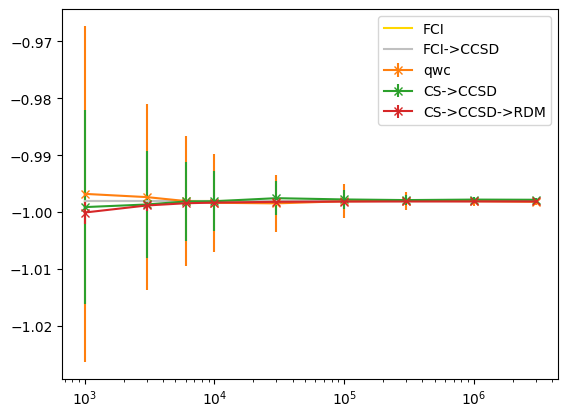

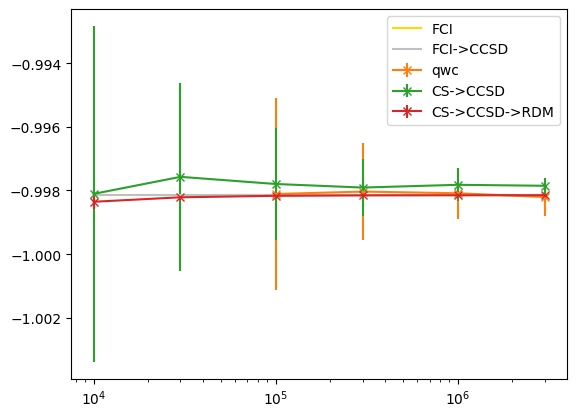

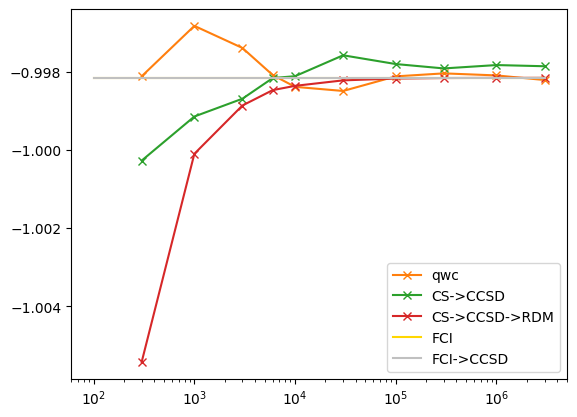

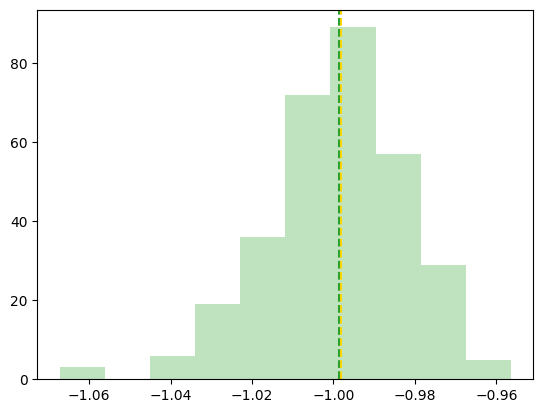

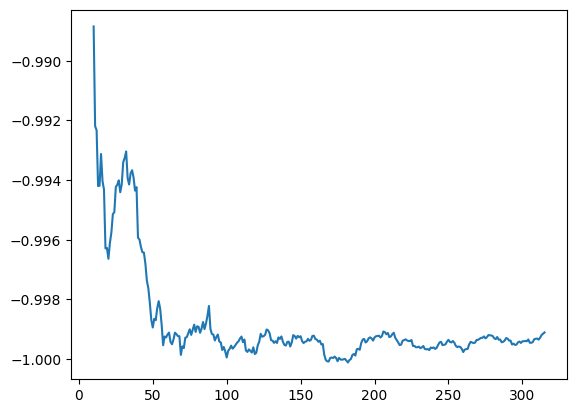

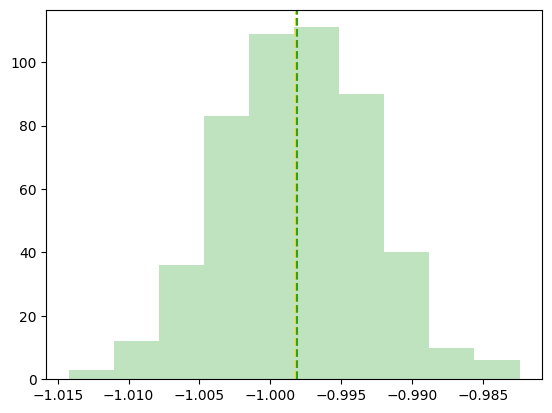

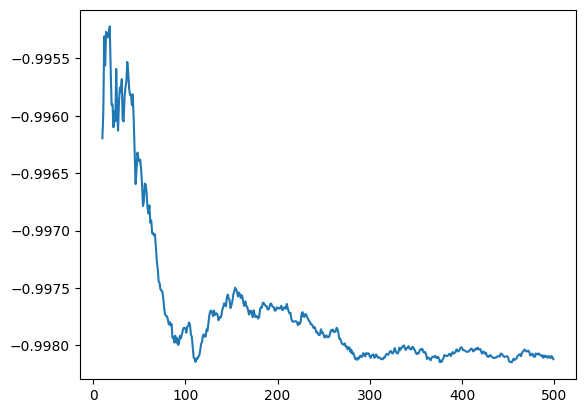

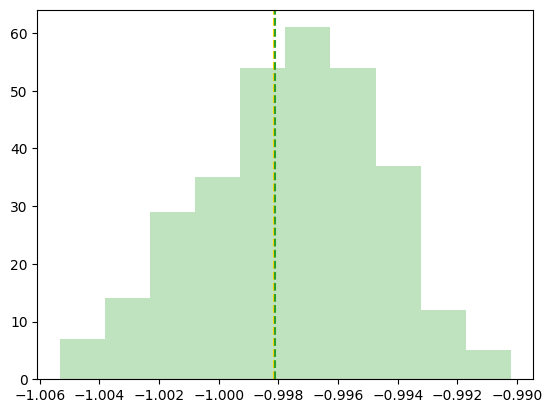

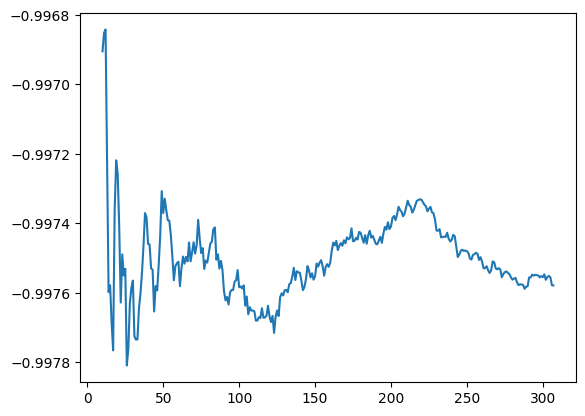

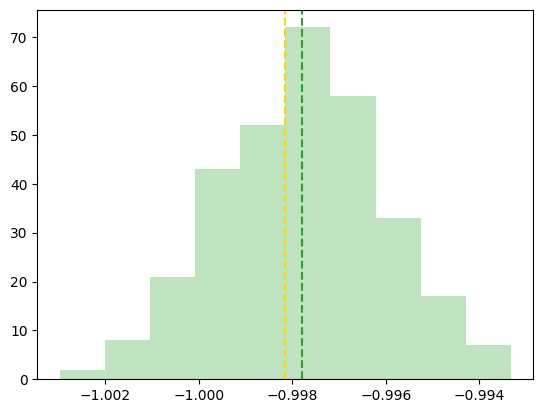

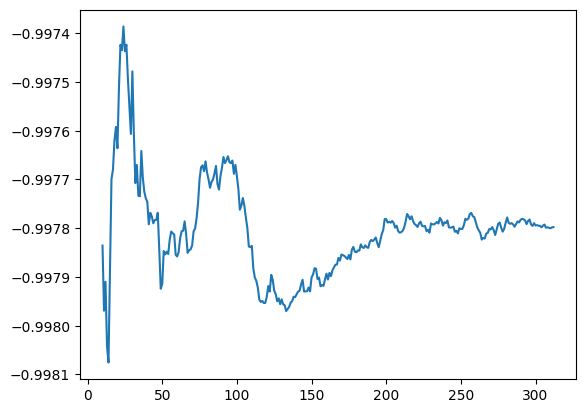

In [4]:
shots_list=[100,300,1000,3000,6000,10000,30000,100000,300000,1000000,3000000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []


for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_err_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_err_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_err_list.append(pauli_qbw_std)



# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_err_list[2:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_err_list[2:],color="C2",marker="x",label="CS->CCSD")   
plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_err_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()

plt.figure()

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[-4:],e_pauli_qbw_list[-4:],e_pauli_qbw_err_list[-4:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[-6:],e_shadow_ccsd_list[-6:],e_shadow_ccsd_err_list[-6:],color="C2",marker="x",label="CS->CCSD")   
plt.errorbar(shots_list[-6:],e_shadow_ccsd_rdm_list[-6:],e_shadow_ccsd_rdm_err_list[-6:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[-6:],e_fci_list[-6:],color="gold",label="FCI")
plt.plot(shots_list[-6:],e_fci_ccsd_list[-6:],color="silver",label="FCI->CCSD")
plt.xscale("log")
plt.legend()

plt.figure()

# print(len(shots_list),len(pauli_qbw_mean))
plt.plot(shots_list[1:],e_pauli_qbw_list[1:],color="C1",marker="x",label="qwc")   
plt.plot(shots_list[1:],e_shadow_ccsd_list[1:],color="C2",marker="x",label="CS->CCSD")   
plt.plot(shots_list[1:],e_shadow_ccsd_rdm_list[1:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[:],e_fci_list[:],color="gold",label="FCI")
plt.plot(shots_list[:],e_fci_ccsd_list[:],color="silver",label="FCI->CCSD")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()
# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list)

# plt.figure()
# data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_3000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
# plt.hist(data["e_cs_ccsd"],bins=np.arange(-1., -0.996, 0.0002),color="C2",alpha=0.3)
# ax=plt.gca()
# ax.hist([complex(x).real for x in data["cs_sd_rdm_energy"]],bins=np.arange(-1., -0.996, 0.0002),color="C3",alpha=0.3)
# plt.axvline(fci_mean,c="gold",ls="--")
# plt.axvline(e_shadow_ccsd_list[-1],c="C2",ls="--")
# # print(e_shadow_ccsd_err_list[-1]/np.sqrt(len(data)))
# mean_err=e_shadow_ccsd_err_list[-1]/np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-1]-mean_err,e_shadow_ccsd_list[-1]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
# std_dev=mean_err*np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-1]-std_dev,e_shadow_ccsd_list[-1]+std_dev],[np.mean(ax.get_ylim())+1.,np.mean(ax.get_ylim())+1.],c="C2")
# plt.axvline(e_shadow_ccsd_rdm_list[-1],c="C3",ls="--")

# plt.figure()
# data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_1000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
# plt.hist(data["e_cs_ccsd"],bins=np.arange(-1., -0.996, 0.0002),color="C2",alpha=0.3)
# plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-1., -0.996, 0.0002),color="C3",alpha=0.3)
# plt.axvline(fci_mean,c="gold",ls="--")
# plt.axvline(e_shadow_ccsd_list[-2],c="C2",ls="--")
# mean_err=e_shadow_ccsd_err_list[-2]/np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-2]-mean_err,e_shadow_ccsd_list[-2]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
# std_dev=mean_err*np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-2]-std_dev,e_shadow_ccsd_list[-2]+std_dev],[np.mean(ax.get_ylim())+1.,np.mean(ax.get_ylim())+1.],c="C2")
# plt.axvline(e_shadow_ccsd_rdm_list[-2],c="C3",ls="--")

# plt.figure()
# data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_300000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
# plt.hist(data["e_cs_ccsd"],bins=np.arange(-1., -0.996, 0.0002),color="C2",alpha=0.3)
# plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-1., -0.996, 0.0002),color="C3",alpha=0.3)
# plt.axvline(fci_mean,c="gold",ls="--")
# plt.axvline(e_shadow_ccsd_list[-3],c="C2",ls="--")
# mean_err=e_shadow_ccsd_err_list[-3]/np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-3]-mean_err,e_shadow_ccsd_list[-3]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
# std_dev=mean_err*np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-3]-std_dev,e_shadow_ccsd_list[-3]+std_dev],[np.mean(ax.get_ylim())+1.,np.mean(ax.get_ylim())+1.],c="C2")
# plt.axvline(e_shadow_ccsd_rdm_list[-3],c="C3",ls="--")

# plt.figure()
# data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_100000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
# plt.hist(data["e_cs_ccsd"],bins=np.arange(-1., -0.996, 0.0002),color="C2",alpha=0.3)
# plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-1., -0.996, 0.0002),color="C3",alpha=0.3)
# plt.axvline(fci_mean,c="gold",ls="--")
# plt.axvline(e_shadow_ccsd_list[-4],c="C2",ls="--")
# mean_err=e_shadow_ccsd_err_list[-4]/np.sqrt(len(data))

# plt.plot([e_shadow_ccsd_list[-4]-mean_err,e_shadow_ccsd_list[-4]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
# std_dev=mean_err*np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-4]-std_dev,e_shadow_ccsd_list[-4]+std_dev],[np.mean(ax.get_ylim())+1.,np.mean(ax.get_ylim())+1.],c="C2")
# plt.axvline(e_shadow_ccsd_rdm_list[-4],c="C3",ls="--")

# plt.figure()
# data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_10000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
# plt.hist(data["e_cs_ccsd"],bins=np.arange(-1., -0.996, 0.0002),color="C2",alpha=0.3)
# plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-1., -0.996, 0.0002),color="C3",alpha=0.3)
# plt.axvline(fci_mean,c="gold",ls="--")
# plt.axvline(e_shadow_ccsd_list[-6],c="C2",ls="--")
# mean_err=e_shadow_ccsd_err_list[-6]/np.sqrt(len(data))

# plt.plot([e_shadow_ccsd_list[-6]-mean_err,e_shadow_ccsd_list[-6]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
# std_dev=mean_err*np.sqrt(len(data))
# plt.plot([e_shadow_ccsd_list[-6]-std_dev,e_shadow_ccsd_list[-6]+std_dev],[np.mean(ax.get_ylim())+1.,np.mean(ax.get_ylim())+1.],c="C2")
# plt.axvline(e_shadow_ccsd_rdm_list[-6],c="C3",ls="--")

plt.figure()




data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_1000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],color="C2",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[3],c="C2",ls="--")

plt.figure()

means_10000=[]
for n in range(10,len(data["e_cs_ccsd"])):
    means_10000.append(np.mean([x for x in list(data["e_cs_ccsd"])[:n]]))

plt.plot(range(10,len(data)),means_10000)

plt.figure()

data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_10000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],color="C2",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-6],c="C2",ls="--")
plt.figure()


# list(data)
means_10000=[]
for n in range(10,len(data["e_cs_ccsd"])):
    means_10000.append(np.mean([x for x in list(data["e_cs_ccsd"])[:n]]))

plt.plot(range(10,len(data)),means_10000)

plt.figure()


data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_30000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],color="C2",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-6],c="C2",ls="--")
plt.figure()


# list(data)
means_10000=[]
for n in range(10,len(data["e_cs_ccsd"])):
    means_10000.append(np.mean([x for x in list(data["e_cs_ccsd"])[:n]]))

plt.plot(range(10,len(data)),means_10000)

plt.figure()

data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_100000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],color="C2",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-4],c="C2",ls="--")

plt.figure()


# list(data)
means_10000=[]
for n in range(10,len(data["e_cs_ccsd"])):
    means_10000.append(np.mean([x for x in list(data["e_cs_ccsd"])[:n]]))

plt.plot(range(10,len(data)),means_10000)

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:109: SyntaxWarning: invalid escape sequence '\s'
<>:121: SyntaxWarning: invalid escape sequence '\s'
<>:132: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:109: SyntaxWarning: invalid escape sequence '\s'
<>:121: SyntaxWarning: invalid escape sequence '\s'
<>:132: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/2925282831.py:23: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_5916/2925282831.py:109: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_300000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_5916/2925282831.py:121: SyntaxWarning: invalid escape sequence '\s

len:  195
len:  177
len:  185
len:  187
len:  166
len:  126
len:  28
[np.float64(-1.9993056383151622), np.float64(-1.997239845198692), np.float64(-1.998597003555285), np.float64(-1.997153535047228), np.float64(-1.9974387800368287), np.float64(-1.9973083935468126), np.float64(-1.9972115521795912)] -1.9961503255188089


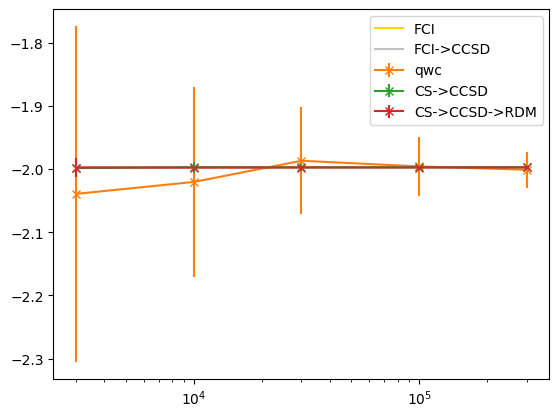

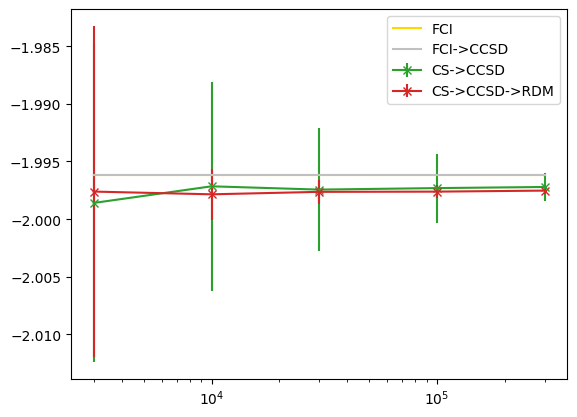

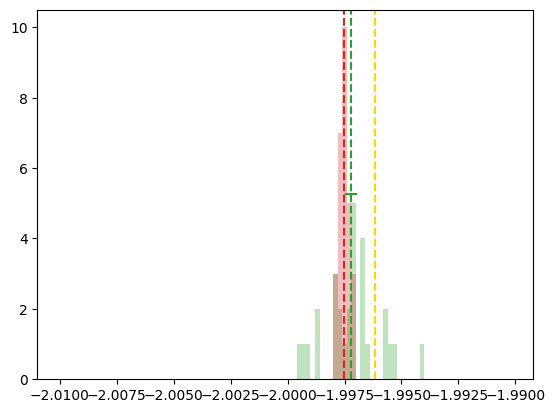

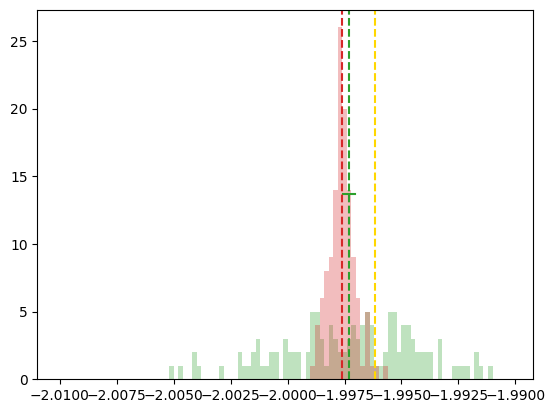

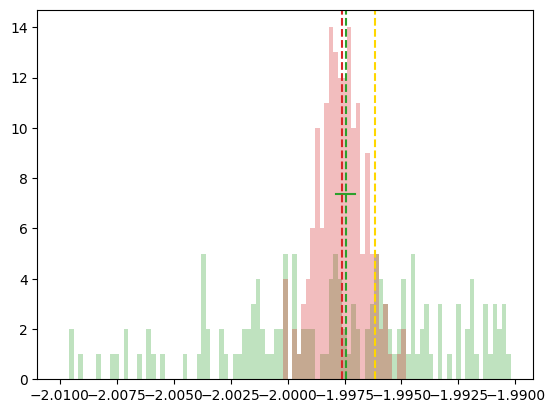

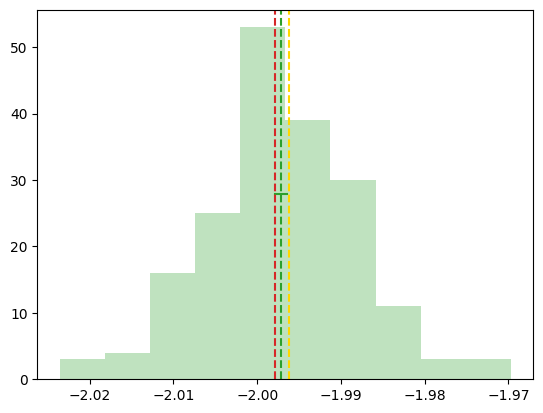

In [310]:
shots_list=[300,1000,3000,10000,30000,100000,300000]#,1000000]


e_fci_list=[]
e_fci_ccsd_list=[]
# hf_list=[]

# fci_ccsd_list=[]
# fci_ccsdt_list=[]
e_fci_rdm_list=[]
e_fci_ccsd_rdm_list=[]

e_shadow_ccsd_list=[]
e_shadow_ccsd_rdm_list=[]
e_pauli_qbw_list=[]

e_shadow_ccsd_err_list = []
e_shadow_ccsd_rdm_err_list = []
e_pauli_qbw_err_list = []


for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    #e_fci    e_cs_ccsd    e_fci_ccsd    fci_rdm_energy    qwc_rdm_energy    ci_sd_rdm_energy    ci_sdt_rdm_energy    cs_sd_rdm_energy
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    fci_ccsd_mean=data["e_fci_ccsd"].mean()
    # hf_mean=((data["HF"])).mean()

    fci_rdm_mean=data["fci_rdm_energy"].mean()
    fci_ccsd_rdm_mean=data["ci_sd_rdm_energy"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    data["qwc_rdm_energy"]=data["qwc_rdm_energy"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    pauli_qbw_mean=((data["qwc_rdm_energy"]))[:].mean()
    pauli_qbw_std=((data["qwc_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_rdm_mean=((data["cs_sd_rdm_energy"]))[:].mean()
    shadow_ccsd_rdm_std=((data["cs_sd_rdm_energy"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["e_cs_ccsd"]))[:].mean()
    shadow_ccsd_std=((data["e_cs_ccsd"]))[:].std()#/np.sqrt(num_err_points)
    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    e_fci_list.append(fci_mean)
    e_fci_ccsd_list.append(fci_ccsd_mean)
    
    e_fci_rdm_list.append(fci_rdm_mean)
    e_fci_ccsd_rdm_list.append(fci_ccsd_rdm_mean)

    e_shadow_ccsd_list.append(shadow_ccsd_mean)
    e_shadow_ccsd_rdm_list.append(shadow_ccsd_rdm_mean)
    e_pauli_qbw_list.append(pauli_qbw_mean)

    e_shadow_ccsd_err_list.append(shadow_ccsd_std)
    e_shadow_ccsd_rdm_err_list.append(shadow_ccsd_rdm_std)
    e_pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list[2:],e_pauli_qbw_list[2:],e_pauli_qbw_err_list[2:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[2:],e_shadow_ccsd_list[2:],e_shadow_ccsd_err_list[2:],color="C2",marker="x",label="CS->CCSD")   
plt.errorbar(shots_list[2:],e_shadow_ccsd_rdm_list[2:],e_shadow_ccsd_rdm_err_list[2:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[2:],e_fci_list[2:],color="gold",label="FCI")
plt.plot(shots_list[2:],e_fci_ccsd_list[2:],color="silver",label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()

plt.figure()

# print(len(shots_list),len(pauli_qbw_mean))
# plt.errorbar(shots_list[-5:],e_pauli_qbw_list[-5:],e_pauli_qbw_err_list[-5:],color="C1",marker="x",label="qwc")   
plt.errorbar(shots_list[-5:],e_shadow_ccsd_list[-5:],e_shadow_ccsd_err_list[-5:],color="C2",marker="x",label="CS->CCSD")   
plt.errorbar(shots_list[-5:],e_shadow_ccsd_rdm_list[-5:],e_shadow_ccsd_rdm_err_list[-5:],color="C3",marker="x",label="CS->CCSD->RDM")   
# plt.axhline(fci_mean,c="r",ls="--")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.plot(shots_list[-5:],e_fci_list[-5:],color="gold",label="FCI")
plt.plot(shots_list[-5:],e_fci_ccsd_list[-5:],color="silver",label="FCI->CCSD")
# plt.axhline(fci_ccsdt_mean,c="g",ls="--")
# plt.plot(shots_list,e_fci_list,label="FCI")
# plt.plot(shots_list,e_fci_ccsd_list,label="FCI->CCSD")
# plt.plot(shots_list,e_fci_rdm_list,label="FCI rdm")


plt.xscale("log")
plt.legend()
# plt.xlim(0.29e4,3.1e6)
# plt.ylim(-0.995,-1.00)
print(e_shadow_ccsd_list,fci_mean)

plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_300000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],bins=np.arange(-2.01, -1.99, 0.0002),color="C2",alpha=0.3)
ax=plt.gca()
ax.hist([complex(x).real for x in data["cs_sd_rdm_energy"]],bins=np.arange(-2.01, -1.99, 0.0002),color="C3",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-1],c="C2",ls="--")
ax=plt.gca()
mean_err=e_shadow_ccsd_err_list[-1]/np.sqrt(len(data))
plt.plot([e_shadow_ccsd_list[-1]-mean_err,e_shadow_ccsd_list[-1]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
plt.axvline(e_shadow_ccsd_rdm_list[-1],c="C3",ls="--")

plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_100000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],bins=np.arange(-2.01, -1.99, 0.0002),color="C2",alpha=0.3)
plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-2.01, -1.99, 0.0002),color="C3",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-2],c="C2",ls="--")
ax=plt.gca()
mean_err=e_shadow_ccsd_err_list[-2]/np.sqrt(len(data))
plt.plot([e_shadow_ccsd_list[-2]-mean_err,e_shadow_ccsd_list[-2]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
plt.axvline(e_shadow_ccsd_rdm_list[-2],c="C3",ls="--")

plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_30000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],bins=np.arange(-2.01, -1.99, 0.0002),color="C2",alpha=0.3)
plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-2.01, -1.99, 0.0002),color="C3",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-3],c="C2",ls="--")
ax=plt.gca()
mean_err=e_shadow_ccsd_err_list[-3]/np.sqrt(len(data))
plt.plot([e_shadow_ccsd_list[-3]-mean_err,e_shadow_ccsd_list[-3]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
plt.axvline(e_shadow_ccsd_rdm_list[-3],c="C3",ls="--")

plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_10000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["e_cs_ccsd"],color="C2",alpha=0.3)#,bins=np.arange(-2.01, -1.99, 0.0002)
# plt.hist(data["cs_sd_rdm_energy"],bins=np.arange(-2.01, -1.99, 0.0002),color="C3",alpha=0.3)
plt.axvline(fci_mean,c="gold",ls="--")
plt.axvline(e_shadow_ccsd_list[-4],c="C2",ls="--")
ax=plt.gca()
mean_err=e_shadow_ccsd_err_list[-4]/np.sqrt(len(data))
plt.plot([e_shadow_ccsd_list[-4]-mean_err,e_shadow_ccsd_list[-4]+mean_err],[np.mean(ax.get_ylim()),np.mean(ax.get_ylim())],c="C2")
plt.axvline(e_shadow_ccsd_rdm_list[-4],c="C3",ls="--")

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/2941159175.py:21: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")


len:  36
len:  39
len:  30
len:  27
len:  37
len:  29
len:  28
len:  29
len:  30
len:  16
[np.float64(0.21091654145395755), np.float64(0.2106332993178143), np.float64(0.2070684637878638), np.float64(0.208326518121965), np.float64(0.20731806073910472), np.float64(0.207901863453313), np.float64(0.20787382617998743), np.float64(0.2079799676540299), np.float64(0.2079620753882701), np.float64(0.20796815028449567)]


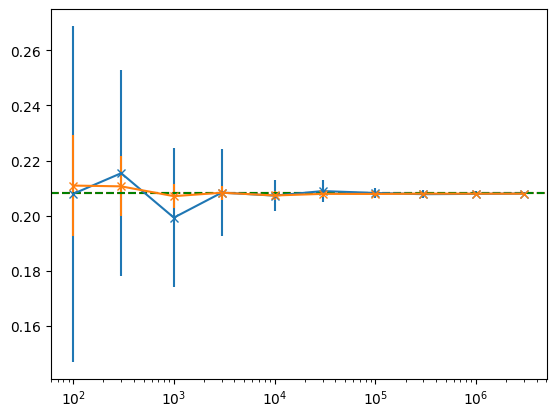

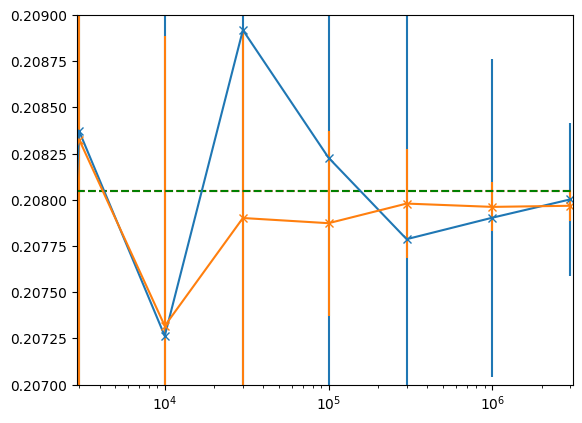

In [184]:
shots_list=[100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]


fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))

plt.errorbar(shots_list,pauli_qbw_list,pauli_qbw_err_list,marker="x")   
plt.errorbar(shots_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x")   
plt.axhline(fci_mean,c="r",ls="--")
plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.xscale("log")


plt.figure()

plt.errorbar(shots_list,pauli_qbw_list,pauli_qbw_err_list,marker="x")   
plt.errorbar(shots_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x")   
plt.axhline(fci_mean,c="r",ls="--")
plt.axhline(fci_ccsdt_mean,c="g",ls="--")
plt.xscale("log")

plt.xlim(0.29e4,3.1e6)
plt.ylim(0.207,0.209)
print(shadow_ccsd_list)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/2068891242.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_3000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_5916/2068891242.py:6: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_1000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
/tmp/ipykernel_5916/2068891242.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_300000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")


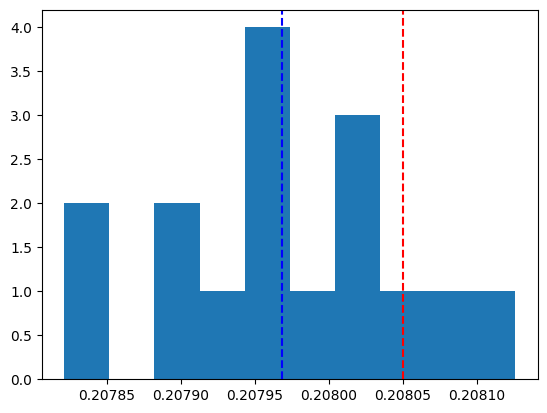

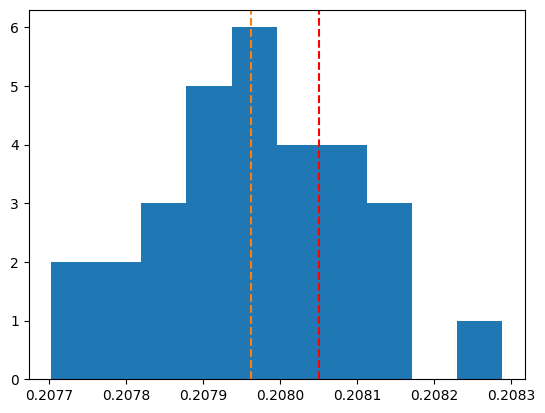

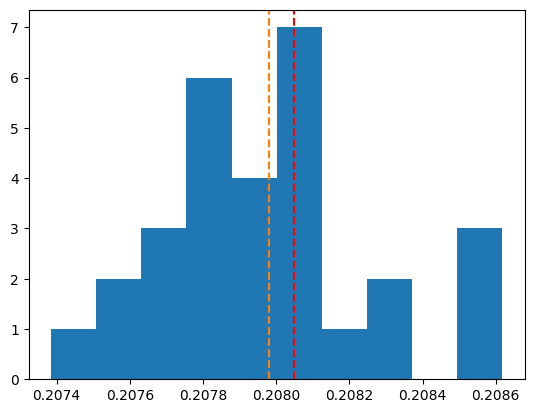

In [183]:
data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_3000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["CS_CCSD"])
plt.axvline(fci_mean,c="r",ls="--")
plt.axvline(shadow_ccsd_list[-1],c="b",ls="--")
plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_1000000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["CS_CCSD"])
plt.axvline(fci_mean,c="r",ls="--")
plt.axvline(shadow_ccsd_list[-2],c="C1",ls="--")
plt.figure()
data = pd.read_csv("properties_conv/SzSz_00_H_2_d_1.5_nshots_300000and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
plt.hist(data["CS_CCSD"])
plt.axvline(fci_mean,c="r",ls="--")
plt.axvline(shadow_ccsd_list[-3],c="C1",ls="--")

len:  28
len:  31
len:  34
len:  43
len:  27
len:  21
len:  9


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/2292445564.py:21: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")


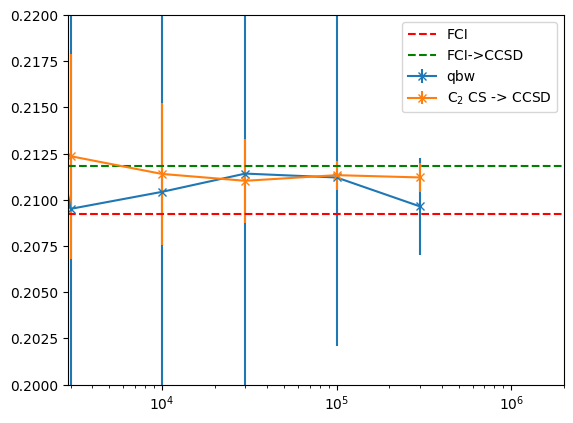

In [158]:
shots_list=[300,1000,3000,10000,30000,100000,300000]#,1000000]#,3000000]


fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_00_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(shots_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.axhline(fci_mean,c="r",ls="--",label="FCI")
plt.axhline(fci_ccsdt_mean,c="g",ls="--",label="FCI->CCSD")
plt.xscale("log")
plt.xlim(2.9e3,2e6)
plt.ylim(0.20,0.22)
plt.legend()

len:  28
len:  31
len:  34
len:  43
len:  27
len:  21
len:  9


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/2592052748.py:21: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_conv/SzSz_01_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")


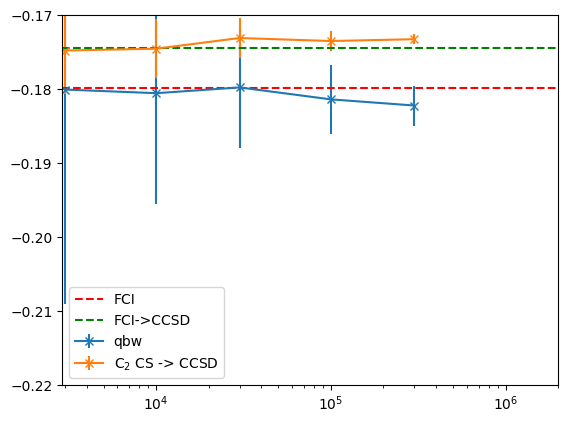

In [159]:
shots_list=[300,1000,3000,10000,30000,100000,300000]#,1000000]#,3000000]


fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


for n in shots_list:
    data = pd.read_csv("properties_conv/SzSz_01_H_4_d_1.5_nshots_"+str(n)+"and_Etot_rdm_E_all_ci_qwc_fix.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(shots_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(shots_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.axhline(fci_mean,c="r",ls="--",label="FCI")
plt.axhline(fci_ccsdt_mean,c="g",ls="--",label="FCI->CCSD")
plt.xscale("log")
plt.xlim(2.9e3,2e6)
plt.ylim(-0.22,-0.17)
plt.legend()

len:  23
len:  27
len:  23
len:  27


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/1026984202.py:21: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_scaling/SzSz_00_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_all_ci.dat", sep="\s+")


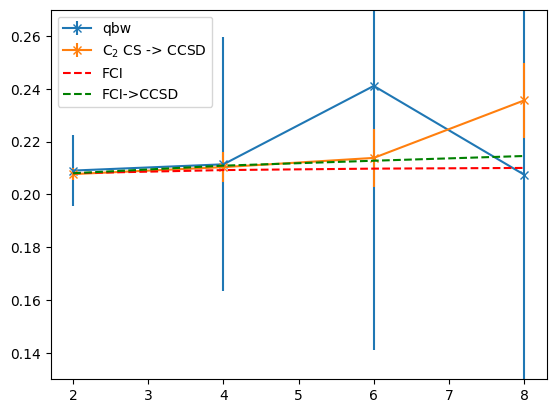

In [52]:
atoms_list=[2,4,6,8]


fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


for n in atoms_list:
    data = pd.read_csv("properties_scaling/SzSz_00_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_all_ci.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
plt.ylim(0.13,0.27)
plt.legend()

len:  23
len:  27
len:  23
len:  27


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5916/3163475067.py:21: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_all_ci.dat", sep="\s+")


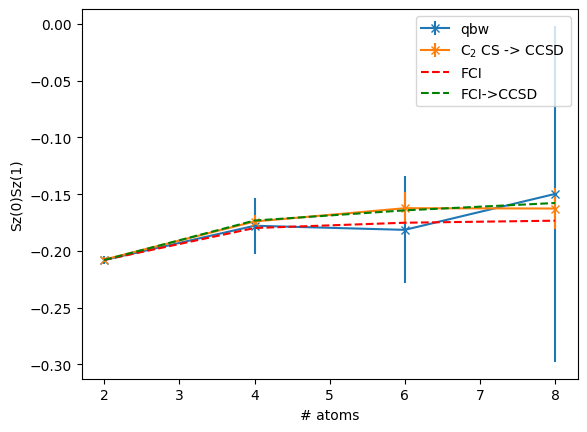

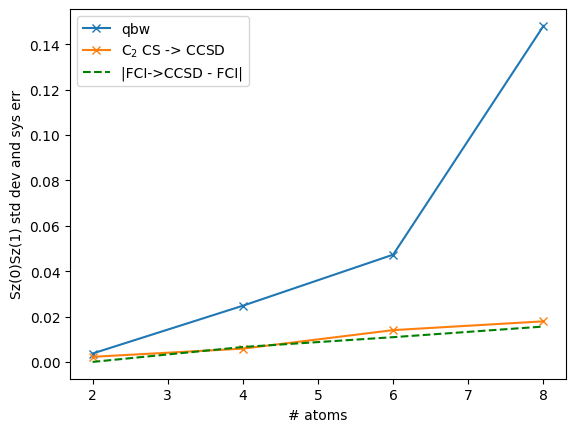

In [60]:
atoms_list=[2,4,6,8]


fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []


for n in atoms_list:
    data = pd.read_csv("properties_scaling/SzSz_01_H_"+str(n)+"_d_1.5_nshots_4096and_Etot_rdm_all_ci.dat", sep="\s+")
    print("len: ",len(data["FCI"]))
    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    # pauli_qbw_mean=((data["Pauli_group_qwc"]))[25:25+num_err_points].mean()
    # pauli_qbw_std=((data["Pauli_group_qwc"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsd_mean=((data["CS_CCSD"]))[25:25+num_err_points].mean()
    # shadow_ccsd_std=((data["CS_CCSD"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[25:25+num_err_points].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[25:25+num_err_points].std()/np.sqrt(num_err_points)


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:].std()#/np.sqrt(num_err_points)

    shadow_ccsd_mean=((data["CS_CCSD"]))[:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:].std()#/np.sqrt(num_err_points)

    # shadow_ccsdt_mean=((data["CS_CCSDT"]))[:].mean()
    # shadow_ccsdt_std=((data["CS_CCSDT"]))[:].std()#/np.sqrt(num_err_points)

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    # shadow_ccsdt_list.append(shadow_ccsdt_mean)
    # shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)

# print(len(shots_list),len(pauli_qbw_mean))
plt.errorbar(atoms_list,pauli_qbw_list,pauli_qbw_err_list,marker="x",label="qbw")   
plt.errorbar(atoms_list,shadow_ccsd_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")   
plt.errorbar(atoms_list,fci_list,c="r",ls="--",label="FCI")
plt.errorbar(atoms_list,fci_ccsd_list,c="g",ls="--",label="FCI->CCSD")
# plt.xscale("log")
# plt.xlim(2.9e3,2e6)
# plt.ylim(0.13,0.27)
plt.legend()
plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1)")

plt.figure()

plt.plot(atoms_list,pauli_qbw_err_list,marker="x",label="qbw")
plt.plot(atoms_list,shadow_ccsd_err_list,marker="x",label=r"C$_2$ CS -> CCSD")
plt.plot(atoms_list,[abs(fci_ccsd_list[x] - fci_list[x]) for x in range(len(fci_list))],c="g",ls="--",label="|FCI->CCSD - FCI|")

plt.xlabel("# atoms")
plt.ylabel("Sz(0)Sz(1) std dev and sys err")
plt.legend()

In [21]:
print(len([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7978995203175777, 0.0, 0.0, 0.0, 1.1376014512937525e-15, 0.0, 0.007496005825231271, 6.539336910927315e-17, 0.0, 0.0, 0.0, 0.0, -0.003203482519268852, 0.0, 9.664577258391087e-16, 0.0013583973467584992, 0.0, 0.0, -0.052675415477416235, -1.4656311589341283e-15, 0.0, -0.019182883650295718, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0157311506454145e-16, 0.0, 2.6522172572772625e-05, 6.423412912957584e-16, 0.0, 0.0, -1.717233614592741e-16, -0.046612815783356444, 0.0, -2.2158685024381811e-16, 0.0, 0.0, 0.0, 0.0, -0.01684207699214353, 1.285369246288482e-16, 0.0, -0.01833808957408331, 0.0, 0.0, 0.0, -1.2571686224601652e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.697884175780877e-16, 0.0, 0.0, 0.0, 0.3103474564765814, 0.0, 1.1355854381288948e-16, -0.020836094263704853, 0.0, 0.0, 0.0, 0.0, 1.2260590851593728e-16, 0.0, 0.10655432735522542, 2.18502603248498e-16, 0.0, 0.0, -2.104712311140488e-16, 0.010348401135868273, 0.0, 1.6824748578062503e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.016275387931204113, 0.0, 3.2966122949188462e-16, 0.08454799671164485, 0.0, 0.0, -0.010444249384170315, -1.2581686547240868e-16, 0.0, 0.001994547561963251, 0.0, 0.0, 0.0, 0.0, 2.3480813775027342e-17, -0.0025417087529984827, 0.0, 1.2354172406685867e-16, 0.0, 0.0, 0.0, 0.012910043533687467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007495977063306555, 0.0, 0.0, 0.0, -7.239121993224692e-17, 0.0, 0.07650072143725045, -1.9870871817099536e-16, 0.0, 0.0, 0.0, 0.0, 0.15922976001156255, 0.0, 4.1709357184606146e-16, 0.029298848587569207, 0.0, 0.0, -0.020112754960966917, -4.218510231669491e-16, 0.0, -0.008599948740581252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.728424012489838e-17, 0.0, 0.052716244998764705, 2.972842535107339e-16, 0.0, 0.0, 6.522824736331922e-17, -0.0036119659712285663, 0.0, -2.1500190621503729e-16, 0.0, 0.0, 0.0, 0.0, 0.007870235622525907, -2.1913025274371466e-16, 0.0, -0.001918521924041838, 0.0, 0.0, 0.0, 2.2880392746707677e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0801078215384815e-16, 0.0, 0.0, 0.0, -0.020836081935554474, 0.0, -1.8389803223162535e-16, 0.054284608604734386, 0.0, 0.0, 0.0, 0.0, 5.866235823693555e-17, 0.0, 0.04848173318696218, -4.6881747640589894e-17, 0.0, 0.0, 7.234894651832685e-17, -0.0009628830145576583, 0.0, -5.900585178242756e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13116082941297003, 0.0, -4.715523859708061e-17, -0.030389074194285038, 0.0, 0.0, -0.005606514903420933, -2.3456861195727754e-16, 0.0, -0.008772452252536393, 0.0, 0.0, 0.0, 0.0, 7.37072516388714e-18, -0.012830442458021611, 0.0, 6.262061319786411e-17, 0.0, 0.0, 0.0, 0.006458059126900564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0032034975210199963, 0.0, 0.0, 0.0, -2.2658852273893134e-16, 0.0, 0.15922976121446417, -7.407169277534112e-16, 0.0, 0.0, 0.0, 0.0, 0.0673214306080062, 0.0, -1.348304920226568e-16, 0.05253288056513198, 0.0, 0.0, 0.021292245500147494, -1.828108383329224e-16, 0.0, -0.008329624087679788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6303681837485802e-16, 0.0, 0.026320916832507764, 3.0669711897016606e-16, 0.0, 0.0, 1.1999290246087154e-16, 0.00435650473152952, 0.0, -3.120489448871737e-16, 0.0, 0.0, 0.0, 0.0, 0.007552460972543707, -1.936308282421624e-16, 0.0, 0.00229383344420243, 0.0, 0.0, 0.0, 1.1970053476674877e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8691066884524693e-16, 0.0, 0.0, 0.0, 0.10655432475141226, 0.0, -1.7233525469916575e-16, 0.048481734794003896, 0.0, 0.0, 0.0, 0.0, 6.859968991151833e-17, 0.0, 0.1383599809148038, 6.787154313754877e-17, 0.0, 0.0, -2.8625733684638686e-16, -0.00609884037421914, 0.0, 1.2079872047724781e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04316299246172616, 0.0, 2.7599462087819633e-16, 0.059156199909100676, 0.0, 0.0, 0.006396111508297622, -2.599364874705508e-17, 0.0, 0.0019513728372090135, 0.0, 0.0, 0.0, 0.0, -1.2041356488048586e-16, -0.0018148059437724149, 0.0, 6.402278622860538e-17, 0.0, 0.0, 0.0, 0.01457599463507615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001358384442592632, 0.0, 0.0, 0.0, -1.5585956564327195e-16, 0.0, 0.02929884968228382, -2.1516357628804665e-17, 0.0, 0.0, 0.0, 0.0, 0.05253287821067478, 0.0, 2.3655406216466568e-17, 0.05052920102910295, 0.0, 0.0, 0.002230785484375532, -1.2842379659716236e-16, 0.0, -0.0007901538119118024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.203093647101539e-18, 0.0, 0.07749429822673488, 2.461453730027455e-16, 0.0, 0.0, 2.0630227295470475e-17, -0.010325225526426497, 0.0, 1.7538133481094873e-17, 0.0, 0.0, 0.0, 0.0, -0.004108641201387728, -1.9837247986021962e-16, 0.0, 0.00013476664008637995, 0.0, 0.0, 0.0, -4.131117918694413e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.05267541379068857, 0.0, 0.0, 0.0, 1.5764993281750224e-16, 0.0, -0.020112757520568028, 2.948893250712514e-16, 0.0, 0.0, 0.0, 0.0, 0.02129224132168379, 0.0, 7.827184126047981e-16, 0.0022307826599196525, 0.0, 0.0, -0.09409112002593445, -4.844221544933935e-19, 0.0, 0.016916655722154002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5174019758330208e-17, 0.0, -0.0014741280548321999, 1.7677889747703642e-16, 0.0, 0.0, 1.7897948144066644e-16, -0.03478634587616481, 0.0, 1.7624867719656985e-16, 0.0, 0.0, 0.0, 0.0, 0.01589858723381248, 4.813021332391349e-17, 0.0, -0.026094620970177194, 0.0, 0.0, 0.0, 1.6331071077951772e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.838125940419261e-17, 0.0, 0.0, 0.0, 0.010348400234006577, 0.0, 1.1788603627508755e-16, -0.0009628861523255709, 0.0, 0.0, 0.0, 0.0, 4.6633538792973934e-17, 0.0, -0.006098839459118356, -7.916229585190613e-17, 0.0, 0.0, 8.339622930839581e-18, -0.028490324761864385, 0.0, -2.56504429917985e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006898214953302486, 0.0, 5.547546454258549e-16, 0.002505218896274324, 0.0, 0.0, -0.04769639279534169, 2.374286192573301e-16, 0.0, -0.009563817340374058, 0.0, 0.0, 0.0, 0.0, 5.2737729593821846e-17, -0.018426007095768415, 0.0, -1.0242893833789942e-17, 0.0, 0.0, 0.0, 0.0038053137137849915, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01918288294802823, 0.0, 0.0, 0.0, 2.915224230567123e-17, 0.0, -0.008599944941528543, 1.5786072313623506e-16, 0.0, 0.0, 0.0, 0.0, -0.008329620251145461, 0.0, -1.202680910876199e-16, -0.0007901522636707875, 0.0, 0.0, 0.016916655674976473, -7.437043033268679e-17, 0.0, -0.017497801347005158, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.718332146889284e-17, 0.0, 0.003869897712229804, 2.412777093520339e-17, 0.0, 0.0, 1.586852424427837e-16, -0.016021876278559805, 0.0, -4.597760565128282e-18, 0.0, 0.0, 0.0, 0.0, -0.04067061891610542, -2.5052577682777608e-17, 0.0, 0.005211601301233027, 0.0, 0.0, 0.0, -3.3174612169322083e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.377358586463507e-16, 0.0, 0.0, 0.0, -0.016275391856727973, 0.0, -4.467795890643966e-16, 0.1311608222127572, 0.0, 0.0, 0.0, 0.0, -1.9528506841096996e-16, 0.0, 0.04316299541532064, 4.6025312684151387e-17, 0.0, 0.0, -1.3991143759637967e-16, 0.006898213916129426, 0.0, 9.603924323580776e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0416146431930271, 0.0, -1.5896857652024726e-16, -0.025015672039717024, 0.0, 0.0, 0.001435320100459419, -1.9048360441171226e-16, 0.0, 0.012971778305720789, 0.0, 0.0, 0.0, 0.0, 2.799215062511358e-17, 0.008361852138128104, 0.0, -6.177666576576068e-17, 0.0, 0.0, 0.0, 0.006220005007953186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6511423162315143e-05, 0.0, 0.0, 0.0, -7.574838269097747e-17, 0.0, 0.052716242820518525, -1.4250481968178164e-16, 0.0, 0.0, 0.0, 0.0, 0.026320919474756503, 0.0, 3.76749743429591e-16, 0.07749429393156919, 0.0, 0.0, -0.0014741250046521152, 2.914635472097939e-16, 0.0, 0.0038698939397428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1097013761057622e-16, 0.0, 0.04391711450690193, 1.571987488774823e-16, 0.0, 0.0, -4.474164435337926e-17, 0.010193302654293423, 0.0, -2.031946208728833e-16, 0.0, 0.0, 0.0, 0.0, 0.0006502710527373436, -1.3291462493308476e-16, 0.0, -2.0550318456152316e-05, 0.0, 0.0, 0.0, 3.729133202202066e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.249394139198378e-16, 0.0, 0.0, 0.0, 0.0845479984358605, 0.0, 4.7817811099406995e-17, -0.030389074040451353, 0.0, 0.0, 0.0, 0.0, -6.253743960370089e-17, 0.0, 0.059156199878267986, 2.430790918090016e-16, 0.0, 0.0, -8.46267655562763e-17, 0.002505216437646271, 0.0, -2.141816623051091e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.025015669882351745, 0.0, 2.208725875673189e-16, 0.0900814901844243, 0.0, 0.0, -0.0027784771755248626, -1.787892718682334e-16, 0.0, -0.0036203944000623373, 0.0, 0.0, 0.0, 0.0, -1.3709134622407063e-17, 0.002315891709522425, 0.0, 8.200561764810468e-17, 0.0, 0.0, 0.0, 0.009750515122909946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5979539705217406e-16, 0.0, 0.0, 0.0, -0.010444250636178366, 0.0, 1.1714648463153333e-16, -0.005606513224039865, 0.0, 0.0, 0.0, 0.0, 3.3121830596730183e-16, 0.0, 0.00639611051891301, -4.515707559641003e-17, 0.0, 0.0, 1.114308406771918e-16, -0.047696394480132104, 0.0, 2.1981183194639278e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014353167311836979, 0.0, 2.3871651681703874e-16, -0.0027784744873247734, 0.0, 0.0, -0.0246801055607537, 4.447273666283947e-18, 0.0, -0.01835736555683928, 0.0, 0.0, 0.0, 0.0, 5.757674837008631e-17, -0.007705525672261654, 0.0, 3.9316140194547184e-17, 0.0, 0.0, 0.0, -0.004048308831680298, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04661281668536299, 0.0, 0.0, 0.0, -1.8300012101832267e-17, 0.0, -0.003611965239644876, 2.6302400619134933e-16, 0.0, 0.0, 0.0, 0.0, 0.004356505511934758, 0.0, 5.074760967872912e-16, -0.010325224265248373, 0.0, 0.0, -0.034786345560206704, 9.702179155926931e-17, 0.0, -0.01602187588990391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.238225506509623e-17, 0.0, 0.010193303699202117, 6.141166522828092e-17, 0.0, 0.0, -6.30950302030357e-17, -0.05522650940936404, 0.0, 8.315184117780425e-17, 0.0, 0.0, 0.0, 0.0, -0.013925530998553693, 2.1431418850329693e-16, 0.0, -0.02098707161374249, 0.0, 0.0, 0.0, -3.624090391378002e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0991366490693167e-16, 0.0, 0.0, 0.0, 0.00199455090620932, 0.0, 2.165867671153421e-17, -0.008772454007171884, 0.0, 0.0, 0.0, 0.0, 1.3343305877850864e-16, 0.0, 0.0019513737888940375, 7.68859918475056e-17, 0.0, 0.0, -3.005084549819799e-18, -0.009563816703215494, 0.0, 1.5251575637161142e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012971778522144949, 0.0, 6.23959130274907e-17, -0.003620392456477758, 0.0, 0.0, -0.0183573646091568, 4.644289988328788e-17, 0.0, -0.014157338326918343, 0.0, 0.0, 0.0, 0.0, 7.261251933027966e-17, -0.030737590235239823, 0.0, 1.5099372368741474e-16, 0.0, 0.0, 0.0, 0.0052168814232183254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.016842077130708857, 0.0, 0.0, 0.0, -2.641829285384171e-17, 0.0, 0.007870238829597977, 1.3028231104391152e-16, 0.0, 0.0, 0.0, 0.0, 0.007552462773736685, 0.0, -1.5803187813845896e-16, -0.0041086385059621745, 0.0, 0.0, 0.015898587980968912, 4.719088342331426e-18, 0.0, -0.04067061973401746, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2544124297017894e-16, 0.0, 0.0006502724234576476, 2.00822152869813e-16, 0.0, 0.0, 9.982182355048097e-17, -0.013925530527135965, 0.0, -3.0385654815884147e-17, 0.0, 0.0, 0.0, 0.0, -0.013605793973608159, -1.311741125635939e-16, 0.0, 0.005126763493565704, 0.0, 0.0, 0.0, -1.4131146273785725e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4741205156577475e-16, 0.0, 0.0, 0.0, -0.002541707072193289, 0.0, 1.6238332191554233e-16, -0.012830443433846107, 0.0, 0.0, 0.0, 0.0, 8.119413383427137e-17, 0.0, -0.0018148060408350352, -9.032293442294775e-17, 0.0, 0.0, 1.014744408620884e-16, -0.018426007810986484, 0.0, -9.704068497755531e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008361850986449527, 0.0, 2.7460266121259976e-17, 0.002315893301043333, 0.0, 0.0, -0.0077055254851444545, 3.1795693098310943e-16, 0.0, -0.030737590132514186, 0.0, 0.0, 0.0, 0.0, -1.0030527822847566e-16, -0.012366705397768338, 0.0, 6.598373698193931e-17, 0.0, 0.0, 0.0, -0.005621656132398337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01833808995152077, 0.0, 0.0, 0.0, 3.103121729101697e-17, 0.0, -0.00191852330588491, 8.564397794306271e-17, 0.0, 0.0, 0.0, 0.0, 0.002293832658217463, 0.0, 1.8169256992394667e-16, 0.00013476476324476407, 0.0, 0.0, -0.02609462059042184, -5.492774584920753e-17, 0.0, 0.005211600535573056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.689207466763048e-17, 0.0, -2.0552068454252767e-05, -7.952128274351552e-18, 0.0, 0.0, 4.3423862193923867e-17, -0.02098707160329832, 0.0, 1.0727135075683402e-16, 0.0, 0.0, 0.0, 0.0, 0.0051267643916017396, 5.4335545721717613e-17, 0.0, -0.02974407202901439, 0.0, 0.0, 0.0, 4.610762058187521e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.373640480503877e-17, 0.0, 0.0, 0.0, 0.012910043540785064, 0.0, -1.218134929941591e-16, 0.006458059991730814, 0.0, 0.0, 0.0, 0.0, -1.867681998616719e-16, 0.0, 0.014575994575816039, -8.168274267252233e-17, 0.0, 0.0, -9.825913390994118e-17, 0.003805314385702843, 0.0, 1.2465713668091612e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00622000435138886, 0.0, -6.348968712823019e-17, 0.009750515396663715, 0.0, 0.0, -0.004048308164716886, 7.75410249823313e-17, 0.0, 0.005216882511496256, 0.0, 0.0, 0.0, 0.0, 9.189569303426003e-17, -0.005621655295218905, 0.0, 5.561842863715787e-18, 0.0, 0.0, 0.0, 0.029484672736196378, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]))
print(len([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7326901822974874, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.483739119516107e-15, 0.0, 0.0, 0.0, -0.008971881334434696, 0.0, 7.270340797614044e-16, -0.0013533145879187033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004633741666504065, 0.0, 0.0, 0.0, -2.494967011858418e-16, 0.0, -0.0024522955087059937, 7.160412118239034e-16, 0.0, 0.0, 0.0, 0.0, 0.05136663158848211, 0.0, -4.516933686348094e-16, -0.00470485379327061, 0.0, 0.0, -0.02130585531042869, -2.0334938541804083e-17, 0.0, -0.009889236258389361, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.9503951827848793e-15, 0.0, 0.0, 0.0, 0.0004931397685942382, 0.0, -2.737676604623407e-16, -0.000548750621848923, 0.0, 0.0, 0.0, 0.0, 2.5697324823017815e-16, 0.0, 0.04250415444014651, -2.411643931688173e-16, 0.0, 0.0, 3.8330522905440617e-16, -0.015558264534402896, 0.0, 1.0036480481878194e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019122425864706357, 0.0, 4.087715705732515e-17, 0.00532657839221251, 0.0, 0.0, -0.021267635231385362, 1.9174206537630591e-16, 0.0, -0.008532922409391153, 0.0, 0.0, 0.0, 0.0, 1.789450478252506e-16, -0.0009194645970956757, 0.0, 1.0321238328573363e-16, 0.0, 0.0, 0.0, -0.0012116286704704356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004449416418769437, 0.0, 0.0, 0.0, -9.40513277607755e-16, 0.0, 0.00012255205018881705, 9.346932064742004e-16, 0.0, 0.0, 0.0, 0.0, 0.0036632624267628994, 0.0, -1.8642519831899638e-16, -0.04063571509650105, 0.0, 0.0, 0.0054275575944116635, -3.153128843855037e-16, 0.0, -0.0039373564746269475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7121181253118877e-16, 0.0, -0.014398881439234495, -2.4296888662309745e-17, 0.0, 0.0, -1.157786734233511e-17, 0.017893941256446638, 0.0, -1.8424836211492422e-16, 0.0, 0.0, 0.0, 0.0, -0.0008646560495585891, -3.3237153297550695e-16, 0.0, 0.00024200875470335053, 0.0, 0.0, 0.0, -2.7085645949330465e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008239389476491278, 0.0, 1.7466838025199598e-17, 0.003415985415243415, 0.0, 0.0, 0.0076572607805002295, 6.918311522546618e-17, 0.0, 0.009696464770843521, 0.0, 0.0, 0.0, 0.0, -1.8332862028702563e-16, -0.0003825149844121426, 0.0, -8.541030365125845e-17, 0.0, 0.0, 0.0, -0.00024341127525653663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009617118316815004, -5.1437645162841866e-17, 0.0, -0.00029284592846784424, 0.0, 0.0, 0.0, 4.3084261577927776e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002537410095719377, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.936990856473722e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2934286783145265, 0.0, 0.0, 0.0, 3.752848702426648e-15, 0.0, 0.02527928562570293, -1.1879293834902994e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.977498285451527e-15, 0.0, 0.0, 0.0, -0.10064653977926778, 0.0, 6.183717485345013e-16, 0.01125423677164515, 0.0, 0.0, 0.0, 0.0, 1.8766041822491815e-15, 0.0, -0.01215075381321489, 2.0993763600417186e-16, 0.0, 0.0, -4.750121855532345e-16, 0.0065737282891595635, 0.0, 1.888674203283694e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.020511880220107047, 0.0, 0.0, 0.0, -6.210422365021746e-16, 0.0, -0.07028182967196574, 9.743263475258373e-17, 0.0, 0.0, 0.0, 0.0, 0.01246526668573262, 0.0, 1.1028177734177342e-15, -0.007688081380934611, 0.0, 0.0, 0.003619756819852956, -2.052611294206401e-16, 0.0, 0.0005177373946855979, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.893233853745545e-16, 0.0, 0.0042270266321307, -6.054870176822787e-17, 0.0, 0.0, -2.027971224690187e-16, 0.0012811054560640158, 0.0, -1.3211814207375388e-16, 0.0, 0.0, 0.0, 0.0, 0.014700942195675878, -2.955918396506729e-16, 0.0, 0.0033481693730311114, 0.0, 0.0, 0.0, 3.295455257170049e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.490249382571211e-16, 0.0, 0.0, 0.0, -0.009077709178392146, 0.0, 4.512473609042212e-16, 0.0648409274436574, 0.0, 0.0, 0.0, 0.0, -2.3525431222602507e-17, 0.0, -0.0075993467938918514, -7.215024798708414e-16, 0.0, 0.0, -1.7857820054787212e-16, -0.0017773488386524656, 0.0, -4.705446674876284e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00567288580518453, 0.0, -5.141554145024487e-17, -0.0020579681492546406, 0.0, 0.0, 0.0014767694409725295, 2.5727311475905453e-16, 0.0, -0.0012549928005831732, 0.0, 0.0, 0.0, 0.0, -1.6346809881587363e-16, -0.011385911946008884, 0.0, 1.1389262604458127e-16, 0.0, 0.0, 0.0, 0.0023604371768744677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1830635163388236e-16, 0.0, -0.00040880128295302855, 1.9532829564531358e-16, 0.0, 0.0, 1.2665706336560956e-16, 0.0013530153939045476, 0.0, 1.6008176941803153e-16, 0.0, 0.0, 0.0, 0.0, -0.0029227768524669974, -2.3969712422726363e-17, 0.0, -0.007766678606941602, 0.0, 0.0, 0.0, -6.404758247655807e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.888718491778092e-17, -0.002100887105839899, 0.0, -3.4010608104510385e-18, 0.0, 0.0, 0.0, 0.003544050204048919, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0109741281597808e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008971865129518303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4280335264184768e-15, 0.0, 0.0, 0.0, 0.0684757289532041, 0.0, 2.5600676754687804e-16, -0.0075851669487618815, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.15201318034231082, 0.0, 0.0, 0.0, 1.7180875129511456e-16, 0.0, 0.01837572377719296, 6.215142972694214e-16, 0.0, 0.0, 0.0, 0.0, -0.02032842256507014, 0.0, -9.591239351560399e-17, 0.002885424676439738, 0.0, 0.0, 0.009968950214342865, -4.81903293735661e-16, 0.0, 0.004225708552688136, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0243851882182126e-15, 0.0, 0.0, 0.0, 0.04647839986767844, 0.0, 1.0464267518639536e-15, 0.024290578970126462, 0.0, 0.0, 0.0, 0.0, -9.46991802765381e-16, 0.0, -0.0082077173905785, 3.0636882870923975e-16, 0.0, 0.0, 3.5271618951311155e-17, 0.001010755587658683, 0.0, -1.0334944716156416e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004210354075886976, 0.0, -2.4965428322780104e-16, 0.006156127357988511, 0.0, 0.0, 0.0013378826867897911, 3.13911877058459e-17, 0.0, 0.0010568699321082612, 0.0, 0.0, 0.0, 0.0, -2.9518524674667904e-16, 0.004317908441434241, 0.0, 3.45311590040307e-17, 0.0, 0.0, 0.0, 0.0024586180985004683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.012740967294461725, 0.0, 0.0, 0.0, -4.4035604218133184e-16, 0.0, -0.035015343762575826, -7.731855814336671e-17, 0.0, 0.0, 0.0, 0.0, 0.008232178453532598, 0.0, 1.3608119074143566e-16, 0.001150169722920448, 0.0, 0.0, -0.00014442291826487986, -1.8941238367113888e-16, 0.0, 0.002229259483823723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.639161875998994e-17, 0.0, -0.004319921493462964, 7.114101107567063e-17, 0.0, 0.0, -6.331785786899998e-17, -0.0008000783979917353, 0.0, -8.344343234040014e-17, 0.0, 0.0, 0.0, 0.0, -0.0003662479987964303, -2.44489052561335e-17, 0.0, 0.001186208930030971, 0.0, 0.0, 0.0, 1.8313755721296433e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0027443238056649366, 0.0, -8.473189400987353e-17, 0.00186302291738693, 0.0, 0.0, 0.002102596251409842, -8.070609414277724e-17, 0.0, -0.0007769005292335768, 0.0, 0.0, 0.0, 0.0, 1.1908391462915437e-17, 0.002317257018238856, 0.0, 2.0410395852911207e-17, 0.0, 0.0, 0.0, 0.0002801722095977889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00284061069657569, -4.2528812324460375e-17, 0.0, 0.00027190526108834004, 0.0, 0.0, 0.0, -1.5331896160809317e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003780132718004225, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.5325971425245702e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025279268700132917, 0.0, 0.0, 0.0, -1.6350456059358578e-17, 0.0, 0.04139528777940153, 2.8688671932904458e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.874138851588305e-16, 0.0, 0.0, 0.0, 0.03968157950055249, 0.0, -6.141258834964578e-18, 0.020292362695861287, 0.0, 0.0, 0.0, 0.0, -4.2384974563565137e-16, 0.0, -0.004507133965750373, 8.041509844286079e-17, 0.0, 0.0, -9.77554796197303e-18, 0.0026259591436165117, 0.0, -7.549761214673626e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.11278599519946243, 0.0, 0.0, 0.0, -4.98810965364047e-16, 0.0, 0.0015897753173913592, -1.6734145525334722e-16, 0.0, 0.0, 0.0, 0.0, -0.011827475554991543, 0.0, 3.117404223078419e-17, 0.00323854838102323, 0.0, 0.0, 0.008553147828080036, -8.925973246740352e-17, 0.0, 0.003807608655445514, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6493286161117048e-16, 0.0, -0.008072150221621851, 1.5665830776039017e-16, 0.0, 0.0, -2.881901962362204e-17, 0.0039831381272521366, 0.0, 6.863483238223771e-17, 0.0, 0.0, 0.0, 0.0, -0.0073729049232184336, 1.2543200234271211e-16, 0.0, -0.0009213524983279351, 0.0, 0.0, 0.0, -1.0388199310406542e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0970424099511393e-15, 0.0, 0.0, 0.0, -0.040442903045642714, 0.0, 9.774879726199363e-17, 0.021143234839329145, 0.0, 0.0, 0.0, 0.0, 3.082180797126258e-16, 0.0, -0.0020503881205177397, -2.1395632809408388e-16, 0.0, 0.0, -1.7235179909385742e-16, -0.0036644615961764202, 0.0, -3.922364887019585e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0066613476191063736, 0.0, -1.398809622656355e-17, 0.00553200821991401, 0.0, 0.0, 0.000324011479589034, -1.4828197531565076e-16, 0.0, -0.0012222293756490004, 0.0, 0.0, 0.0, 0.0, 2.85936140225558e-17, 0.0014874976418527085, 0.0, 7.517453370650188e-17, 0.0, 0.0, 0.0, 0.0010518694216834867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.9679781487547647e-16, 0.0, -0.0038091410378347447, 2.0579866695938177e-16, 0.0, 0.0, -6.256433165041564e-17, -0.002289572542893238, 0.0, -2.2944726913280233e-17, 0.0, 0.0, 0.0, 0.0, -0.002766597624717008, 7.247270405650906e-17, 0.0, 8.129172114068271e-05, 0.0, 0.0, 0.0, -3.5404007987960494e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.763142070436458e-17, -0.002705840074715222, 0.0, 3.4253682139466665e-17, 0.0, 0.0, 0.0, -0.0012014751129618996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8369454882489923e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001353315001232867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6228434430440832e-15, 0.0, 0.0, 0.0, -0.0075851718499335506, 0.0, 6.455036582997847e-16, 0.03515347015831974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015959088113863845, 0.0, 0.0, 0.0, 2.7790504672465304e-16, 0.0, 0.030181607375476798, -4.189806066210015e-17, 0.0, 0.0, 0.0, 0.0, -0.00368830357463721, 0.0, -3.1708731495514885e-16, 0.0013261181092849915, 0.0, 0.0, -0.0015997473564301817, 3.5721364671991e-16, 0.0, -0.0012933587082991321, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2714562178161445e-15, 0.0, 0.0, 0.0, 0.0398488500315178, 0.0, -2.39340352569543e-16, -0.019247753072013617, 0.0, 0.0, 0.0, 0.0, -3.9370886257264107e-16, 0.0, 0.002720808976419153, -9.047248017875821e-17, 0.0, 0.0, 2.849951963794169e-16, 0.0023402565724188573, 0.0, 1.2650735674253156e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003955556194010296, 0.0, -1.2552010491737217e-16, -0.0037490281151215128, 0.0, 0.0, 0.0017146390055049266, 1.499163978985764e-16, 0.0, 0.0006398022496121871, 0.0, 0.0, 0.0, 0.0, -6.050227380144996e-17, -0.001236889653842628, 0.0, -8.078104887571865e-17, 0.0, 0.0, 0.0, 0.0010582255490773317, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10547665900113808, 0.0, 0.0, 0.0, 6.562236872341151e-16, 0.0, 0.025080595724852137, 1.616039921119123e-17, 0.0, 0.0, 0.0, 0.0, 0.00292752150090032, 0.0, -1.222482394760163e-16, -0.0024906941521300238, 0.0, 0.0, -0.005893721714897133, 6.024109989801337e-17, 0.0, -0.005023339795450597, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.3387124775324823e-16, 0.0, 0.0070290106511246295, -9.265841696318436e-17, 0.0, 0.0, 2.254385038368229e-18, -0.005465513607753901, 0.0, -1.07227046458781e-17, 0.0, 0.0, 0.0, 0.0, 0.0026617261290848345, 1.0970731140539928e-16, 0.0, 0.004690690481324845, 0.0, 0.0, 0.0, 7.962238439404561e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001274916075722803, 0.0, -6.114911634794136e-17, 0.008617891762639307, 0.0, 0.0, -0.0017560828412058025, -3.1256277066757104e-17, 0.0, 0.002207364256156553, 0.0, 0.0, 0.0, 0.0, -9.10875180268908e-18, 0.005457025678351359, 0.0, -3.512234593785532e-17, 0.0, 0.0, 0.0, -0.0014750327783353584, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031037154983535554, -1.9967178062442656e-17, 0.0, 0.0023297522133305755, 0.0, 0.0, 0.0, 1.2944955794919552e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008233084345955202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004633751944039366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.1091502043091575e-15, 0.0, 0.0, 0.0, -0.15201317426703728, 0.0, 4.780937402940742e-16, 0.015959094372931096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06264016468346834, 0.0, 0.0, 0.0, 4.1197295362804677e-16, 0.0, -0.04656003831476024, 1.9032569447917122e-16, 0.0, 0.0, 0.0, 0.0, -0.021599216952258006, 0.0, 1.0108483742314583e-15, -0.008338345005074813, 0.0, 0.0, -0.004508885454482694, 9.652189169704329e-17, 0.0, -0.0031053178413433594, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.338614667805846e-16, 0.0, 0.0, 0.0, -0.017513987556231896, 0.0, 4.156373270242259e-17, -0.03488593609939053, 0.0, 0.0, 0.0, 0.0, 4.974053118879525e-17, 0.0, -0.008438508257837677, 5.972647866612443e-17, 0.0, 0.0, -3.8818153298777617e-16, -0.0047119268658293, 0.0, 2.422833460931497e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008908169025062631, 0.0, 1.2763942806134013e-16, 0.0003864187594262453, 0.0, 0.0, 0.0018328799162945762, 3.8464413693360694e-17, 0.0, -0.0022402028243147195, 0.0, 0.0, 0.0, 0.0, -1.9860006858662592e-16, -0.00041137901474648286, 0.0, -9.664622099496208e-18, 0.0, 0.0, 0.0, -0.003098920816315832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006000168082628203, 0.0, 0.0, 0.0, -4.283045864668053e-16, 0.0, 0.022321254843382616, -1.493793541102003e-17, 0.0, 0.0, 0.0, 0.0, -0.0024018927222545245, 0.0, 3.3197188321611625e-16, 0.0019555287337658664, 0.0, 0.0, 0.006184511830968023, 1.2202862801761277e-16, 0.0, -0.0017984451040796324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1408849355356734e-16, 0.0, 0.0010590576229932876, -1.0935984610903594e-16, 0.0, 0.0, -4.3035445859169655e-17, -0.0008878746788366957, 0.0, 1.02378845793909e-16, 0.0, 0.0, 0.0, 0.0, 0.004106950116851654, -3.768368845075633e-17, 0.0, -0.0023216663894281837, 0.0, 0.0, 0.0, -3.733577782666763e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036029791049520415, 0.0, 1.2216915686655394e-16, -0.0021802374954182895, 0.0, 0.0, -0.0009893383222201282, 1.2205012326051579e-16, 0.0, -0.0009612952585106142, 0.0, 0.0, 0.0, 0.0, 7.031217705508896e-17, -0.0009898278787253858, 0.0, 5.669574528646393e-17, 0.0, 0.0, 0.0, 0.0002642875073224194, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0020796735975340272, 6.436639907577234e-17, 0.0, 0.0002728120331096763, 0.0, 0.0, 0.0, 7.16287818865735e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00041667318806542413, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.88420590497428e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.10064653587542333, 0.0, 0.0, 0.0, 5.732398619558833e-16, 0.0, 0.03968158274506695, -8.364480646423767e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8735006718488583e-16, 0.0, 0.0, 0.0, 0.12894260880211658, 0.0, 8.016167362440289e-17, 0.00542376534195208, 0.0, 0.0, 0.0, 0.0, -9.358750682690505e-16, 0.0, -0.004996836239374667, 4.616677844343007e-16, 0.0, 0.0, 1.356493734732515e-16, 0.006127498144751917, 0.0, -1.9616426839494183e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03663641158888345, 0.0, 0.0, 0.0, 1.407201621752583e-16, 0.0, 0.060177259643552944, 2.168141327670165e-16, 0.0, 0.0, 0.0, 0.0, 0.005099614544384805, 0.0, -7.089016428254575e-16, -0.0009003499575173192, 0.0, 0.0, 0.0017938409164968195, 3.785882950810323e-17, 0.0, 0.0021341338917600433, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.422634749172225e-16, 0.0, 0.0017845418775362832, -6.973653084348862e-17, 0.0, 0.0, 8.298960319895447e-17, 0.0016840388247020672, 0.0, 2.8337075739097487e-17, 0.0, 0.0, 0.0, 0.0, -0.01346933827067391, 7.54110885619875e-17, 0.0, -0.0008760024667310885, 0.0, 0.0, 0.0, -2.9572040700755467e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9902089941900223e-16, 0.0, 0.0, 0.0, -0.006292929984650821, 0.0, -9.212631089502659e-17, -0.04422534595444775, 0.0, 0.0, 0.0, 0.0, -2.4868870847282493e-16, 0.0, -0.0010265840560921453, 6.191561498208592e-16, 0.0, 0.0, -2.3419996580329494e-16, 0.0024886059890491135, 0.0, -1.0798184118500433e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005612555494557913, 0.0, 2.0364191530163248e-17, 0.0027800348969599115, 0.0, 0.0, 0.001715183719624187, -3.3338301620169347e-16, 0.0, 0.00036751288032890647, 0.0, 0.0, 0.0, 0.0, 4.924345921815558e-18, 0.011686645992365952, 0.0, -6.72304194688589e-17, 0.0, 0.0, 0.0, -0.00022616439431644378, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.3454481969423636e-16, 0.0, -0.0019735387086679177, 4.6156207418516455e-17, 0.0, 0.0, -1.5259419060082924e-16, -0.00037848394384684637, 0.0, -8.88333994059909e-17, 0.0, 0.0, 0.0, 0.0, 0.0006888298139418557, 8.427721272957492e-17, 0.0, 0.006456272714648674, 0.0, 0.0, 0.0, 9.677764907243953e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.924275691296848e-17, 0.00012235451596629392, 0.0, 2.0804132902056783e-17, 0.0, 0.0, 0.0, -0.004108108959135161, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.730504322451165e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0024522874095059674, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3803364534580896e-15, 0.0, 0.0, 0.0, 0.018375725490559335, 0.0, 4.4377484019140076e-16, 0.030181608065821472, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04656003884290606, 0.0, 0.0, 0.0, 2.8804990844754465e-16, 0.0, 0.04991372682108694, 2.0486163671510126e-16, 0.0, 0.0, 0.0, 0.0, -0.00048794838447348114, 0.0, -4.3932012625006023e-16, -0.001176508857930792, 0.0, 0.0, 0.004334318588928904, -1.2340060841062263e-16, 0.0, 0.0005252808452488897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3825474736835705e-16, 0.0, 0.0, 0.0, 0.08144489848771252, 0.0, 6.926906883950406e-16, 0.013553786849631225, 0.0, 0.0, 0.0, 0.0, -6.469257433105281e-16, 0.0, -0.007261103489986652, -3.3275889385354786e-16, 0.0, 0.0, -1.4126107770572354e-16, 0.0015932713450535565, 0.0, -1.7767118417793378e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.833869400379464e-05, 0.0, -1.688128014157578e-16, -0.0051416478246972255, 0.0, 0.0, 0.00020547341216549316, 5.41931077204506e-17, 0.0, -0.00015498088169056803, 0.0, 0.0, 0.0, 0.0, -2.445367007427234e-16, -0.0014459971611461902, 0.0, 1.269005589398612e-16, 0.0, 0.0, 0.0, 0.004441425954924271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03672013829166134, 0.0, 0.0, 0.0, -2.2301044319629426e-16, 0.0, -0.024661076772324292, 4.483525094904011e-18, 0.0, 0.0, 0.0, 0.0, -0.006346439771748276, 0.0, 4.864115147668023e-16, 0.004889825231344382, 0.0, 0.0, 0.00026532731568177737, -1.730866154081685e-17, 0.0, -8.685193380283989e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.605218637657654e-17, 0.0, 0.000565035579531188, 2.1344816884002846e-16, 0.0, 0.0, -1.5376247246012112e-16, -0.0012489774169908143, 0.0, -7.600434096261749e-17, 0.0, 0.0, 0.0, 0.0, 0.0019549751123240154, 1.696687995657463e-17, 0.0, 0.0036877541220668207, 0.0, 0.0, 0.0, 3.3117617709629456e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2488745643308103e-05, 0.0, -9.997119649249647e-17, 0.00204445600074509, 0.0, 0.0, -0.0010922456500094475, -1.2614995549823182e-16, 0.0, 0.00011501944930931865, 0.0, 0.0, 0.0, 0.0, 1.3374850959972064e-17, 0.005309229532016114, 0.0, -8.668304885831467e-18, 0.0, 0.0, 0.0, -0.00033068613360348923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00434643165915073, -3.145978083327319e-17, 0.0, 0.0010026702971587132, 0.0, 0.0, 0.0, 1.0700949681199138e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004139363215849044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.2964466249355694e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011254237353005172, 0.0, 0.0, 0.0, -1.7766014586220934e-17, 0.0, 0.020292365815553208, 9.881174104334128e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.278439750649985e-16, 0.0, 0.0, 0.0, 0.00542376787179244, 0.0, 5.417691758508498e-16, 0.034715504569026556, 0.0, 0.0, 0.0, 0.0, 3.9142855057451487e-16, 0.0, 0.0019288078781414472, -5.528634199528275e-16, 0.0, 0.0, 1.0928962081429301e-16, -0.00219149412014456, 0.0, 2.8267407648686894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.04021251476373053, 0.0, 0.0, 0.0, 5.271887239452941e-16, 0.0, 0.022086710187876245, -8.809615658257278e-17, 0.0, 0.0, 0.0, 0.0, 0.004731040366947426, 0.0, -3.1184813501618094e-16, -0.0027479181385199757, 0.0, 0.0, 0.0006707650387179956, -9.852605464571771e-17, 0.0, 0.0010422889533188463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0138590947283324e-17, 0.0, -0.002901444672097043, -1.8536822781700163e-16, 0.0, 0.0, -1.568990597054919e-16, 0.0010435805049295555, 0.0, -6.389314770897982e-17, 0.0, 0.0, 0.0, 0.0, -0.003668915147914541, 4.9335900140015214e-17, 0.0, 0.001931627939217754, 0.0, 0.0, 0.0, 1.0152241986406575e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.652984844291831e-16, 0.0, 0.0, 0.0, -0.06211929096130508, 0.0, -3.036523631336147e-16, 0.021201794344162878, 0.0, 0.0, 0.0, 0.0, 4.758911489321854e-16, 0.0, 0.006446262276805971, -3.4047797032861715e-16, 0.0, 0.0, 1.7101951756635854e-16, -0.003260837849269827, 0.0, 4.651688079298495e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036679102424631506, 0.0, -1.2284163955863643e-16, 0.006396102378714947, 0.0, 0.0, -0.0016164904669336768, 9.945173463746467e-17, 0.0, 0.0006330837546927012, 0.0, 0.0, 0.0, 0.0, 9.64642038098729e-17, -0.0007047905737723147, 0.0, -1.4851781378046667e-17, 0.0, 0.0, 0.0, -0.0006046523433373227, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3443300961754438e-16, 0.0, 0.0027129054572293037, 1.343902222458993e-16, 0.0, 0.0, 1.3838508857669388e-16, 0.0005132290338861295, 0.0, -1.591436503139542e-17, 0.0, 0.0, 0.0, 0.0, -0.0034201658646078894, 1.6522189629032035e-17, 0.0, 0.0005972078446396453, 0.0, 0.0, 0.0, -4.5048330425298295e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.049820180082392e-18, -0.0015215801111752587, 0.0, -1.3767282999163761e-17, 0.0, 0.0, 0.0, -0.0010817394083154578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.843054627134598e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05136662769733447, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1220672208219606e-15, 0.0, 0.0, 0.0, -0.020328420772552966, 0.0, 7.140356171327839e-16, -0.0036883045945619495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.021599215077132985, 0.0, 0.0, 0.0, 1.1663184027460071e-15, 0.0, -0.0004879471971284881, 1.613738289828665e-16, 0.0, 0.0, 0.0, 0.0, -0.09088499165366043, 0.0, 1.6752006540689425e-16, 0.0015951183457459147, 0.0, 0.0, -0.012390494677264613, 2.545239996027245e-16, 0.0, -0.0042325779785870495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.657624564151817e-16, 0.0, 0.0, 0.0, 0.0008892564056496194, 0.0, 5.490770276741437e-16, -0.00014398206089830457, 0.0, 0.0, 0.0, 0.0, -3.917415340601131e-16, 0.0, -0.03303842451178351, 1.0545106318286054e-16, 0.0, 0.0, -3.6344120423045684e-16, -0.00948132154211446, 0.0, 1.0822305274712227e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012181399902351639, 0.0, 5.4328116210477687e-17, 0.00909056732882407, 0.0, 0.0, 0.022961802362537073, -9.271025655887788e-17, 0.0, -0.0021966903291374597, 0.0, 0.0, 0.0, 0.0, -4.635000340045128e-16, 0.00200110647283961, 0.0, -1.6006946708439648e-17, 0.0, 0.0, 0.0, -0.0014651454949348036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0032709922963439593, 0.0, 0.0, 0.0, 8.019773314606512e-17, 0.0, -0.0005497471494344435, -6.134089776983046e-16, 0.0, 0.0, 0.0, 0.0, -0.0004944862306205243, 0.0, 1.4796265901320673e-16, 0.025794542836421203, 0.0, 0.0, 0.009110765470715917, 2.827887405346582e-16, 0.0, -0.0015385170014469505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.7368525384840562e-17, 0.0, -0.008804717173282102, 4.60368941068302e-17, 0.0, 0.0, -7.8303514529109e-17, -0.01657260100600333, 0.0, 1.1783667855963402e-16, 0.0, 0.0, 0.0, 0.0, 0.0020247714982474887, 2.998407687504401e-16, 0.0, -0.0015662540276526972, 0.0, 0.0, 0.0, 3.298745065421426e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003592001534931182, 0.0, -6.244981095238745e-17, 0.0018533522421768532, 0.0, 0.0, 0.0023517221550429196, -3.0900678133957554e-17, 0.0, -0.01184812098911684, 0.0, 0.0, 0.0, 0.0, 6.895340340262546e-17, 0.0016130926868163124, 0.0, 1.4559423469147822e-16, 0.0, 0.0, 0.0, 0.0004719736527227118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001345451833069456, 4.4552450088854464e-17, 0.0, 0.0005718858453405534, 0.0, 0.0, 0.0, -5.894628908314857e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030684824782999227, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.065276699671904e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01215075293709479, 0.0, 0.0, 0.0, 3.522331416144863e-16, 0.0, -0.004507132110802043, 3.1795207319992107e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.262734784705526e-15, 0.0, 0.0, 0.0, -0.004996834364246364, 0.0, 8.757598147975594e-16, 0.0019288041409429553, 0.0, 0.0, 0.0, 0.0, -7.139036867089682e-16, 0.0, -0.024725780060632932, -1.4656060102409644e-16, 0.0, 0.0, -3.145531075405538e-16, -0.010493060832283387, 0.0, 8.540406324343875e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.012665534099353712, 0.0, 0.0, 0.0, 8.369620307480222e-16, 0.0, 0.0008110488360084132, 3.8735446333384127e-16, 0.0, 0.0, 0.0, 0.0, -0.04773936669921521, 0.0, -2.9253254107231453e-16, -0.006833865957298949, 0.0, 0.0, 0.0021534301642581717, 4.852980916545273e-17, 0.0, -0.006860039258740535, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0774494830929544e-17, 0.0, -0.012630849599116561, 3.9529612186399127e-17, 0.0, 0.0, 1.3287359045988135e-16, 0.0015323889299746454, 0.0, -4.7079763704990794e-17, 0.0, 0.0, 0.0, 0.0, -0.004619636339690698, -9.760091027118262e-17, 0.0, 0.000879416901046891, 0.0, 0.0, 0.0, -1.516808517733138e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.293846097050472e-16, 0.0, 0.0, 0.0, 0.004157992220511938, 0.0, -4.794491728748669e-16, -0.00034074052815247897, 0.0, 0.0, 0.0, 0.0, 2.9598863710266413e-16, 0.0, 0.0109012086313836, 7.828763684558183e-17, 0.0, 0.0, 2.5152129638970476e-16, -0.004295129818194985, 0.0, 3.198469272454452e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.012911667286235221, 0.0, 1.6945415337901542e-16, 0.007212844387881717, 0.0, 0.0, -0.004817654140833884, 1.1618545866502925e-17, 0.0, -0.0068299481341361785, 0.0, 0.0, 0.0, 0.0, 1.8801985175310948e-16, 0.0018959972523926317, 0.0, 4.18248133373449e-17, 0.0, 0.0, 0.0, -8.818651809697748e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.925633210338963e-17, 0.0, -0.007728491376418325, -2.7240524697679482e-18, 0.0, 0.0, -4.560890213069497e-17, -0.009251729776607482, 0.0, -1.0368884151287022e-17, 0.0, 0.0, 0.0, 0.0, 0.0014706859008435976, 1.0146409241913402e-16, 0.0, 0.0007561039334942348, 0.0, 0.0, 0.0, -4.566473241129498e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.56526377978266e-17, -0.0008020621309867249, 0.0, 6.190904420255876e-17, 0.0, 0.0, 0.0, -0.00041171983016780663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.994851003003268e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004704854170830873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.939210750823365e-16, 0.0, 0.0, 0.0, 0.002885421238082163, 0.0, 6.319005759363403e-17, 0.0013261131518766385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008338341288753196, 0.0, 0.0, 0.0, -4.852539641404379e-16, 0.0, -0.0011765086264520536, 5.906773603801921e-16, 0.0, 0.0, 0.0, 0.0, 0.0015951178399246898, 0.0, -5.781108525659028e-17, -0.019944666636658996, 0.0, 0.0, -0.006260483421958721, -3.610617095476506e-16, 0.0, 0.0009704427155465549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.903937928264526e-16, 0.0, 0.0, 0.0, -0.00613701025611496, 0.0, 5.901454208800821e-17, 0.001001109883041898, 0.0, 0.0, 0.0, 0.0, -3.6742368184625065e-16, 0.0, -0.010182035343983521, 6.211463372637795e-17, 0.0, 0.0, -1.667216362561809e-16, 0.003767103345516408, 0.0, -8.804777227986966e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00950194634087868, 0.0, -2.251208976501338e-16, -0.0046297225414165385, 0.0, 0.0, 0.006828000993139531, -1.2895688980719606e-16, 0.0, -0.0032335925465325995, 0.0, 0.0, 0.0, 0.0, -1.5117137734835167e-16, -0.0002469821094001686, 0.0, 9.268943116851536e-17, 0.0, 0.0, 0.0, 0.00028955566637059476, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0040134979624364625, 0.0, 0.0, 0.0, -5.500025451355041e-16, 0.0, -0.0008841931449061509, 4.235012729937963e-16, 0.0, 0.0, 0.0, 0.0, 0.03718045693222338, 0.0, -6.751904650890963e-17, -0.010885398430663096, 0.0, 0.0, -0.0051170503748449005, -1.2323546473058757e-16, 0.0, -0.0026223145336385077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.666138320466372e-16, 0.0, 0.009534511477565804, 4.795254834546844e-17, 0.0, 0.0, 7.883501585557532e-18, 0.0013991638372341229, 0.0, -5.154105512852205e-17, 0.0, 0.0, 0.0, 0.0, 0.0034622515169891797, -4.037666952852016e-17, 0.0, 0.00040898383911878614, 0.0, 0.0, 0.0, 4.144953730781918e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007422937959861598, 0.0, 1.1849206807508845e-16, 0.009972014598705621, 0.0, 0.0, 0.005876154021968588, 8.579763933158164e-17, 0.0, 0.0015179499927806517, 0.0, 0.0, 0.0, 0.0, -4.4377132474465107e-17, 0.0014605349592999863, 0.0, 1.4011991369600998e-18, 0.0, 0.0, 0.0, -0.0008077678291622752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0009572745983105013, -3.043722255083151e-17, 0.0, 0.0018658812675291067, 0.0, 0.0, 0.0, -2.1844204942990784e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001617570149590133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.021305854363245266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.757439380278857e-16, 0.0, 0.0, 0.0, 0.009968946927723786, 0.0, -1.943256696291584e-16, -0.001599747524063756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004508886495368985, 0.0, 0.0, 0.0, -2.790951060051656e-16, 0.0, 0.00433431597307878, -1.5271438470838955e-16, 0.0, 0.0, 0.0, 0.0, -0.012390495881021596, 0.0, 1.6790409477794566e-18, -0.006260484993926589, 0.0, 0.0, -0.015100982521231248, 6.4607892079016056e-18, 0.0, 0.0015249356494591345, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4344169519854812e-17, 0.0, 0.0, 0.0, 0.00045595551317340163, 0.0, -3.2349208157887466e-16, -0.002255500925781355, 0.0, 0.0, 0.0, 0.0, 1.1791791717025154e-16, 0.0, 0.00952633491005847, 9.394003907152026e-17, 0.0, 0.0, 5.789750782483406e-18, -0.0004299792305751245, 0.0, 1.681007405270128e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0364311421795348, 0.0, -1.5830204565204894e-17, 0.007397995296324011, 0.0, 0.0, 0.010688789763234313, -1.965533254815611e-17, 0.0, -0.002480603369522978, 0.0, 0.0, 0.0, 0.0, -1.1147474628220734e-16, -0.0006990565231563216, 0.0, 3.3557425563618337e-17, 0.0, 0.0, 0.0, -0.002493872692654429, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00384308373583376, 0.0, 0.0, 0.0, 2.4300732180746953e-16, 0.0, -5.8683389767075535e-05, 5.89638072491605e-17, 0.0, 0.0, 0.0, 0.0, 0.00947701429929477, 0.0, -2.026195182244226e-16, -0.005418338320890672, 0.0, 0.0, 0.005664536824822977, -1.6226341644901632e-16, 0.0, -0.0023173051650901815, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0883530945552324e-16, 0.0, -0.006772628818392787, 6.65338571596024e-17, 0.0, 0.0, 1.727066396609788e-17, 0.0020323161668742706, 0.0, -8.861524703518796e-17, 0.0, 0.0, 0.0, 0.0, -0.0017597526404458208, 1.2665679125129815e-16, 0.0, -0.0003393220076594966, 0.0, 0.0, 0.0, 3.872246092600433e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004503503462896425, 0.0, -8.703603315177108e-17, 0.00658286238757333, 0.0, 0.0, 0.00869201636574668, -4.930764660019939e-17, 0.0, 0.000212766847594888, 0.0, 0.0, 0.0, 0.0, -9.769201493374181e-17, 0.0009637356651431434, 0.0, -3.371926192346812e-17, 0.0, 0.0, 0.0, -0.0007282595908505529, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017460733657017372, -1.0623831763890002e-16, 0.0, 0.0008631358738605858, 0.0, 0.0, 0.0, -3.700781672134292e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007559772629875624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5760445190826094e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006573724998786036, 0.0, 0.0, 0.0, 3.2445193490896666e-16, 0.0, 0.0026259567492118462, -1.5733561337692777e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.624313675342814e-17, 0.0, 0.0, 0.0, 0.006127496776142614, 0.0, 5.4468550303672095e-17, -0.002191492667638763, 0.0, 0.0, 0.0, 0.0, -1.0939242227334306e-16, 0.0, -0.010493060608644474, 2.377467671781948e-16, 0.0, 0.0, -1.7750929366316888e-16, -0.007569934128959164, 0.0, -4.5798991702630456e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.006912494696996072, 0.0, 0.0, 0.0, 7.788265534435101e-17, 0.0, -0.0011782393276178564, 1.9619172902672644e-17, 0.0, 0.0, 0.0, 0.0, -0.013799229210121904, 0.0, 3.030775438287181e-16, 0.005003993518574904, 0.0, 0.0, -0.0028885987151955742, -2.2993985748601622e-18, 0.0, -0.004901559261424518, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.553944921484704e-16, 0.0, 0.006077307082855, -5.349585315997598e-17, 0.0, 0.0, 8.954043480160122e-18, -0.002086594859586966, 0.0, 7.823042172528051e-17, 0.0, 0.0, 0.0, 0.0, 0.0007660888532085434, -1.3597508724501732e-16, 0.0, -7.047217711730136e-06, 0.0, 0.0, 0.0, -3.4503202339270265e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.146070343077921e-17, 0.0, 0.0, 0.0, 0.0032886853855989945, 0.0, -1.0636658354176468e-16, 0.002204674694020138, 0.0, 0.0, 0.0, 0.0, -2.281503886055937e-16, 0.0, -0.00814306612917477, 1.1314850461647862e-17, 0.0, 0.0, 1.0974533025841521e-17, -0.0010953267994457858, 0.0, -6.362379789954305e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.02825924903149626, 0.0, -1.4858155977172114e-16, 0.0021039545836326013, 0.0, 0.0, 0.002258481266719883, -2.0053559944438348e-17, 0.0, -0.005085652974048506, 0.0, 0.0, 0.0, 0.0, -9.219534918759307e-18, 0.002777033246157382, 0.0, 6.311477945111383e-17, 0.0, 0.0, 0.0, 0.0016394542472038373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.4419980688141954e-16, 0.0, -0.011449627431454197, 1.1613033331393208e-16, 0.0, 0.0, -7.441319402344444e-17, -0.005771111571368829, 0.0, 2.8524482566116004e-17, 0.0, 0.0, 0.0, 0.0, 0.0008697748970892456, 4.7017291149049746e-17, 0.0, -0.0006890557895641835, 0.0, 0.0, 0.0, -1.459211102986897e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.973940965848673e-17, -0.001950529536638401, 0.0, 3.0359315040964526e-17, 0.0, 0.0, 0.0, -0.0003861535642210256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.52893655074692e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.009889236770326604, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4663938325624877e-16, 0.0, 0.0, 0.0, 0.004225707385740244, 0.0, 4.857141167531127e-17, -0.0012933590981721325, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0031053168055899818, 0.0, 0.0, 0.0, 4.911718651222272e-16, 0.0, 0.0005252792818388232, 3.4520556631894383e-17, 0.0, 0.0, 0.0, 0.0, -0.004232576466432512, 0.0, -1.215531883150145e-17, 0.0009704445837945138, 0.0, 0.0, 0.0015249358584444807, 4.7997051336170455e-17, 0.0, -0.00643639950316236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1307787199616748e-16, 0.0, 0.0, 0.0, -0.00013436445874210918, 0.0, 3.4497898584698415e-16, 0.0004024859085384222, 0.0, 0.0, 0.0, 0.0, 7.374065312501976e-17, 0.0, -0.005938685283357739, 2.541100776210111e-17, 0.0, 0.0, -8.924526949262707e-17, -0.005959785584607888, 0.0, -6.341794158998393e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004419609336893297, 0.0, 8.688264218880491e-17, -0.005165220589100633, 0.0, 0.0, -0.0069220308294383704, 6.106017705027569e-18, 0.0, -0.00020223412492527314, 0.0, 0.0, 0.0, 0.0, 6.261612663315646e-17, -0.00029660316156216116, 0.0, 1.5184791198194436e-17, 0.0, 0.0, 0.0, 0.0009234394564798687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00030144091793088835, 0.0, 0.0, 0.0, -2.2085661596184878e-16, 0.0, 0.0011353781852224208, -1.7985899222537626e-17, 0.0, 0.0, 0.0, 0.0, -0.0003642901799665023, 0.0, -9.916187901780024e-17, -0.007313006184758786, 0.0, 0.0, -0.0033691740444861946, -7.428321055934209e-17, 0.0, -0.0012245931425565854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0338800483299918e-16, 0.0, -0.010517703667162813, 6.533204685840425e-17, 0.0, 0.0, -8.714513712108203e-17, -0.0044809998410162595, 0.0, 2.2303926251669355e-17, 0.0, 0.0, 0.0, 0.0, -0.0002511357351250739, 1.193832762103734e-16, 0.0, 0.0007374170007011856, 0.0, 0.0, 0.0, -2.0537796033695538e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.023849664085939654, 0.0, 6.677460638909918e-17, 0.0032504939638993945, 0.0, 0.0, -0.0006580221631059497, 1.3816369897790348e-17, 0.0, -0.002139657168217068, 0.0, 0.0, 0.0, 0.0, 8.975896197348946e-17, 0.0009420204513340332, 0.0, 6.41984735267662e-17, 0.0, 0.0, 0.0, 0.0007694499692475753, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016887921137287078, 9.006778069120407e-18, 0.0, -0.0007121273688575261, 0.0, 0.0, 0.0, -3.314235242704015e-20, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007941462520378088, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1845743884618934e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.020511881347192534, 0.0, 0.0, 0.0, 1.0444809863092286e-15, 0.0, -0.11278599690139007, 4.787042578046785e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.728210977375808e-17, 0.0, 0.0, 0.0, -0.03663641242718218, 0.0, -6.995959539347402e-16, -0.04021251316661744, 0.0, 0.0, 0.0, 0.0, 6.676440298825285e-16, 0.0, -0.012665535712890615, 1.72292464550342e-16, 0.0, 0.0, 6.266003846634014e-17, -0.006912495048599666, 0.0, 2.884801755617225e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033551996279920435, 0.0, 0.0, 0.0, -7.199925801903572e-16, 0.0, -0.002620612251324909, -6.084164267583483e-16, 0.0, 0.0, 0.0, 0.0, -0.004202131563780187, 0.0, 2.8884777475508576e-16, 0.0015508701869330107, 0.0, 0.0, 0.008410227662119437, 7.953689385905098e-17, 0.0, -0.0038304016261143186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6286597985500328e-16, 0.0, -0.008043069180446942, 2.5658470695551613e-16, 0.0, 0.0, 8.506748399680144e-17, 8.543397144156541e-05, 0.0, -3.6126154031569716e-17, 0.0, 0.0, 0.0, 0.0, 0.007134481702292312, -5.382334848681108e-17, 0.0, -0.002719590587349373, 0.0, 0.0, 0.0, -1.5921705075009745e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.01520296822374e-16, 0.0, 0.0, 0.0, 0.016432093806486674, 0.0, 3.234425328441299e-16, -0.018030179674693843, 0.0, 0.0, 0.0, 0.0, 1.2205695644163898e-16, 0.0, -0.002437719694243896, 4.9649746528676725e-17, 0.0, 0.0, -1.0213580590964057e-16, -0.005618793082668666, 0.0, 2.0491210251299515e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002217106547291345, 0.0, -1.3987822444216858e-17, 0.0037087477163823372, 0.0, 0.0, -0.00378579407570125, 1.8710487781325712e-16, 0.0, -0.0023368210338601146, 0.0, 0.0, 0.0, 0.0, -2.0828728418512197e-16, -0.0016526894627786652, 0.0, 2.6414041924701426e-17, 0.0, 0.0, 0.0, -0.00269329224953321, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.310019453555865e-17, 0.0, 0.003210404636720385, -3.9406866091352953e-17, 0.0, 0.0, 1.3214172640900613e-16, -0.0011785465298911717, 0.0, -7.669111359644093e-18, 0.0, 0.0, 0.0, 0.0, -0.0008717819603085984, 1.9070876481389957e-17, 0.0, -0.0002341814097805529, 0.0, 0.0, 0.0, -4.752345361903603e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.9716630237909055e-17, 0.0008335835890986293, 0.0, 4.1678915491362234e-17, 0.0, 0.0, 0.0, 0.001191639264484417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4522066916434254e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004931498493229038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2828874486895733e-15, 0.0, 0.0, 0.0, 0.04647839870147343, 0.0, 7.161452659262775e-16, 0.03984884730267596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017513986042401817, 0.0, 0.0, 0.0, -6.145620965179794e-16, 0.0, 0.08144489829342279, 2.6847462240414907e-16, 0.0, 0.0, 0.0, 0.0, 0.000889258705229931, 0.0, -4.483321926305091e-16, -0.006137011186422355, 0.0, 0.0, 0.00045595794550445164, -2.0105231833193398e-16, 0.0, -0.00013436555292641739, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1461379997011847e-16, 0.0, 0.0, 0.0, 0.04497248811185722, 0.0, 3.4125197824925433e-16, 0.02448769201778776, 0.0, 0.0, 0.0, 0.0, -5.235237197895679e-16, 0.0, 0.007365259253599639, -5.819331637188959e-16, 0.0, 0.0, 1.4776702718190153e-16, -0.0008470480276727024, 0.0, -4.457984110537641e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036230214494519675, 0.0, -5.506262997213498e-17, 7.434313078801417e-06, 0.0, 0.0, -0.0006635358118436036, 1.0114008044226864e-16, 0.0, -0.0010237310978006063, 0.0, 0.0, 0.0, 0.0, -2.7818827796326185e-17, -0.001901207498085183, 0.0, 1.2220407525937475e-16, 0.0, 0.0, 0.0, 0.004689788402977036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024671482974806237, 0.0, 0.0, 0.0, -5.872809372490751e-17, 0.0, -0.012831648251704462, 1.3485724768935057e-16, 0.0, 0.0, 0.0, 0.0, -0.0013445214012196202, 0.0, 2.8337620432678056e-16, -0.004846238107010749, 0.0, 0.0, 0.004957441265220757, -2.4758301007077317e-16, 0.0, 0.0023254705779150973, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.683498631797048e-18, 0.0, -0.001830327107410084, 4.868705518689477e-17, 0.0, 0.0, -5.3862529671219694e-17, 0.0013243190890245813, 0.0, -6.789423620213456e-17, 0.0, 0.0, 0.0, 0.0, 0.001294168690422025, -1.998311145131562e-17, 0.0, 0.005356908488905115, 0.0, 0.0, 0.0, 1.517497477350642e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006428790461856283, 0.0, -3.2082428930313384e-17, -0.00025387632129144987, 0.0, 0.0, -8.812491197957107e-05, -9.648064138135e-17, 0.0, -5.942341374377216e-05, 0.0, 0.0, 0.0, 0.0, 1.0576541329463684e-16, 0.003314982982629057, 0.0, 1.1670462245437935e-18, 0.0, 0.0, 0.0, -0.0010126207587167998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0037571798643026622, -8.367558317203919e-17, 0.0, 0.00028270169426837294, 0.0, 0.0, 0.0, -3.916329016445513e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00048309841903387916, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.348696016236284e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.07028182739083272, 0.0, 0.0, 0.0, 6.066544316748735e-16, 0.0, 0.0015897717661325483, 8.925316691551568e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.736959937205326e-16, 0.0, 0.0, 0.0, 0.060177260502989625, 0.0, 8.972195531811667e-16, 0.022086709675048298, 0.0, 0.0, 0.0, 0.0, -1.2528374853966508e-16, 0.0, 0.000811047165531457, -1.7571121612620884e-16, 0.0, 0.0, 6.194202931784178e-17, -0.0011782378826079437, 0.0, -3.1109468112937286e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002620613298495418, 0.0, 0.0, 0.0, 4.540626125889442e-16, 0.0, 0.07814270118463636, -2.8454371482882463e-17, 0.0, 0.0, 0.0, 0.0, -0.0010449684529774072, 0.0, -4.49996130703264e-16, -0.0026659206153606748, 0.0, 0.0, -0.0004128335093796539, 8.65221011741285e-17, 0.0, -0.0031981264899543045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0959530225964555e-16, 0.0, -0.0009899153299034132, -1.6717622429614219e-16, 0.0, 0.0, 9.707317787078679e-17, -0.0006330309253519563, 0.0, 6.969099380019104e-17, 0.0, 0.0, 0.0, 0.0, -0.010697154358604334, 6.83058789029301e-17, 0.0, 0.0004283805779707848, 0.0, 0.0, 0.0, 1.132818088696913e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.599979275634669e-16, 0.0, 0.0, 0.0, -0.020488909816605134, 0.0, -3.118677993185077e-16, -0.04127391657213348, 0.0, 0.0, 0.0, 0.0, 2.0146543777118886e-16, 0.0, -0.0028214746924442955, 4.1721472403232554e-16, 0.0, 0.0, -9.856795849650431e-17, -0.0012524495843820205, 0.0, 1.5028161721576173e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009937547555013487, 0.0, -3.072464125342055e-17, -0.0008882487421402105, 0.0, 0.0, -0.0007008540198876908, -1.082853571534246e-16, 0.0, -0.00030864199228115456, 0.0, 0.0, 0.0, 0.0, 6.308960050223452e-17, 0.007367662775405997, 0.0, 2.319493629739394e-18, 0.0, 0.0, 0.0, -0.0009325808763860603, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1364604048928701e-16, 0.0, 0.002757841025818555, -1.1046955633354267e-16, 0.0, 0.0, 8.991141428874622e-18, 0.00011932175098697252, 0.0, -1.405659990785812e-16, 0.0, 0.0, 0.0, 0.0, -0.0005795372204028347, 6.960977989064602e-17, 0.0, 0.0070146382490634115, 0.0, 0.0, 0.0, 6.191316311077238e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.92379225989645e-17, 0.0007694997096983187, 0.0, 5.166571945536158e-17, 0.0, 0.0, 0.0, -0.003967340163686033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.364534315987729e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0005487429561045685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.7343641264044575e-16, 0.0, 0.0, 0.0, 0.024290581032043065, 0.0, 4.026232292066705e-16, -0.019247754943485698, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03488593568017974, 0.0, 0.0, 0.0, 2.5546867507098726e-16, 0.0, 0.013553787296274095, 6.666436745639612e-17, 0.0, 0.0, 0.0, 0.0, -0.00014397982835828228, 0.0, -3.6082598212619547e-16, 0.0010011101730411994, 0.0, 0.0, -0.002255501784900915, 5.580623976745697e-17, 0.0, 0.00040248586963278365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.462308356173933e-16, 0.0, 0.0, 0.0, 0.024487693866188525, 0.0, 3.2935211548595107e-16, 0.03601225680532588, 0.0, 0.0, 0.0, 0.0, -4.1655884879788585e-16, 0.0, 0.0011644825779275527, -2.108793854294148e-16, 0.0, 0.0, -1.0855358079614482e-16, 0.003520924799333962, 0.0, -1.5797351664882874e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.799971650365764e-05, 0.0, -5.378957489825851e-17, 0.0008442124591696251, 0.0, 0.0, 0.0003907001627867283, 7.938426128996353e-17, 0.0, 0.0002203585366039161, 0.0, 0.0, 0.0, 0.0, -1.0959919088634557e-16, -0.0015182369869050309, 0.0, 7.647989834804927e-17, 0.0, 0.0, 0.0, 0.001077980692569075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.02144616445089299, 0.0, 0.0, 0.0, 1.275877284681308e-16, 0.0, -0.05097038450996231, 4.635541876428383e-17, 0.0, 0.0, 0.0, 0.0, 0.0011550701595381084, 0.0, 1.5847086863684037e-16, 0.006261323747162638, 0.0, 0.0, -0.0033345084690263598, 5.4319557589607203e-17, 0.0, 0.0007737921190657712, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2059746137802257e-16, 0.0, 0.0017414189075469465, 9.385198926295e-17, 0.0, 0.0, -9.263229893917394e-17, 0.0005445555883746663, 0.0, -1.5561572530344655e-16, 0.0, 0.0, 0.0, 0.0, 0.0018548729112280163, 1.0260227818811436e-17, 0.0, 0.000680704085771072, 0.0, 0.0, 0.0, 6.94539974868814e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009246703779315623, 0.0, -8.561063881200334e-17, -0.003103213039025843, 0.0, 0.0, 0.00017874452247149724, -2.4078014710202427e-16, 0.0, -0.0001856450480685459, 0.0, 0.0, 0.0, 0.0, 1.8280931553546105e-17, 0.001398860642084699, 0.0, 1.987722890049203e-17, 0.0, 0.0, 0.0, 0.0015906746762269742, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016784376774022754, 3.0758601172001277e-19, 0.0, -0.0005427547611368468, 0.0, 0.0, 0.0, 1.2278776677253028e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026908622060047417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0129033330208594e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012465265577834266, 0.0, 0.0, 0.0, 1.1601756698732402e-15, 0.0, -0.011827472900306593, 4.772283252364403e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0263383907787074e-16, 0.0, 0.0, 0.0, 0.0050996143226561905, 0.0, 7.729358523448253e-16, 0.004731037459981939, 0.0, 0.0, 0.0, 0.0, 4.828397177071941e-16, 0.0, -0.0477393696861794, 2.004234158040116e-16, 0.0, 0.0, -3.0134224144248105e-16, -0.013799230137415292, 0.0, -2.036445811140527e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004202128808138787, 0.0, 0.0, 0.0, 4.775201055315614e-16, 0.0, -0.0010449666555864049, 4.248850985948053e-16, 0.0, 0.0, 0.0, 0.0, -0.021935131541062504, 0.0, -1.607844719382372e-16, -0.010647018124691997, 0.0, 0.0, 0.01275920583268695, -2.51031286598056e-16, 0.0, -0.008308349467710611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.2916810738155176e-17, 0.0, -0.0012963250999114113, -1.3656372169782965e-16, 0.0, 0.0, 3.908715168620082e-17, 0.004933784029511073, 0.0, -3.140435335005882e-17, 0.0, 0.0, 0.0, 0.0, 0.004827095751505872, -9.594375432790328e-17, 0.0, 0.0014747005750489956, 0.0, 0.0, 0.0, 3.9537601617393975e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4088446899504255e-16, 0.0, 0.0, 0.0, 0.0013998030703255356, 0.0, -2.289778696445499e-16, 0.0006450618574443184, 0.0, 0.0, 0.0, 0.0, 3.3129509913011134e-17, 0.0, 0.006618413811916804, -5.903187505357731e-17, 0.0, 0.0, 2.388579086529734e-17, -0.006905218521115111, 0.0, 1.6984857348036006e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008673664912076553, 0.0, -2.886969775871832e-17, 0.0038107491688044773, 0.0, 0.0, -0.0011971475058624443, 2.203290513777937e-17, 0.0, -0.009191971932816161, 0.0, 0.0, 0.0, 0.0, 5.493154908819676e-17, -0.0020455344920228863, 0.0, 8.711322304451921e-17, 0.0, 0.0, 0.0, -0.0008745548996288249, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2224019650281312e-18, 0.0, -0.00572214066132734, 1.49055055312553e-17, 0.0, 0.0, -5.0009681659889335e-17, -0.006088519997956485, 0.0, -4.387671247533319e-17, 0.0, 0.0, 0.0, 0.0, 0.000899684770386994, 3.652067057804568e-17, 0.0, -0.0008091901766371866, 0.0, 0.0, 0.0, -3.9513263553633475e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0205141893099059e-16, 1.2791480578048341e-05, 0.0, -1.3898302072276473e-17, 0.0, 0.0, 0.0, 0.00047717993994095736, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7087637396436853e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04250415337889567, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.076879530657736e-15, 0.0, 0.0, 0.0, -0.008207716724980673, 0.0, 1.4140955373524332e-16, 0.0027208050573112952, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008438505065377322, 0.0, 0.0, 0.0, 8.267560232394926e-16, 0.0, -0.007261099897652553, 4.89242657953477e-16, 0.0, 0.0, 0.0, 0.0, -0.033038423576371954, 0.0, -9.50143871856428e-17, -0.010182035514716919, 0.0, 0.0, 0.0095263357747334, -2.1686271635744588e-16, 0.0, -0.005938685549537008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2934343392683765e-17, 0.0, 0.0, 0.0, 0.007365260790912399, 0.0, 6.21424551860689e-16, 0.0011644795463333843, 0.0, 0.0, 0.0, 0.0, 1.7235726384948643e-16, 0.0, -0.050977340299637, 1.6312799737974377e-16, 0.0, 0.0, -3.3458890939522174e-16, -0.0012196429789225634, 0.0, -6.066553634290392e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008430806509803523, 0.0, -1.4316312789186808e-16, -0.007079290755836289, 0.0, 0.0, 0.015093846787783527, -3.66319219835886e-17, 0.0, -0.0011649865665544715, 0.0, 0.0, 0.0, 0.0, -1.4141495948157142e-16, 0.0013727042314665575, 0.0, 1.0527924583066801e-17, 0.0, 0.0, 0.0, 0.002170336545426615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0020289200102576606, 0.0, 0.0, 0.0, -5.581909519193503e-16, 0.0, 0.0009876669168837873, -2.903348333576521e-16, 0.0, 0.0, 0.0, 0.0, 0.009541188900498406, 0.0, 2.526865258715088e-16, 0.019461911236398764, 0.0, 0.0, -0.007234018329026785, 1.7412431817944266e-16, 0.0, -0.0028657126601277587, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.887917760227065e-16, 0.0, -0.0012311496139546499, 1.5661185901191464e-16, 0.0, 0.0, -8.796004756694838e-18, -0.016300210779754812, 0.0, 1.4535255898638586e-16, 0.0, 0.0, 0.0, 0.0, 0.0013243155249616169, 1.9870959436580723e-16, 0.0, -0.0008267340990984784, 0.0, 0.0, 0.0, -1.127189295069961e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004850359206668403, 0.0, 1.1578343589279885e-16, 0.002689365890075085, 0.0, 0.0, 0.0012426330754516746, -6.035793937301684e-17, 0.0, -0.01059500664043103, 0.0, 0.0, 0.0, 0.0, -1.6417141154400422e-17, 0.0007434966236122051, 0.0, 1.720771608633248e-16, 0.0, 0.0, 0.0, 0.0004430708439904959, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002034880083546383, 1.0619771633986719e-16, 0.0, 0.0004550112374665065, 0.0, 0.0, 0.0, -6.026056506283484e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031901510265829346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.606356694390317e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0076880765105248935, 0.0, 0.0, 0.0, -3.689507502304531e-16, 0.0, 0.003238547797725091, -3.668510011711192e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.511935584100134e-17, 0.0, 0.0, 0.0, -0.0009003484250931059, 0.0, 1.1448285115338307e-16, -0.002747919786568755, 0.0, 0.0, 0.0, 0.0, -3.439616185524283e-17, 0.0, -0.006833867121060585, -1.7795027264256969e-16, 0.0, 0.0, 1.7782636774205808e-17, 0.005003993831968248, 0.0, -4.41130103928741e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015508716413738736, 0.0, 0.0, 0.0, 4.4182074563154864e-16, 0.0, -0.0026659195807066864, 4.180318853108402e-16, 0.0, 0.0, 0.0, 0.0, -0.010647017034467651, 0.0, -9.737883626002041e-17, -0.01452151724195541, 0.0, 0.0, 0.0070887070982574895, -2.2174129370332595e-16, 0.0, 0.002803155476469923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.843704056515799e-16, 0.0, -0.004359700189905042, -1.88432412373755e-16, 0.0, 0.0, 2.2333808590102066e-17, 0.008703454596622884, 0.0, -1.1572429978781096e-16, 0.0, 0.0, 0.0, 0.0, -0.00010199542348380095, -1.5425384934047135e-16, 0.0, -7.75830347623492e-05, 0.0, 0.0, 0.0, 3.3323100294937615e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.5220907191770916e-16, 0.0, 0.0, 0.0, -0.006326746885707091, 0.0, -4.029174125642396e-16, -0.0023565675785271914, 0.0, 0.0, 0.0, 0.0, -1.2749685006535015e-16, 0.0, 0.027228591482955002, -2.6689876360526238e-17, 0.0, 0.0, 1.674382102394477e-16, -0.00028173276139706327, 0.0, -1.0907681658469657e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007564325710453819, 0.0, 9.835617119174047e-17, 0.007980051110514847, 0.0, 0.0, -0.00795899783681513, 9.274924571859168e-17, 0.0, -0.0009218635578394258, 0.0, 0.0, 0.0, 0.0, 1.2966764069863822e-16, 0.0008857974908032182, 0.0, 3.370140043273478e-17, 0.0, 0.0, 0.0, -0.0017376800364836459, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.327534385052956e-16, 0.0, 0.00292354758120999, 9.073368499687938e-17, 0.0, 0.0, -7.632011121605287e-17, -0.003656420928440039, 0.0, 4.565164718039299e-17, 0.0, 0.0, 0.0, 0.0, 0.0015526872801878916, 3.1333714628033094e-17, 0.0, 0.0015900129346691806, 0.0, 0.0, 0.0, 7.76627883341126e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.9205430938209283e-17, 0.0011519907533502909, 0.0, 5.1723154753006613e-17, 0.0, 0.0, 0.0, -6.521053980998269e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.557709698717723e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3980194604886075e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003619756506536178, 0.0, 0.0, 0.0, -1.5178962925391724e-16, 0.0, 0.008553146157071805, -3.6782411329009264e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.692353344018335e-16, 0.0, 0.0, 0.0, 0.001793839550310834, 0.0, -2.782367614171053e-16, 0.0006707684425087161, 0.0, 0.0, 0.0, 0.0, 4.2950334243350447e-16, 0.0, 0.0021534297280615027, 2.8690659448202287e-16, 0.0, 0.0, -8.113503540609937e-17, -0.0028885983379683426, 0.0, -2.5290389876886267e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008410226136057316, 0.0, 0.0, 0.0, -2.515075574858311e-16, 0.0, -0.00041283431627118844, -1.3430328639473192e-16, 0.0, 0.0, 0.0, 0.0, 0.012759203945526919, 0.0, 4.849571631723773e-16, 0.007088706086588322, 0.0, 0.0, -0.00775605886670555, -1.2530628528817867e-16, 0.0, 0.0008931341412626037, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2005497865346047e-16, 0.0, 0.025791002486556438, 1.5082564151609836e-17, 0.0, 0.0, -1.1802438825334507e-16, 0.00019580908395811126, 0.0, 3.878213245021863e-17, 0.0, 0.0, 0.0, 0.0, 0.005522383922937804, -1.3813851170029057e-16, 0.0, 0.0004539105556470828, 0.0, 0.0, 0.0, 6.80059817762315e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.349891603739976e-17, 0.0, 0.0, 0.0, 0.002854845225098707, 0.0, 6.198751022064933e-17, -0.0018218365233074081, 0.0, 0.0, 0.0, 0.0, -3.8888255534267073e-16, 0.0, -0.004467419453686483, -2.928688210421474e-16, 0.0, 0.0, 8.642202167040335e-17, 0.007076834009918376, 0.0, 7.575809102992567e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0053319262956553135, 0.0, -1.0879013406178037e-17, -0.009529417000580844, 0.0, 0.0, 0.006098079785547328, -7.755179198092558e-17, 0.0, 0.0026422060620879917, 0.0, 0.0, 0.0, 0.0, -2.3398466850886646e-17, -0.0020261965563653337, 0.0, -3.5804294974470243e-17, 0.0, 0.0, 0.0, 0.0002473509551118998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6341611924476302e-16, 0.0, 0.0018221707595816915, -1.2952399595915246e-16, 0.0, 0.0, 8.59516828798786e-18, 0.0042346990253699975, 0.0, 4.115126333562612e-17, 0.0, 0.0, 0.0, 0.0, 0.003233923540712274, -1.3012486163938445e-16, 0.0, -4.7922120717337507e-05, 0.0, 0.0, 0.0, -1.5242832837513902e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.937373033567778e-17, 0.0015353562725651231, 0.0, -9.249208642672046e-18, 0.0, 0.0, 0.0, 0.0005840959185692801, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.283001726832026e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.015558264228114767, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8572784285497923e-16, 0.0, 0.0, 0.0, 0.001010753998247092, 0.0, -5.9390270633507096e-18, 0.002340258569488208, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0047119254170399395, 0.0, 0.0, 0.0, 1.5069396592019551e-16, 0.0, 0.001593269791173352, 2.6702845555209227e-17, 0.0, 0.0, 0.0, 0.0, -0.009481321208711122, 0.0, 1.9866126468584704e-16, 0.0037671037231315116, 0.0, 0.0, -0.0004299800071314628, -4.534750471902856e-17, 0.0, -0.00595978551810756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.482307919388505e-17, 0.0, 0.0, 0.0, -0.0008470491968642463, 0.0, -1.255016991948131e-16, 0.003520923931121737, 0.0, 0.0, 0.0, 0.0, 3.3529895344309834e-16, 0.0, -0.0012196429685280956, 1.992021290540069e-16, 0.0, 0.0, -4.52216053458071e-17, -0.01222321868404952, 0.0, 8.799294792584196e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006834991396878574, 0.0, 1.5729458441488772e-16, 0.0102216917234902, 0.0, 0.0, -0.00449398043138258, -5.508762465807976e-17, 0.0, -0.0024556469333448724, 0.0, 0.0, 0.0, 0.0, -4.3891739386574e-17, 0.0017363428405446696, 0.0, -7.151009449626534e-17, 0.0, 0.0, 0.0, -0.0003734499187820385, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.007354322428416294, 0.0, 0.0, 0.0, -3.638334322586561e-17, 0.0, 0.0012805355993777284, -6.533687906300413e-17, 0.0, 0.0, 0.0, 0.0, -0.009222474674434954, 0.0, -2.880290637684916e-16, -0.005738759729473987, 0.0, 0.0, 0.006796661545215683, 5.931622605163867e-17, 0.0, 0.00017394618232669591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.7228070642769974e-17, 0.0, -0.02435020371111992, 2.6739467270686974e-17, 0.0, 0.0, -1.209240147695129e-16, -0.0007890708216190852, 0.0, 1.6880770263510147e-18, 0.0, 0.0, 0.0, 0.0, -0.0015296550828124153, 6.239246461268758e-17, 0.0, -0.0005980278306816425, 0.0, 0.0, 0.0, -1.3752174887245823e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00940350395014258, 0.0, -2.4693406847953725e-17, -0.005055281382558741, 0.0, 0.0, 0.005247320206367715, -3.681106006301079e-17, 0.0, -0.004346244990620811, 0.0, 0.0, 0.0, 0.0, 5.763388731177975e-18, -0.0016615302397057588, 0.0, 5.0996284902387393e-17, 0.0, 0.0, 0.0, 0.0004642970165618261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005750776662251846, -1.4930668887899548e-17, 0.0, -0.0020880002161660755, 0.0, 0.0, 0.0, -1.786447684604717e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016807202817934164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.939685769368157e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005177378844966686, 0.0, 0.0, 0.0, 2.680085795785983e-16, 0.0, 0.0038076072502763437, -1.6812009966229566e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.294276041684692e-16, 0.0, 0.0, 0.0, 0.002134132499589119, 0.0, 1.0944362432991021e-16, 0.0010422881346397832, 0.0, 0.0, 0.0, 0.0, -7.268359665613688e-17, 0.0, -0.0068600376367844605, 1.4234640491731662e-16, 0.0, 0.0, 4.682595611297679e-18, -0.004901559243624702, 0.0, 2.274520458443817e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0038304028286606758, 0.0, 0.0, 0.0, -3.2831118491723655e-18, 0.0, -0.0031981265885622, 2.5216189002037617e-16, 0.0, 0.0, 0.0, 0.0, -0.008308349463236752, 0.0, 6.270922920558214e-17, 0.002803156236216287, 0.0, 0.0, 0.0008931336329895425, -3.017214908801649e-17, 0.0, -0.005198729434919955, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4423228258962144e-16, 0.0, -0.0015933675433052045, 1.4610218725088357e-16, 0.0, 0.0, 1.4572913878790246e-17, -0.00353362807443529, 0.0, 3.322083633170083e-17, 0.0, 0.0, 0.0, 0.0, -0.0017164263358687734, 3.2926376063280394e-17, 0.0, -0.0004113434927471874, 0.0, 0.0, 0.0, -4.607336975790695e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.0375412506133374e-17, 0.0, 0.0, 0.0, 0.0028589602043438364, 0.0, -4.4999143391832865e-17, -0.001433572371477395, 0.0, 0.0, 0.0, 0.0, -1.4929770672173986e-16, 0.0, -0.002947005209425346, -8.497601779309557e-17, 0.0, 0.0, 6.461289961205088e-17, 0.0016489801582402197, 0.0, -1.4700691491130314e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011432617790039703, 0.0, 3.40600719763509e-17, -0.003932320272781279, 0.0, 0.0, 0.004776262478029386, -1.3218423299686642e-16, 0.0, -0.004476613678502759, 0.0, 0.0, 0.0, 0.0, 4.1029495934986624e-17, 0.0003163435007628101, 0.0, 2.5435549381327383e-17, 0.0, 0.0, 0.0, 0.000809827372548134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6804058654178644e-16, 0.0, -0.017609646962323207, 9.979407108509193e-17, 0.0, 0.0, -8.589584128646133e-17, -0.005936920065533259, 0.0, 3.2355458105010507e-17, 0.0, 0.0, 0.0, 0.0, -0.0004909936651129452, 6.029397028507619e-17, 0.0, -0.0012349966438628594, 0.0, 0.0, 0.0, -7.618414079533684e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3459252767516962e-17, -0.0018123928096301963, 0.0, 5.367639364945299e-17, 0.0, 0.0, 0.0, -0.0009030733041890922, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.62002080043652e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01912242336357931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.192480420765569e-16, 0.0, 0.0, 0.0, 0.004210357260349323, 0.0, -1.763998870103603e-16, 0.003955554803855701, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008908168757520244, 0.0, 0.0, 0.0, -1.0094475493544575e-16, 0.0, -4.833602707743607e-05, -1.7986969774979393e-17, 0.0, 0.0, 0.0, 0.0, 0.012181399225816507, 0.0, 2.891217196139967e-16, 0.009501945470444095, 0.0, 0.0, 0.03643114529750725, -1.834843643419746e-16, 0.0, -0.0044196083512387414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.266310325089926e-17, 0.0, 0.0, 0.0, 0.0036230227403682754, 0.0, 1.4725327496753012e-16, -7.79996208471951e-05, 0.0, 0.0, 0.0, 0.0, 1.5557133767491444e-16, 0.0, -0.008430806608033786, 3.221467792942787e-16, 0.0, 0.0, 2.108449544005095e-16, 0.0068349919503786945, 0.0, -1.9129211221691654e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.012601246586058908, 0.0, -6.831184531049215e-17, -0.005139646406198312, 0.0, 0.0, -0.010172010050365207, -1.029182507609321e-16, 0.0, 0.008693731970902582, 0.0, 0.0, 0.0, 0.0, 1.1857310793482652e-16, 0.0016058252861363516, 0.0, -1.1406679341213394e-16, 0.0, 0.0, 0.0, 0.0017451432726905513, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0013858733335562951, 0.0, 0.0, 0.0, -2.587731928597617e-16, 0.0, 0.0019779553819606476, -2.8987011202606666e-17, 0.0, 0.0, 0.0, 0.0, -0.005081663047372724, 0.0, -1.0418638816426667e-16, 0.004721145066622277, 0.0, 0.0, -0.006994819124358079, -5.469721735742266e-17, 0.0, 0.006607490122094329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7448545264220656e-16, 0.0, 0.00035857000685523573, 9.909779657742445e-17, 0.0, 0.0, 1.4790794700649745e-17, -0.0015751910442885948, 0.0, -6.7288298967677914e-18, 0.0, 0.0, 0.0, 0.0, 0.0007604966515602991, -1.1373800436139221e-16, 0.0, 0.0009167089561125816, 0.0, 0.0, 0.0, -8.701183648556024e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001216745316983942, 0.0, 5.147148613791271e-17, -0.001929369108025286, 0.0, 0.0, -0.001975772493599953, -3.913005135848297e-17, 0.0, 3.883501610407985e-05, 0.0, 0.0, 0.0, 0.0, 1.159730781567202e-17, -0.0003162959120924815, 0.0, -6.351949433234641e-18, 0.0, 0.0, 0.0, -0.0008560148227903835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002224709700862284, 3.2073550350088006e-17, 0.0, 0.0006938002618666875, 0.0, 0.0, 0.0, 9.489529515539773e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007471024516352394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.2057377583992e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004227027533053714, 0.0, 0.0, 0.0, 2.460799540414777e-16, 0.0, -0.008072149101651436, -1.865253893580056e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2460841676109273e-16, 0.0, 0.0, 0.0, 0.0017845428830662452, 0.0, -1.9985723056055742e-16, -0.0029014463615782723, 0.0, 0.0, 0.0, 0.0, 3.446478936232683e-16, 0.0, -0.012630850128386828, 3.406618950104745e-16, 0.0, 0.0, 2.6562431079005724e-16, 0.006077307286292134, 0.0, -1.1827810369469517e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008043067602907114, 0.0, 0.0, 0.0, -4.367855862283918e-16, 0.0, -0.0009899144309003384, -6.633091521824772e-17, 0.0, 0.0, 0.0, 0.0, -0.0012963244413086088, 0.0, 2.166613840078468e-16, -0.00435970067653763, 0.0, 0.0, 0.02579100398392566, -4.985475970435149e-17, 0.0, -0.0015933670631407453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6109864474474147e-17, 0.0, -0.00683226531683134, 1.0668458609402741e-16, 0.0, 0.0, -2.3611406277743162e-17, 0.006090669253483262, 0.0, -3.9169879595836465e-17, 0.0, 0.0, 0.0, 0.0, 0.005741329472397785, -3.480382982904619e-17, 0.0, -0.0033800461150683163, 0.0, 0.0, 0.0, 2.0683113846884662e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.052934697036593e-17, 0.0, 0.0, 0.0, -0.0008184993489225055, 0.0, 5.902730892534991e-17, -0.0012643323079241885, 0.0, 0.0, 0.0, 0.0, -9.401208796187922e-17, 0.0, 0.00649734198713246, -1.7980062617757588e-16, 0.0, 0.0, -1.1610770849942935e-16, -0.009524955912102125, 0.0, 1.6119356903877615e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002438244003582848, 0.0, 6.684796963033309e-17, 0.006444137471637881, 0.0, 0.0, 0.0003261552145212536, -1.2044301683020484e-16, 0.0, -0.004134537229377058, 0.0, 0.0, 0.0, 0.0, -1.194586919065632e-16, -0.00220895013264617, 0.0, 9.610888288293051e-17, 0.0, 0.0, 0.0, -0.0015962874182602904, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4775427350443473e-17, 0.0, -0.000727302688374086, 3.313062804404624e-17, 0.0, 0.0, 1.0055558051954048e-17, -0.002256884979163695, 0.0, -4.9980588392519446e-17, 0.0, 0.0, 0.0, 0.0, -0.0003655994667069015, 3.575194692722532e-17, 0.0, -0.00022654012077649008, 0.0, 0.0, 0.0, -2.927222740043898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.398436613310177e-17, -0.00019876479124411264, 0.0, 5.507589751860487e-17, 0.0, 0.0, 0.0, 0.0006609410268441148, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.029340542153462e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0053265779933195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.9879359686499652e-16, 0.0, 0.0, 0.0, 0.006156126531352723, 0.0, 6.478023080584334e-17, -0.00374902921028976, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003864178886739938, 0.0, 0.0, 0.0, 3.7978341668606333e-16, 0.0, -0.0051416466389098536, 4.509930918756434e-17, 0.0, 0.0, 0.0, 0.0, 0.009090566536711274, 0.0, 1.580350328207171e-16, -0.004629723540994686, 0.0, 0.0, 0.007397995069917905, 8.467016387427295e-17, 0.0, -0.005165220540929069, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0080871975109598e-16, 0.0, 0.0, 0.0, 7.435000538103206e-06, 0.0, 1.1980113242125284e-16, 0.0008442129592731663, 0.0, 0.0, 0.0, 0.0, 1.9838449492617256e-16, 0.0, -0.007079291031204513, 2.0957030162365387e-16, 0.0, 0.0, 1.1625558190896919e-16, 0.010221692095279162, 0.0, -6.351027713171701e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0051396469570159945, 0.0, 4.543021277494704e-18, -0.008336753779995546, 0.0, 0.0, -0.0026030630289690534, -2.27196476967826e-17, 0.0, 0.0036423547098295094, 0.0, 0.0, 0.0, 0.0, 9.323611330816734e-17, 0.0019118785342595545, 0.0, -8.812159385770675e-17, 0.0, 0.0, 0.0, 0.0007217553179803332, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0058889853793018835, 0.0, 0.0, 0.0, 3.5711577453776926e-16, 0.0, -0.002639859585444153, 9.670892940348984e-18, 0.0, 0.0, 0.0, 0.0, 0.004058283161467818, 0.0, -2.757327633258908e-16, -0.0019919636898345127, 0.0, 0.0, -0.019090026207535273, 1.8164358585781538e-16, 0.0, -0.004853062443723829, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5424948244247855e-17, 0.0, 0.006171325477899248, -6.783566983079512e-17, 0.0, 0.0, -6.320843774452003e-17, -0.005095389378533979, 0.0, -4.485494573550993e-17, 0.0, 0.0, 0.0, 0.0, -0.003542332308296683, -9.984116895818246e-18, 0.0, 0.0013896170704478224, 0.0, 0.0, 0.0, 4.892194361479602e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0027629525871031746, 0.0, -7.064587307306355e-17, 0.0031862852576645785, 0.0, 0.0, -0.003487359546881061, -1.4651344855456603e-17, 0.0, 0.0031101761663695758, 0.0, 0.0, 0.0, 0.0, -3.8252610964066053e-17, 6.822571950712866e-05, 0.0, 5.285481340193377e-17, 0.0, 0.0, 0.0, 0.001006023913942411, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008925650227316276, 3.136271669155939e-17, 0.0, -0.00021777428717486647, 0.0, 0.0, 0.0, 3.6316018211644075e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004784499002292651, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.021267634193314292, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0510622116578445e-18, 0.0, 0.0, 0.0, 0.0013378831022058458, 0.0, 7.539959858549976e-17, 0.0017146406230342498, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018328787240134512, 0.0, 0.0, 0.0, 5.872146006494735e-17, 0.0, 0.00020547347489908505, -7.965187984701553e-17, 0.0, 0.0, 0.0, 0.0, 0.022961801757979464, 0.0, 1.1010749965888815e-16, 0.006828000487323012, 0.0, 0.0, 0.010688789420467774, 4.772528822553457e-17, 0.0, -0.006922030984139593, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.089295536990656e-17, 0.0, 0.0, 0.0, -0.0006635344487572503, 0.0, -1.1325977976703447e-16, 0.0003907010666143707, 0.0, 0.0, 0.0, 0.0, 5.849503624787076e-17, 0.0, 0.015093846684640257, 4.552336047482051e-17, 0.0, 0.0, -8.452119278589944e-17, -0.004493980412732148, 0.0, 5.12360082569251e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.010172010169238282, 0.0, -1.9692347951635899e-16, -0.0026030624716328007, 0.0, 0.0, -0.029236987164572913, 6.337018131185178e-17, 0.0, 0.005956427939832928, 0.0, 0.0, 0.0, 0.0, 2.166658247150101e-16, 0.0015066920530154937, 0.0, -7.306545992586385e-17, 0.0, 0.0, 0.0, 0.0007105176795543929, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001834741848587137, 0.0, 0.0, 0.0, 5.572922855804608e-17, 0.0, 0.00039138931272289854, 2.7449272247514673e-17, 0.0, 0.0, 0.0, 0.0, -0.006389479980325929, 0.0, 2.509592162216533e-17, -0.013394816333694779, 0.0, 0.0, -0.0025939367956040633, -3.5079451110972037e-17, 0.0, 0.004232809107355179, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.17972984011199e-17, 0.0, -0.004020276597442058, -6.519374169900534e-17, 0.0, 0.0, 7.765674049152307e-17, 0.010466536936154474, 0.0, 3.16410637297802e-17, 0.0, 0.0, 0.0, 0.0, 0.0016034008524199068, -1.142110205438949e-16, 0.0, -0.00019418475876298248, 0.0, 0.0, 0.0, -7.515115176823357e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005732952501609937, 0.0, -4.9182249135312534e-17, -0.003974157400235145, 0.0, 0.0, -0.005680804169224724, 2.984803909350031e-17, 0.0, 0.009288897629023678, 0.0, 0.0, 0.0, 0.0, 3.5829546670125664e-17, 0.00013164351924895107, 0.0, -1.397567880445801e-16, 0.0, 0.0, 0.0, -0.0006207490290499343, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007706172283845668, 2.9089179096730316e-17, 0.0, -0.0006133616023986461, 0.0, 0.0, 0.0, 5.07283384432596e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0039004658744166303, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.5080652251024164e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012811057163880904, 0.0, 0.0, 0.0, -5.666704237186984e-17, 0.0, 0.003983137835866161, -1.6527387279332214e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1658729311204826e-16, 0.0, 0.0, 0.0, 0.0016840374144565505, 0.0, -1.242036383704842e-16, 0.0010435803771775502, 0.0, 0.0, 0.0, 0.0, -8.498005885229023e-17, 0.0, 0.0015323889366905135, 2.213547925736389e-16, 0.0, 0.0, 5.554390062460655e-17, -0.002086595218594294, 0.0, -1.0345983253366782e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.543395511544273e-05, 0.0, 0.0, 0.0, -2.5041564482265606e-16, 0.0, -0.000633030554138135, -1.1298351744468726e-16, 0.0, 0.0, 0.0, 0.0, 0.004933783990093318, 0.0, 1.7014580541674117e-16, 0.008703454178359325, 0.0, 0.0, 0.00019580878723551604, -2.1787266599807766e-16, 0.0, -0.003533628038085676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.64165899588991e-17, 0.0, 0.006090669230008476, -3.861282064970035e-17, 0.0, 0.0, -1.6549415896481238e-17, -0.007993668778166818, 0.0, 8.07818212440485e-17, 0.0, 0.0, 0.0, 0.0, -0.00023845139851722878, 1.3820482557117077e-16, 0.0, 1.3328490391833525e-05, 0.0, 0.0, 0.0, 3.257891959477777e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.05167565646513e-18, 0.0, 0.0, 0.0, 0.0017028031089516896, 0.0, 2.714548292350595e-16, 3.132797207423066e-05, 0.0, 0.0, 0.0, 0.0, -7.13356705523092e-17, 0.0, -0.007886691215890598, 2.488896227855174e-17, 0.0, 0.0, 4.156540292396986e-17, 0.00498204098296667, 0.0, 1.698899160431016e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016975454186178806, 0.0, 2.4602748799465353e-17, -0.0035738092720191106, 0.0, 0.0, 0.014574646760484446, -1.3045235531942067e-17, 0.0, 0.0032220961948720224, 0.0, 0.0, 0.0, 0.0, -3.2999736341648515e-17, -0.0015447255069786102, 0.0, -6.515186945349223e-17, 0.0, 0.0, 0.0, -0.0012558295796013933, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1478034408629204e-17, 0.0, -0.004218023886601974, 1.2000579702075782e-16, 0.0, 0.0, -2.7012930532580292e-17, 0.004298410076233368, 0.0, -6.618796446541826e-17, 0.0, 0.0, 0.0, 0.0, 0.0014707566810972519, -1.9177004727946057e-16, 0.0, -0.0006099447811747404, 0.0, 0.0, 0.0, -1.8622107087825324e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.835612429673459e-18, -0.00029826064986058094, 0.0, -2.949362371780624e-17, 0.0, 0.0, 0.0, 6.238780693753827e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.090999715504273e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008532922576163365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.840844863244342e-17, 0.0, 0.0, 0.0, 0.0010568690753395241, 0.0, -1.2780900184594256e-16, 0.0006398017975164084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0022402007489162076, 0.0, 0.0, 0.0, -1.8015704676061575e-16, 0.0, -0.00015498188747665927, 1.0848939668881233e-16, 0.0, 0.0, 0.0, 0.0, -0.002196690422570788, 0.0, 6.867438852046248e-17, -0.003233592185949384, 0.0, 0.0, -0.0024806042136187078, -8.966207248929577e-17, 0.0, -0.00020223427668935654, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.739770252878515e-18, 0.0, 0.0, 0.0, -0.0010237313002531574, 0.0, -1.598471305299166e-16, 0.00022035752866742352, 0.0, 0.0, 0.0, 0.0, 9.309756065181423e-17, 0.0, -0.0011649863991584147, 1.6649728458476146e-16, 0.0, 0.0, 1.0080127927784142e-16, -0.0024556474339510162, 0.0, -1.9260254830928476e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008693731887673431, 0.0, 3.019714584084062e-17, 0.0036423545615364714, 0.0, 0.0, 0.005956428269708297, -6.910009265076703e-18, 0.0, -0.00731316014297019, 0.0, 0.0, 0.0, 0.0, -2.4677017489587537e-17, -0.0007084270335067641, 0.0, 1.3662111308681604e-16, 0.0, 0.0, 0.0, -8.42805318886662e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016683723594060518, 0.0, 0.0, 0.0, -3.517131646912174e-17, 0.0, -0.0004236599757858778, 3.2895338641702585e-16, 0.0, 0.0, 0.0, 0.0, 0.005928294285595861, 0.0, 9.465593615520555e-19, -0.004769565955527633, 0.0, 0.0, 0.003630914413185249, 6.675508495046099e-17, 0.0, -0.0023369569471033205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.934950117944363e-17, 0.0, -0.005137207599986965, 1.1193468580939182e-16, 0.0, 0.0, 8.264585160783987e-17, 0.0043038354370523125, 0.0, 1.3847849027542084e-17, 0.0, 0.0, 0.0, 0.0, 0.0009881665479038956, -6.845066542011441e-17, 0.0, -0.0008186450217555064, 0.0, 0.0, 0.0, -7.36046902785841e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009477732633779819, 0.0, 1.7781105856514352e-16, 0.0036529308734000844, 0.0, 0.0, 0.013256239063769068, -6.257807385535928e-17, 0.0, -0.001043005843489038, 0.0, 0.0, 0.0, 0.0, -2.6986670428760383e-17, -0.0018850549623765681, 0.0, 1.0589119876742944e-18, 0.0, 0.0, 0.0, -0.00057169065034899, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0012743028000788187, -7.468725970471143e-17, 0.0, 0.0011292390700590605, 0.0, 0.0, 0.0, 2.957897210263094e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002838622635153446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.717309190027061e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014700942051213, 0.0, 0.0, 0.0, 2.2528766342003318e-16, 0.0, -0.0073729051020353185, 2.0224460702501905e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6968352489092994e-17, 0.0, 0.0, 0.0, -0.0134693374984526, 0.0, 1.0250748090639639e-18, -0.003668915181619634, 0.0, 0.0, 0.0, 0.0, 4.485945826466037e-16, 0.0, -0.00461963416480798, 2.054622473828116e-16, 0.0, 0.0, 2.5339900050930474e-16, 0.0007660864992635061, 0.0, -1.4981011819627397e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007134480854708464, 0.0, 0.0, 0.0, -2.13904812225857e-16, 0.0, -0.010697153916353246, -2.712993151745701e-17, 0.0, 0.0, 0.0, 0.0, 0.0048270948462777715, 0.0, 2.755028564316556e-16, -0.00010199559728010789, 0.0, 0.0, 0.005522383497283995, -4.308520890734125e-17, 0.0, -0.0017164263343916806, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5925580689015122e-16, 0.0, 0.005741327958897498, -6.634506904338402e-17, 0.0, 0.0, -2.870652930494336e-16, -0.0002384495589416486, 0.0, 8.577954109939146e-17, 0.0, 0.0, 0.0, 0.0, 0.024304736856333893, -1.7017030233412958e-16, 0.0, -0.004953109836929022, 0.0, 0.0, 0.0, 1.3657677316588801e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.634026430857318e-17, 0.0, 0.0, 0.0, 0.0034459487999285296, 0.0, 3.5414782418411e-17, 0.005841343053903694, 0.0, 0.0, 0.0, 0.0, -1.1428990183103168e-16, 0.0, -0.00014636991736222756, -1.8020067473341047e-16, 0.0, 0.0, -1.2220119462695005e-16, -0.0020214163913626006, 0.0, 5.1049957261173014e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0005849554734366863, 0.0, -4.126153639275265e-17, -0.0021683838328318177, 0.0, 0.0, -0.00014267342293917422, 1.5998206030789442e-16, 0.0, -0.00028668937362519135, 0.0, 0.0, 0.0, 0.0, -6.767191677748965e-17, -0.010791002176040832, 0.0, 7.590971645757804e-17, 0.0, 0.0, 0.0, -0.0031263765951521955, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.29016525121587e-17, 0.0, 0.001669279938213082, -5.067420495964607e-17, 0.0, 0.0, -4.589819777425681e-17, 0.00041258028041537143, 0.0, 1.029608296105444e-16, 0.0, 0.0, 0.0, 0.0, 0.004770017506806995, -8.762563903113096e-17, 0.0, -0.006935233588241227, 0.0, 0.0, 0.0, -7.282779915539994e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0723472337118549e-16, 0.0029643907495560057, 0.0, -9.886129119742287e-17, 0.0, 0.0, 0.0, 0.005934478514624031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1457961837892153e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0009194647209346277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.511878731324185e-17, 0.0, 0.0, 0.0, 0.004317908192914436, 0.0, -3.712851977908302e-16, -0.0012368903792391297, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00041137860922626124, 0.0, 0.0, 0.0, -2.694647366416367e-17, 0.0, -0.0014459971062419205, -2.595063283359341e-16, 0.0, 0.0, 0.0, 0.0, 0.0020011054873782723, 0.0, 7.093823772771487e-17, -0.0002469828217130594, 0.0, 0.0, -0.0006990565179782342, 1.3514298075644596e-16, 0.0, -0.00029660244347231787, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.9364474642390997e-16, 0.0, 0.0, 0.0, -0.0019012073011007837, 0.0, -3.457586774255177e-17, -0.0015182372158355697, 0.0, 0.0, 0.0, 0.0, 3.282138766798866e-16, 0.0, 0.0013727035859332915, 1.7045864017388852e-16, 0.0, 0.0, 8.287261626169151e-17, 0.001736343259817082, 0.0, -5.675758076200569e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016058252535088345, 0.0, 2.882913642321107e-17, 0.0019118784952825885, 0.0, 0.0, 0.001506691717153789, -1.4764281079396578e-16, 0.0, -0.0007084269224456168, 0.0, 0.0, 0.0, 0.0, 1.5435848681944416e-16, 0.009191708695332685, 0.0, -8.059598001460038e-17, 0.0, 0.0, 0.0, 0.002768660585535174, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0027637481786843133, 0.0, 0.0, 0.0, 2.9236216647085654e-16, 0.0, 0.001890003457420243, -1.5661249922434624e-16, 0.0, 0.0, 0.0, 0.0, -0.0036586268541726314, 0.0, -1.6493808784167368e-16, -0.0005747375248961674, 0.0, 0.0, -0.0033679456555206202, 4.256375999617824e-18, 0.0, 0.00019763142401435605, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.870292515679354e-17, 0.0, -0.0018235610836387479, -7.467523731826364e-17, 0.0, 0.0, 8.26949179106565e-17, 0.0004058038125869456, 0.0, 7.791081490466692e-17, 0.0, 0.0, 0.0, 0.0, -0.013859485031396567, 1.0271572003047465e-16, 0.0, -0.0017792777224927767, 0.0, 0.0, 0.0, -4.438068546379925e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0003290876659677819, 0.0, -2.0480621282803697e-17, -0.0010837646593393295, 0.0, 0.0, -0.0009206148521011655, 2.979323682178011e-17, 0.0, 0.0001964243173461149, 0.0, 0.0, 0.0, 0.0, -2.1270274427267534e-17, -0.0039134233974840865, 0.0, 3.222829748536024e-18, 0.0, 0.0, 0.0, 0.002543105501239434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0037114932893665643, 1.61676835041388e-17, 0.0, -0.003810891800498246, 0.0, 0.0, 0.0, -1.6083575740137738e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008285638133748132, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.028746139110966e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0033481694225114323, 0.0, 0.0, 0.0, 2.6251872271188277e-16, 0.0, -0.0009213529731610229, 8.867155474411703e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8280999909463016e-16, 0.0, 0.0, 0.0, -0.0008760024460409149, 0.0, 5.476804141417911e-17, 0.0019316275031068886, 0.0, 0.0, 0.0, 0.0, 5.0784170779333293e-17, 0.0, 0.0008794163674533749, -7.552857824553383e-17, 0.0, 0.0, -1.009348248794632e-16, -7.0463855885782285e-06, 0.0, -6.251289549866793e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0027195904564322384, 0.0, 0.0, 0.0, 1.5421421944532954e-16, 0.0, 0.0004283805615029236, 5.180842352647783e-17, 0.0, 0.0, 0.0, 0.0, 0.001474699198590428, 0.0, 2.2996940165966853e-17, -7.758330657172592e-05, 0.0, 0.0, 0.0004539099924473223, -9.393376306692917e-18, 0.0, -0.0004113429343009383, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8917781710718247e-16, 0.0, -0.0033800451639606466, 1.1516504939715556e-16, 0.0, 0.0, 6.286582263074337e-17, 1.3327801642942452e-05, 0.0, -1.2492093728663008e-16, 0.0, 0.0, 0.0, 0.0, -0.004953109781013381, 9.265582001733037e-17, 0.0, 0.005211532694221748, 0.0, 0.0, 0.0, 2.0182932332950683e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2335303030584443e-17, 0.0, 0.0, 0.0, -0.003364869243074866, 0.0, 5.724440200557937e-19, 0.002413248146626508, 0.0, 0.0, 0.0, 0.0, 1.3377504370205186e-16, 0.0, -0.0015828381962169225, -1.2331683855043528e-16, 0.0, 0.0, -6.676143638724215e-17, -0.0007322806948855666, 0.0, -1.3218178543114587e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007614957535436844, 0.0, -8.755922996016943e-17, -0.00047626468891629945, 0.0, 0.0, -0.001471256655020941, 1.7116310782745595e-16, 0.0, -0.00010651728717341149, 0.0, 0.0, 0.0, 0.0, -4.2186246114689036e-17, -0.003396847865469319, 0.0, -5.3434646484003645e-18, 0.0, 0.0, 0.0, 0.002344100664289734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7943996757049886e-17, 0.0, -0.0006815513941463834, 6.715137878080153e-17, 0.0, 0.0, 1.512957160491211e-16, 0.0012089685097195987, 0.0, -1.1407070563182537e-17, 0.0, 0.0, 0.0, 0.0, -0.010125385034455078, 1.1064533870833842e-16, 0.0, -0.0007319023434286247, 0.0, 0.0, 0.0, 3.4209797759515225e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.535670683348809e-17, -0.00428934160148563, 0.0, 8.613339935984673e-17, 0.0, 0.0, 0.0, -0.0009390126060106903, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2591419309881671e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0012116277855098415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.298345285099103e-16, 0.0, 0.0, 0.0, 0.002458617837159202, 0.0, -5.69966084098872e-17, 0.0010582257233102963, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0030989208340805813, 0.0, 0.0, 0.0, -1.507445162990492e-16, 0.0, 0.00444142574078964, -1.1093919913962724e-16, 0.0, 0.0, 0.0, 0.0, -0.0014651451021938065, 0.0, -9.721774606930196e-17, 0.00028955550930787435, 0.0, 0.0, -0.002493871575091392, 7.132263709945929e-17, 0.0, 0.0009234394713875031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.282435620723435e-17, 0.0, 0.0, 0.0, 0.004689788212337036, 0.0, -3.8961181800189454e-17, 0.0010779805502201315, 0.0, 0.0, 0.0, 0.0, -1.358170067249956e-17, 0.0, 0.002170336377392387, -5.593544836691201e-17, 0.0, 0.0, -2.8056251524609023e-17, -0.00037344941617828246, 0.0, 5.960355248251364e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017451429562435961, 0.0, -2.259392512821047e-18, 0.0007217554824135912, 0.0, 0.0, 0.0007105169599588651, -7.265047776090127e-17, 0.0, -8.428059301283106e-05, 0.0, 0.0, 0.0, 0.0, 8.740456314242567e-17, 0.0027686606066501694, 0.0, -7.560576841017687e-17, 0.0, 0.0, 0.0, 0.003358514229278794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031238811490838145, 0.0, 0.0, 0.0, 6.537876960411644e-17, 0.0, -0.0018033696926215048, 1.2172976516518659e-16, 0.0, 0.0, 0.0, 0.0, -0.0009685152881152209, 0.0, 1.9503026076300002e-17, -0.00010660306624612903, 0.0, 0.0, 0.0009756099092717218, -7.347312255140264e-17, 0.0, 4.037764606627874e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.341707977087881e-17, 0.0, -0.0007706308833295407, 7.18933882948638e-17, 0.0, 0.0, 1.0108696066131676e-17, -0.0008696756950923092, 0.0, -2.2937304705640523e-17, 0.0, 0.0, 0.0, 0.0, -0.0038823538904029535, 1.2804531403918976e-16, 0.0, 0.0031382471945150033, 0.0, 0.0, 0.0, 4.442610985951079e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0018162929763286058, 0.0, 1.5769726239075742e-17, 0.0012816309875049404, 0.0, 0.0, -0.0012048452844865775, 1.440947128798804e-18, 0.0, 0.0003313827496174505, 0.0, 0.0, 0.0, 0.0, 7.196279103621086e-17, 0.004223825971535839, 0.0, 1.881527952138969e-17, 0.0, 0.0, 0.0, 0.0007436452317051994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009834944926081463, -1.0001536626125237e-16, 0.0, -0.0012228748120407997, 0.0, 0.0, 0.0, 2.8852942093615226e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002618081610299311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004449422504042523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.243621805082396e-16, 0.0, 0.0, 0.0, -0.012740971652235838, 0.0, -5.850621254105426e-16, 0.10547664761449116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006000169873532291, 0.0, 0.0, 0.0, -3.534378486545053e-16, 0.0, 0.036720138079114374, 6.957049128183437e-16, 0.0, 0.0, 0.0, 0.0, 0.0032709929676883135, 0.0, -2.67532731567933e-16, 0.00401349726986847, 0.0, 0.0, 0.003843083668843085, -1.8831409507179001e-16, 0.0, -0.00030144233813119456, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2426610900957306e-16, 0.0, 0.0, 0.0, 0.024671485679255964, 0.0, 4.85838256663853e-16, -0.02144616605036176, 0.0, 0.0, 0.0, 0.0, 8.843121977301297e-17, 0.0, -0.0020289188233562155, 4.444622627659349e-17, 0.0, 0.0, -4.010565557287425e-17, -0.007354322346894228, 0.0, -5.266580608723239e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0013858731800735213, 0.0, -2.0344677744031914e-16, 0.005888985335662276, 0.0, 0.0, -0.0018347428266292673, -1.3887435823610566e-17, 0.0, -0.0016683714194370544, 0.0, 0.0, 0.0, 0.0, 2.272239589602237e-17, -0.0027637485429177757, 0.0, 6.124378602203748e-17, 0.0, 0.0, 0.0, 0.00312388098128548, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026227794010836653, 0.0, 0.0, 0.0, -4.699811263212304e-16, 0.0, 0.015184655584459947, 6.865693528653523e-17, 0.0, 0.0, 0.0, 0.0, 0.0005932337292833532, 0.0, -1.310804035075358e-16, 0.002132480375391303, 0.0, 0.0, 0.0034183531419983305, -4.243318784501274e-17, 0.0, 0.008649754795074563, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0881933008008835e-16, 0.0, -0.0023550902674127393, 5.417463703452079e-17, 0.0, 0.0, -7.629133613407167e-17, 0.00515261617133512, 0.0, -7.809441903189536e-17, 0.0, 0.0, 0.0, 0.0, 0.0011240392585667271, -3.4139966495199014e-17, 0.0, 0.005235356792119642, 0.0, 0.0, 0.0, -1.9240624034664723e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008613485386837359, 0.0, 1.448347799112171e-16, -0.004376920633080734, 0.0, 0.0, 0.0005592502067420383, -4.9890882554885216e-17, 0.0, -0.0020068384513022143, 0.0, 0.0, 0.0, 0.0, -1.3419597232085203e-16, 0.0040578490111907815, 0.0, -1.8438940064013333e-18, 0.0, 0.0, 0.0, -0.002213295624753521, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000818886613492357, -3.1316010050226737e-19, 0.0, 0.0012589204195920139, 0.0, 0.0, 0.0, -4.336316138336825e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008492999949543086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4187802548064042e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.009077710071608514, 0.0, 0.0, 0.0, 4.155903439842496e-17, 0.0, -0.04044289620227083, -8.702094247157103e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.560821746231813e-16, 0.0, 0.0, 0.0, -0.0062929319304075425, 0.0, -2.0209604123231506e-16, -0.0621192895598742, 0.0, 0.0, 0.0, 0.0, 8.640583023943469e-17, 0.0, 0.004157992648653099, 3.016321345949923e-16, 0.0, 0.0, -5.503749024928514e-17, 0.003288683425530743, 0.0, 2.043947606443769e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016432093823410845, 0.0, 0.0, 0.0, -4.06166432397476e-16, 0.0, -0.020488908925542195, -1.7482276233900297e-16, 0.0, 0.0, 0.0, 0.0, 0.0013998030842845158, 0.0, 4.1346636462998554e-16, -0.006326746056840361, 0.0, 0.0, 0.0028548445950423405, 9.861691358176252e-17, 0.0, 0.002858959150679578, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0177719154898445e-16, 0.0, -0.0008184991245402308, -4.779565784277895e-17, 0.0, 0.0, 2.4449016151421085e-17, 0.001702803054973849, 0.0, 1.0203597252011521e-16, 0.0, 0.0, 0.0, 0.0, 0.0034459492359686654, 5.3540662683046256e-17, 0.0, -0.003364869329512803, 0.0, 0.0, 0.0, -6.038951593788084e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.576375044130943e-16, 0.0, 0.0, 0.0, 0.027566345453080638, 0.0, 2.3500123246609855e-16, -0.017881221847882055, 0.0, 0.0, 0.0, 0.0, -3.20907751356741e-16, 0.0, 0.0025016068221249336, 1.8311684933769048e-16, 0.0, 0.0, 1.0690031158381237e-16, -0.006536279225286801, 0.0, 1.1020667238740255e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0017634711626816858, 0.0, 1.0697069578582459e-16, 0.0033876798037589108, 0.0, 0.0, -0.0010344415151231246, -2.4100105944381054e-17, 0.0, 0.00048606564834385385, 0.0, 0.0, 0.0, 0.0, -1.278210346148389e-16, 0.0003532649358004399, 0.0, 2.489659584180477e-17, 0.0, 0.0, 0.0, -0.0015074296221676534, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.170623587562545e-17, 0.0, 0.000990844545640836, 2.8429875929225236e-17, 0.0, 0.0, -2.8614738434951494e-17, 0.0004185292465463816, 0.0, -1.3456166833498922e-17, 0.0, 0.0, 0.0, 0.0, 0.0015239990325868781, -6.063129587356504e-17, 0.0, -0.000671319148756724, 0.0, 0.0, 0.0, -5.4840627135818227e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0840925850438013e-16, -0.0006336519986514123, 0.0, -1.9015719515674172e-17, 0.0, 0.0, 0.0, 0.0010544406263316955, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2188361252679973e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00012254466108070438, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8964829322204305e-16, 0.0, 0.0, 0.0, -0.03501534443234736, 0.0, -7.92205858288879e-16, 0.02508059416494208, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02232125638507678, 0.0, 0.0, 0.0, -8.254122303495884e-17, 0.0, -0.024661076004514806, -2.2603682125486515e-16, 0.0, 0.0, 0.0, 0.0, -0.0005497483205031493, 0.0, 2.7398451213306667e-16, -0.0008841915324684911, 0.0, 0.0, -5.8684604867040585e-05, -1.4051855539647968e-17, 0.0, 0.0011353782303452676, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7434587261495618e-16, 0.0, 0.0, 0.0, -0.012831648878900247, 0.0, 9.252918788538674e-17, -0.05097038210130926, 0.0, 0.0, 0.0, 0.0, 2.0990391891808689e-16, 0.0, 0.0009876673929213266, 3.1408081667195146e-16, 0.0, 0.0, -4.9341792346635766e-17, 0.0012805339618109201, 0.0, -3.158244937901907e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019779560831612885, 0.0, -1.0975426325222674e-17, -0.002639858471511556, 0.0, 0.0, 0.00039139000774762907, -1.1686486533776588e-16, 0.0, -0.00042366040375024246, 0.0, 0.0, 0.0, 0.0, -9.79425022817651e-19, 0.0018900034595904437, 0.0, -8.546489689148801e-17, 0.0, 0.0, 0.0, -0.001803369564686467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015184656162490224, 0.0, 0.0, 0.0, 1.2963242936482195e-16, 0.0, 0.03287680605722579, -3.448114730903033e-17, 0.0, 0.0, 0.0, 0.0, -0.0009167466313598592, 0.0, -3.897962164927617e-16, 0.006205137963599073, 0.0, 0.0, 0.0011103699208283861, 3.183503542752327e-17, 0.0, 0.003567676266187877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.588380749554809e-17, 0.0, 0.002790882276597737, 6.726188334218658e-17, 0.0, 0.0, 1.2235408346977916e-16, 0.0007386854893050294, 0.0, 1.1661404598100188e-16, 0.0, 0.0, 0.0, 0.0, -0.0013687784775849115, 4.309583434715773e-18, 0.0, -0.0013353455997227924, 0.0, 0.0, 0.0, -4.1390772948096446e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004315939971262186, 0.0, 1.7763269012087923e-16, -0.000893753098943397, 0.0, 0.0, -5.1421639824631056e-05, 6.74273068309612e-17, 0.0, -0.00025566716851376816, 0.0, 0.0, 0.0, 0.0, -4.209495641906609e-17, -0.0005421998236858293, 0.0, -1.725840163589288e-17, 0.0, 0.0, 0.0, -0.0005604652295672471, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008916709556331203, -3.317353984819599e-17, 0.0, 0.001506989859118129, 0.0, 0.0, 0.0, 3.258181846234641e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002388930218488881, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4812326124980916e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06484093011982657, 0.0, 0.0, 0.0, -1.1669318904507717e-16, 0.0, 0.021143232242156917, 7.425878072535388e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.08034245470159e-16, 0.0, 0.0, 0.0, -0.04422534606322073, 0.0, -2.0694072486770577e-16, 0.02120179470384803, 0.0, 0.0, 0.0, 0.0, 2.3886689617354123e-16, 0.0, -0.00034073980394838817, -2.5434361285583903e-16, 0.0, 0.0, 5.3219659465068414e-17, 0.0022046756807540535, 0.0, -5.2057600373151444e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.018030179663862254, 0.0, 0.0, 0.0, 4.548925161652768e-17, 0.0, -0.04127391700552212, -1.1067658011517028e-17, 0.0, 0.0, 0.0, 0.0, 0.0006450624561300057, 0.0, 2.5666834083042573e-16, -0.002356567013861991, 0.0, 0.0, -0.0018218375363888311, -3.6130216706642605e-17, 0.0, -0.001433571383102889, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.128864835737471e-17, 0.0, -0.0012643318823339386, -4.070904084192651e-17, 0.0, 0.0, -7.612315195986223e-17, 3.132705452489435e-05, 0.0, -1.3921494815383676e-16, 0.0, 0.0, 0.0, 0.0, 0.005841343266072009, -6.113923858703165e-17, 0.0, 0.0024132481348355253, 0.0, 0.0, 0.0, -1.3279013799481698e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.830914419613509e-16, 0.0, 0.0, 0.0, -0.01788122204393497, 0.0, -2.8538881789601843e-16, 0.06499692949336974, 0.0, 0.0, 0.0, 0.0, 2.236513122125585e-16, 0.0, -0.002444617207597463, -3.715651899244304e-16, 0.0, 0.0, -5.546947426663407e-17, 0.0024722718544372426, 0.0, -8.88477038156182e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0017649365633875796, 0.0, -1.0903155693236403e-17, 0.0016129127836689917, 0.0, 0.0, 0.00025262052264012725, 1.5886365802219867e-16, 0.0, 0.0006707591870376824, 0.0, 0.0, 0.0, 0.0, 3.1078759291892184e-17, -0.007489760748822734, 0.0, 1.1420505772172695e-18, 0.0, 0.0, 0.0, 0.002852160840057245, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.832348077203049e-17, 0.0, 0.0011130852663518642, 1.2450365995399717e-16, 0.0, 0.0, 9.335550195285149e-17, -0.0004451849293070868, 0.0, 1.3710426336635298e-16, 0.0, 0.0, 0.0, 0.0, -0.0020841762435288213, -1.6516622167521422e-17, 0.0, -0.006380954020207795, 0.0, 0.0, 0.0, 1.7474383841867453e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.59202141931594e-17, -0.0025092877684687403, 0.0, 6.509059690421431e-17, 0.0, 0.0, 0.0, 0.003252515710051023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0804632157812894e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003663263460333025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6526570172264035e-16, 0.0, 0.0, 0.0, 0.008232180760288732, 0.0, -1.8941037582611426e-16, 0.0029275220381014848, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002401893202963684, 0.0, 0.0, 0.0, 5.100531563147334e-16, 0.0, -0.006346438624562967, -3.629474961704712e-16, 0.0, 0.0, 0.0, 0.0, -0.0004944856842610281, 0.0, -1.1286250114736655e-16, 0.0371804587508355, 0.0, 0.0, 0.009477012855342774, 2.678517637207589e-16, 0.0, -0.00036428835660619454, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2644315729227065e-16, 0.0, 0.0, 0.0, -0.0013445210318097428, 0.0, -1.5398260719319278e-16, 0.001155069120222512, 0.0, 0.0, 0.0, 0.0, 7.218896751074879e-17, 0.0, 0.009541189665627253, 1.0628550467921827e-16, 0.0, 0.0, 3.206188796369406e-16, -0.009222475798067531, 0.0, 4.2847705214714413e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005081663898745822, 0.0, 1.7546643259446917e-16, 0.004058284096794126, 0.0, 0.0, -0.006389480307095279, 4.5633525290484176e-17, 0.0, 0.00592829443113257, 0.0, 0.0, 0.0, 0.0, 1.660638510409147e-16, -0.0036586272504758694, 0.0, -3.6366185149319366e-17, 0.0, 0.0, 0.0, -0.0009685152436919945, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005932360856277628, 0.0, 0.0, 0.0, 4.140585978806375e-16, 0.0, -0.0009167459857701498, -2.6036979226810227e-16, 0.0, 0.0, 0.0, 0.0, -0.016082365751334187, 0.0, -1.0371987932747508e-16, 0.009145908240525394, 0.0, 0.0, 0.004082299220494373, 2.343342060927085e-17, 0.0, 0.010001797244370883, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.626238369287947e-16, 0.0, -0.002940264237318983, -9.424251588874922e-17, 0.0, 0.0, 1.1007131630303578e-16, -0.001095035123474885, 0.0, 6.462794871563305e-17, 0.0, 0.0, 0.0, 0.0, 0.00041997606927966395, 6.166397598431239e-17, 0.0, 0.0015469346243702192, 0.0, 0.0, 0.0, -4.9926281543607117e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0009683159511438346, 0.0, -1.4163372801441567e-16, -0.001819436404291523, 0.0, 0.0, -0.00260886570081094, 4.4828538836028416e-17, 0.0, -0.0010565039690155127, 0.0, 0.0, 0.0, 0.0, 8.811701213298181e-17, 0.0003193876638167039, 0.0, -3.0665490280519406e-17, 0.0, 0.0, 0.0, -0.001890277674254242, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00016718357042920574, -2.734083152216282e-17, 0.0, 0.0008028457671179395, 0.0, 0.0, 0.0, 3.829951551193025e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0015623531154984095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.466208660714573e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0075993482716483415, 0.0, 0.0, 0.0, -4.3289088395027454e-16, 0.0, -0.0020503862570487707, -3.50831922839757e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1883816087044464e-16, 0.0, 0.0, 0.0, -0.0010265851783712843, 0.0, -8.112586760905665e-16, 0.006446260413610934, 0.0, 0.0, 0.0, 0.0, -4.2163994355874264e-16, 0.0, 0.010901208583742704, 1.3808592012766544e-16, 0.0, 0.0, 2.884825624246854e-16, -0.008143065257667899, 0.0, 4.1362712473166527e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0024377212288115256, 0.0, 0.0, 0.0, -4.827497514884281e-16, 0.0, -0.0028214742772546594, -3.6710024863107487e-16, 0.0, 0.0, 0.0, 0.0, 0.0066184125698107495, 0.0, -2.7111568660847106e-16, 0.027228591835935595, 0.0, 0.0, -0.004467420299748375, 7.393801184078967e-17, 0.0, -0.0029470043815904615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.6942593108146e-17, 0.0, 0.006497342178889682, 1.4058041497204273e-16, 0.0, 0.0, 1.5615519708647607e-16, -0.007886691260781299, 0.0, 1.0925134605477908e-16, 0.0, 0.0, 0.0, 0.0, -0.00014636967803810557, 1.4331926971261796e-16, 0.0, -0.0015828385639630282, 0.0, 0.0, 0.0, -5.648405261753608e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.700121404240657e-17, 0.0, 0.0, 0.0, 0.0025016075329802484, 0.0, 4.290509931083267e-16, -0.002444616325010823, 0.0, 0.0, 0.0, 0.0, 1.1503104254365803e-16, 0.0, -0.01323790631340038, 1.1213532707907483e-16, 0.0, 0.0, -1.9514156166392246e-16, 0.008068884059700113, 0.0, -4.573436858791171e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004064302989189149, 0.0, -1.6152866041464694e-16, -0.00014809960012541424, 0.0, 0.0, 0.007898839424039288, 2.1742332539379935e-17, 0.0, 0.0038557264321410433, 0.0, 0.0, 0.0, 0.0, -7.144756333238159e-17, 0.0008722003413051047, 0.0, 1.4536297936586556e-18, 0.0, 0.0, 0.0, -0.001193006200904456, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6120855129501986e-17, 0.0, -0.0022100360823463948, 1.3687695557718931e-17, 0.0, 0.0, 5.126289111934472e-17, 0.0008937548984544661, 0.0, -8.120799851557946e-17, 0.0, 0.0, 0.0, 0.0, 6.607159604933477e-05, -8.90902920283699e-17, 0.0, 0.0015917041465057767, 0.0, 0.0, 0.0, 2.990172347226426e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.5941258999381545e-17, 0.0016337856816050732, 0.0, -3.6385044929023975e-17, 0.0, 0.0, 0.0, -9.594788817372332e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.928316265644051e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.040635716629200846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9486055385622843e-16, 0.0, 0.0, 0.0, 0.0011501677170737982, 0.0, 7.667790691407576e-17, -0.0024906977953313703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019555305008192637, 0.0, 0.0, 0.0, -6.567530446253939e-16, 0.0, 0.004889825522648854, 6.578092624252535e-17, 0.0, 0.0, 0.0, 0.0, 0.025794542886536372, 0.0, 1.6763199724813654e-16, -0.010885398547565688, 0.0, 0.0, -0.005418338485387378, 1.99975656812549e-17, 0.0, -0.007313005741152793, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.109196358271506e-17, 0.0, 0.0, 0.0, -0.004846238653282996, 0.0, -4.2659750696701996e-16, 0.006261322760076258, 0.0, 0.0, 0.0, 0.0, 1.2786526911373855e-16, 0.0, 0.01946191104054718, 5.706646872092148e-17, 0.0, 0.0, 5.857718269962214e-17, -0.005738758957886374, 0.0, -2.6399293575824938e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004721144733817514, 0.0, -2.6200846077270694e-17, -0.0019919635589686975, 0.0, 0.0, -0.013394816607194908, -7.47554199228137e-18, 0.0, -0.004769565461234601, 0.0, 0.0, 0.0, 0.0, 1.656330541672946e-16, -0.0005747374481636687, 0.0, -7.560120972196427e-18, 0.0, 0.0, 0.0, -0.0001066035973368068, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021324794822681265, 0.0, 0.0, 0.0, -3.0317242994103276e-16, 0.0, 0.006205138386135447, 4.798522827440761e-16, 0.0, 0.0, 0.0, 0.0, 0.009145908618088634, 0.0, 5.477956323676918e-17, -0.03915222366143336, 0.0, 0.0, -0.0019329135733683687, -2.416089441981254e-16, 0.0, -0.0075938811216742595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1555066710920553e-16, 0.0, -0.005383457368611805, -1.5395507948988905e-16, 0.0, 0.0, 6.391057230307792e-17, 0.011457995921111871, 0.0, -2.607866611966389e-17, 0.0, 0.0, 0.0, 0.0, -0.0006747342841668156, -1.4241215419733951e-16, 0.0, 0.0011464951267186497, 0.0, 0.0, 0.0, 4.305091354804397e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005877286457666122, 0.0, 6.117931429683043e-17, 0.0064530763242255625, 0.0, 0.0, 0.004163554753108433, -3.693051071398122e-18, 0.0, 0.01074061051294132, 0.0, 0.0, 0.0, 0.0, -2.0449130559464543e-17, -0.001379055148707033, 0.0, -1.4555629370085108e-16, 0.0, 0.0, 0.0, -0.0004842808006559868, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8360310396804136e-05, -9.9382195760908e-19, 0.0, -0.0006577140570020909, 0.0, 0.0, 0.0, 6.392426615482783e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002907244788943492, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005427558059370003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.672813557981721e-18, 0.0, 0.0, 0.0, -0.00014442169622200804, 0.0, 1.0606492471334183e-16, -0.005893721307085309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006184510613498233, 0.0, 0.0, 0.0, 1.7377467986083328e-16, 0.0, 0.0002653269749857294, -3.9239014300867976e-17, 0.0, 0.0, 0.0, 0.0, 0.009110766607444398, 0.0, 1.9920667865223585e-17, -0.005117050343761191, 0.0, 0.0, 0.005664536080748378, 5.415984273906163e-17, 0.0, -0.00336917410666161, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8658876512192986e-16, 0.0, 0.0, 0.0, 0.004957442644798825, 0.0, 2.817038799485853e-16, -0.0033345069988489733, 0.0, 0.0, 0.0, 0.0, -9.439772521294465e-19, 0.0, -0.007234016981089373, -2.2561738651335055e-16, 0.0, 0.0, 9.131849234120506e-17, 0.0067966611500079425, 0.0, 8.648781018171537e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.006994820175697618, 0.0, 1.1952963653347646e-16, -0.019090025989873003, 0.0, 0.0, -0.002593936432685954, -7.822435392536357e-17, 0.0, 0.003630913994550327, 0.0, 0.0, 0.0, 0.0, 5.759244930766742e-17, -0.003367945574002162, 0.0, -5.037449789671583e-17, 0.0, 0.0, 0.0, 0.0009756104501587355, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0034183533620575596, 0.0, 0.0, 0.0, -2.1375027262090311e-16, 0.0, 0.001110368444181183, 1.8886920055232956e-17, 0.0, 0.0, 0.0, 0.0, 0.004082298021814392, 0.0, 1.526729700951214e-16, -0.0019329132104981624, 0.0, 0.0, -0.00828815547059428, -7.67651181754651e-18, 0.0, -0.0035525416494775926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.09356582362162e-17, 0.0, 0.009267618414555064, 1.6503285170369005e-16, 0.0, 0.0, 1.6090648532759087e-17, -0.0050279436660294885, 0.0, 3.2762493770938805e-17, 0.0, 0.0, 0.0, 0.0, 0.0016605195933903753, -2.930541868077496e-17, 0.0, -0.00021936039622232734, 0.0, 0.0, 0.0, -6.205913982340603e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0041328654766798895, 0.0, 9.68924613279641e-17, 0.0040344350864026084, 0.0, 0.0, -0.0032984189597345115, 2.323234421663258e-17, 0.0, 0.0031049204344099587, 0.0, 0.0, 0.0, 0.0, 1.5755928360342555e-16, -0.0015263792754692514, 0.0, 6.943558444808156e-17, 0.0, 0.0, 0.0, -0.00013109021736747037, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007102987067738331, -1.005666038986484e-17, 0.0, 0.0008978328153148941, 0.0, 0.0, 0.0, 7.099818825886728e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004706128262387702, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1846442536948275e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0017773523366796664, 0.0, 0.0, 0.0, 4.3468254165843534e-17, 0.0, -0.0036644626413940076, 4.168820281843971e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.1571634873786773e-17, 0.0, 0.0, 0.0, 0.0024886076692115892, 0.0, 4.913029510883647e-17, -0.003260835360898359, 0.0, 0.0, 0.0, 0.0, -1.5265995393913318e-16, 0.0, -0.004295129568830695, -7.296493277354619e-17, 0.0, 0.0, 1.1783005797516216e-16, -0.001095327263654259, 0.0, 7.552976174646009e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005618793351212155, 0.0, 0.0, 0.0, 2.1075743898527566e-16, 0.0, -0.0012524495081057347, -8.043569048282802e-17, 0.0, 0.0, 0.0, 0.0, -0.006905217872504418, 0.0, -5.298859771664961e-16, -0.00028173342680849463, 0.0, 0.0, 0.0070768331669411235, 1.768392146423031e-16, 0.0, 0.00164897913588221, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5218305235051544e-17, 0.0, -0.00952495587303637, -1.7441461135281117e-16, 0.0, 0.0, 2.2005480454927425e-17, 0.004982041003251165, 0.0, -1.8531545002709067e-17, 0.0, 0.0, 0.0, 0.0, -0.002021416346010915, -1.893113278803642e-17, 0.0, -0.0007322802681341733, 0.0, 0.0, 0.0, 2.0960676640792242e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2066924863374937e-16, 0.0, 0.0, 0.0, -0.006536279962766707, 0.0, -6.210411410172926e-17, 0.002472270414617342, 0.0, 0.0, 0.0, 0.0, 4.422096796596336e-17, 0.0, 0.008068883674350557, 2.61290545220416e-16, 0.0, 0.0, 2.5504615504040277e-17, -0.00557606238619534, 0.0, 8.010732912295518e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0014483004853361359, 0.0, 2.4509162978343226e-17, 0.01894775897960403, 0.0, 0.0, -0.003520514025357127, -3.95008470151694e-17, 0.0, -0.0010741718461060232, 0.0, 0.0, 0.0, 0.0, 4.034149675772779e-19, 0.0021900373507763005, 0.0, -3.308090081679946e-17, 0.0, 0.0, 0.0, -0.002291180175197371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.477615745305312e-17, 0.0, 0.0036492507182858003, 3.851105477637978e-17, 0.0, 0.0, 5.738806878221948e-17, -0.005391882013947064, 0.0, -1.1176159740766135e-17, 0.0, 0.0, 0.0, 0.0, 0.0003638987680129615, 5.3012756790033635e-17, 0.0, 0.0018826118436946662, 0.0, 0.0, 0.0, 5.6218230502047666e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0733628107627375e-17, -5.942010502072743e-05, 0.0, 1.9009126319206477e-18, 0.0, 0.0, 0.0, -8.075725545250228e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.297804658664487e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003937355304642322, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7166829683569234e-16, 0.0, 0.0, 0.0, 0.0022292596510041346, 0.0, 9.065909138331812e-17, -0.005023340401349178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0017984456714583406, 0.0, 0.0, 0.0, 7.835010032831764e-17, 0.0, -8.685336024437081e-05, -1.0618015005802786e-16, 0.0, 0.0, 0.0, 0.0, -0.0015385179506812107, 0.0, -1.610886404113385e-16, -0.0026223143270061966, 0.0, 0.0, -0.0023173051082275276, 6.791722264189025e-17, 0.0, -0.0012245928948754561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2486193956560454e-16, 0.0, 0.0, 0.0, 0.002325471163731481, 0.0, -1.6531283957508698e-16, 0.0007737935034717644, 0.0, 0.0, 0.0, 0.0, -1.0665894115063001e-16, 0.0, -0.002865712533421742, -1.1832632136248396e-16, 0.0, 0.0, 1.071808607260347e-16, 0.0001739463006352033, 0.0, -2.812909602128784e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006607490244800194, 0.0, -9.947161828458166e-18, -0.004853062035179157, 0.0, 0.0, 0.004232809085368145, -7.873781476855698e-17, 0.0, -0.0023369568059124226, 0.0, 0.0, 0.0, 0.0, -8.590280188710256e-17, 0.0001976316671291305, 0.0, 2.785077571751862e-17, 0.0, 0.0, 0.0, 4.0377592689519584e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0086497561416785, 0.0, 0.0, 0.0, -8.148878454927164e-17, 0.0, 0.0035676768697072143, 1.5266161567131827e-16, 0.0, 0.0, 0.0, 0.0, 0.010001797692558085, 0.0, 8.777665449386485e-17, -0.007593880427465119, 0.0, 0.0, -0.0035525418605038247, -3.7254448963314634e-17, 0.0, -0.006187754088340832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7329550505943541e-16, 0.0, 0.0051910726697638535, 9.140055421887954e-17, 0.0, 0.0, 1.0880582926824573e-16, -0.0039263331982711215, 0.0, 1.4020375409342766e-20, 0.0, 0.0, 0.0, 0.0, 0.0009736459870943062, -3.833301948641479e-18, 0.0, 0.001417792626702238, 0.0, 0.0, 0.0, -3.392532174279389e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002598480191161254, 0.0, -2.0729394896286733e-16, 0.0171215665916229, 0.0, 0.0, 0.003665385898011617, 4.949838228586679e-17, 0.0, 0.0034386258261291753, 0.0, 0.0, 0.0, 0.0, -5.51293903004651e-17, 0.002366892894961835, 0.0, -2.082939221176882e-17, 0.0, 0.0, 0.0, -0.0018375984327991277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011463206101411194, -3.0151932915991375e-17, 0.0, 0.0021627736194698125, 0.0, 0.0, 0.0, -2.0014530233512866e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015314064003844566, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6387003261462354e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00567288726423331, 0.0, 0.0, 0.0, 4.444473830402541e-16, 0.0, -0.006661348527415416, 1.9720161633082155e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.067141149094661e-16, 0.0, 0.0, 0.0, -0.0056125565790486895, 0.0, 2.4946717610042645e-16, 0.003667908721828609, 0.0, 0.0, 0.0, 0.0, 1.2833628063986217e-16, 0.0, -0.01291166791871756, -2.0787608633394634e-16, 0.0, 0.0, 3.221459519849926e-16, -0.028259249214400456, 0.0, 3.799797113172117e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022171061777058387, 0.0, 0.0, 0.0, 1.7215939373816823e-16, 0.0, 0.0009937547150706495, 1.6018350663755909e-16, 0.0, 0.0, 0.0, 0.0, -0.00867366526480795, 0.0, -2.653025587895583e-16, 0.00756432557132511, 0.0, 0.0, -0.005331926894564064, 1.4284657829506884e-16, 0.0, -0.011432617594836538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.230160101618916e-18, 0.0, 0.0024382442942345183, 7.836650721180467e-17, 0.0, 0.0, 3.689893772231272e-17, -0.0016975457261867348, 0.0, -7.088657491022239e-18, 0.0, 0.0, 0.0, 0.0, -0.0005849554968974474, -2.3854944576756103e-17, 0.0, 0.0007614959632903761, 0.0, 0.0, 0.0, 5.410141942749736e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.202756693763134e-16, 0.0, 0.0, 0.0, -0.0017634700014319106, 0.0, 2.9697422554900346e-17, -0.0017649368932149492, 0.0, 0.0, 0.0, 0.0, 1.0562355834950432e-16, 0.0, -0.004064303133960751, 1.6082631051053127e-17, 0.0, 0.0, 8.511695516110693e-17, -0.0014483008109875044, 0.0, 2.0503993306956644e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005506748734932182, 0.0, -3.882749769470905e-17, 0.0009097834269572122, 0.0, 0.0, 0.0017360478498404388, 2.1337496794446516e-17, 0.0, -0.005239422455132907, 0.0, 0.0, 0.0, 0.0, 5.0447949217859633e-17, -0.002605649408650357, 0.0, 4.6948953601564124e-17, 0.0, 0.0, 0.0, -0.0019141645598039975, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9004628752834217e-17, 0.0, -0.0036654363490214877, -3.616008656454067e-17, 0.0, 0.0, 8.44643032982496e-17, -0.004282135596628786, 0.0, -2.7584823939585943e-17, 0.0, 0.0, 0.0, 0.0, 8.741697006883401e-07, 3.6861899720376825e-17, 0.0, 0.0006302926624586851, 0.0, 0.0, 0.0, -1.1391287552977598e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0410512937715749e-16, 0.001540715296279657, 0.0, 2.5664992237560714e-17, 0.0, 0.0, 0.0, 0.0003955284394832407, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3084623644804646e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.014398881616646968, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6950562780728377e-16, 0.0, 0.0, 0.0, -0.004319922599171441, 0.0, 2.705803584127123e-16, 0.007029009623877372, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010590595953598133, 0.0, 0.0, 0.0, 2.61570444842121e-16, 0.0, 0.0005650353187441531, -1.8694928722758456e-17, 0.0, 0.0, 0.0, 0.0, -0.00880471767529926, 0.0, -1.0585182718977988e-16, 0.009534511358303497, 0.0, 0.0, -0.006772628836570977, 1.2900641001839314e-16, 0.0, -0.010517703026926596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4689762758982804e-16, 0.0, 0.0, 0.0, -0.0018303271701691289, 0.0, -3.611218799574771e-16, 0.0017414170656062436, 0.0, 0.0, 0.0, 0.0, 1.3028457078147814e-16, 0.0, -0.0012311498421981814, -1.8359397863563917e-16, 0.0, 0.0, 8.341595637168753e-17, -0.024350203458627685, 0.0, 9.718620021824066e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00035857032631578695, 0.0, 9.028221073967299e-17, 0.006171325708891785, 0.0, 0.0, -0.00402027679083918, -9.444410666488947e-17, 0.0, -0.005137207641218725, 0.0, 0.0, 0.0, 0.0, 2.2927569666267245e-17, -0.001823561311650499, 0.0, -2.556408579856322e-17, 0.0, 0.0, 0.0, -0.0007706308839758179, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002355090020345292, 0.0, 0.0, 0.0, -7.068861290365776e-17, 0.0, 0.002790883408606105, -7.548209580972642e-17, 0.0, 0.0, 0.0, 0.0, -0.0029402640245842692, 0.0, 4.1830177121270103e-17, -0.005383456786340297, 0.0, 0.0, 0.009267618114678671, 1.1520634584768e-16, 0.0, 0.005191072511097634, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.553978342351418e-17, 0.0, -0.010224289832092328, -1.5689545415298803e-18, 0.0, 0.0, 4.243995149084455e-17, -0.0008000415971277842, 0.0, 9.940595936526254e-17, 0.0, 0.0, 0.0, 0.0, 0.0017308522640196986, -2.6150259646639156e-17, 0.0, 0.0016568471532093982, 0.0, 0.0, 0.0, -2.9076574945605806e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004484323534473564, 0.0, -9.100938716282334e-17, -9.186801720623613e-05, 0.0, 0.0, 0.002046817350802602, 1.156454243847292e-16, 0.0, -0.003930902632248549, 0.0, 0.0, 0.0, 0.0, 9.423125522196463e-17, 0.0004941806729690113, 0.0, 2.3258161662299577e-18, 0.0, 0.0, 0.0, -0.00209463303108216, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00019951670540514674, -1.06611698419439e-17, 0.0, 0.00046675528170871675, 0.0, 0.0, 0.0, -1.6568548956985647e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001611654509090818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.355049925432756e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0020579653947733795, 0.0, 0.0, 0.0, -3.3263923140763187e-16, 0.0, 0.005532009388480115, -1.5158352548128145e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.121661739884075e-16, 0.0, 0.0, 0.0, 0.0027800349178706174, 0.0, -3.2970202849716623e-16, 0.006396100864430128, 0.0, 0.0, 0.0, 0.0, -2.49157344099862e-16, 0.0, 0.007212844246639413, 7.892800472552271e-17, 0.0, 0.0, -1.418393744002363e-16, 0.002103954430319921, 0.0, -2.5304764181779557e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0037087484225318645, 0.0, 0.0, 0.0, -5.291966149555457e-17, 0.0, -0.0008882485248823085, -8.375436790483595e-18, 0.0, 0.0, 0.0, 0.0, 0.0038107491145699555, 0.0, -3.01849546221016e-16, 0.007980050883848256, 0.0, 0.0, -0.00952941683116435, 3.6256457402700854e-18, 0.0, -0.003932319915032414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.468180116157002e-16, 0.0, 0.006444137854280299, 2.4949382156886414e-17, 0.0, 0.0, -6.915787027824347e-17, -0.0035738092911484992, 0.0, -1.5275103104944518e-16, 0.0, 0.0, 0.0, 0.0, -0.002168384272513949, -2.1737609205856517e-18, 0.0, -0.00047626426923012437, 0.0, 0.0, 0.0, -9.776679840557855e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0647829223790037e-16, 0.0, 0.0, 0.0, 0.0033876797026766692, 0.0, 8.614075352894326e-18, 0.0016129140948573971, 0.0, 0.0, 0.0, 0.0, -1.284024449850707e-16, 0.0, -0.000148099424387204, 1.273922766771644e-16, 0.0, 0.0, -7.956841802764949e-17, 0.01894775739859412, 0.0, -2.4547211459326976e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009097831207698434, 0.0, 5.454236078819354e-17, -0.00524500874755703, 0.0, 0.0, 0.004439380898561049, -5.762070495699126e-17, 0.0, 0.005545606343266669, 0.0, 0.0, 0.0, 0.0, -4.985251041044999e-18, 0.0025182739648312775, 0.0, -6.103333004345844e-17, 0.0, 0.0, 0.0, 0.00013258258774119446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2078344235174726e-17, 0.0, -0.0013507887626918306, -1.4846582785321492e-17, 0.0, 0.0, 7.535014401525212e-17, 0.001177996484485788, 0.0, 8.248461089536096e-17, 0.0, 0.0, 0.0, 0.0, 0.0007131881052367258, -1.3522868282731543e-18, 0.0, 0.001914684971370581, 0.0, 0.0, 0.0, 6.053162849101374e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.680881614317621e-18, 0.0020676083435016085, 0.0, -9.019623606215001e-17, 0.0, 0.0, 0.0, -0.00015278287207371979, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.7159191783547294e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0536931411331193e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014767686638235784, 0.0, 0.0, 0.0, 3.1802201448391425e-16, 0.0, 0.0003240108524420964, 4.4183877706921995e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7052596881530308e-16, 0.0, 0.0, 0.0, 0.0017151849999963373, 0.0, 2.3250382918502344e-16, -0.0016164885941217918, 0.0, 0.0, 0.0, 0.0, 1.7749450384175047e-16, 0.0, -0.0048176539106871055, 4.3346072929529285e-18, 0.0, 0.0, 2.116866871064236e-17, 0.002258481405319821, 0.0, 9.071228392587598e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0037857949378319335, 0.0, 0.0, 0.0, 2.832474676947475e-16, 0.0, -0.0007008553600609682, 1.7239472087783706e-16, 0.0, 0.0, 0.0, 0.0, -0.0011971474122851888, 0.0, 1.1369947997617263e-16, -0.007958997782391945, 0.0, 0.0, 0.006098079376402158, 6.975086722972069e-17, 0.0, 0.004776262699434044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.790181990662948e-18, 0.0, 0.0003261553826935581, -1.9290685584088578e-17, 0.0, 0.0, -1.2575474673843804e-17, 0.01457464644457549, 0.0, -3.146176498041626e-17, 0.0, 0.0, 0.0, 0.0, -0.0001426730859818122, -1.4213903028045726e-16, 0.0, -0.001471256643409933, 0.0, 0.0, 0.0, 1.2395428427799999e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1793440624612102e-16, 0.0, 0.0, 0.0, -0.0010344415912911522, 0.0, -1.2514334485839625e-16, 0.0002526189372161516, 0.0, 0.0, 0.0, 0.0, -1.005693518704247e-17, 0.0, 0.007898839501050643, 1.3879148320780593e-16, 0.0, 0.0, -6.263019345607765e-17, -0.0035205140398517614, 0.0, -1.487131746456452e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00173604791066902, 0.0, -1.6309425609402763e-16, 0.004439381049190814, 0.0, 0.0, -0.007140780969094594, 2.6531128502152753e-17, 0.0, -0.004275828503567728, 0.0, 0.0, 0.0, 0.0, 1.5048210195890805e-16, -0.0015691116888269245, 0.0, 1.4638515684660876e-16, 0.0, 0.0, 0.0, 0.0003590205130053145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.669579238477788e-17, 0.0, 0.0029384883124759045, -4.151039934159258e-17, 0.0, 0.0, -7.178501882507361e-17, -0.002629291549082358, 0.0, -2.862752580349574e-17, 0.0, 0.0, 0.0, 0.0, -5.527133544176721e-05, 4.326820926493121e-17, 0.0, -0.0006549786611576561, 0.0, 0.0, 0.0, 4.5959572041402993e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5899651371428605e-16, 0.0011233165566550782, 0.0, -8.377875759888724e-17, 0.0, 0.0, 0.0, 3.9169465288857265e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0796586893682957e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017893941523790417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.29626512624851e-16, 0.0, 0.0, 0.0, -0.0008000784188112908, 0.0, 1.8617208862681212e-16, -0.00546551048364985, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008878769741116584, 0.0, 0.0, 0.0, 4.541755047650482e-16, 0.0, -0.0012489788152362442, -1.0386440679152817e-16, 0.0, 0.0, 0.0, 0.0, -0.0165726009563085, 0.0, -1.8737895917360868e-16, 0.0013991639410470768, 0.0, 0.0, 0.002032315754783412, 1.320650955576664e-16, 0.0, -0.004480999971514247, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0706075073535848e-16, 0.0, 0.0, 0.0, 0.0013243182686683847, 0.0, 1.835325280606335e-16, 0.0005445571266120622, 0.0, 0.0, 0.0, 0.0, 6.459515802679362e-17, 0.0, -0.016300210564758503, -1.2026565137433771e-17, 0.0, 0.0, 6.123889792108012e-17, -0.0007890705274164799, 0.0, 1.1429326378664844e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001575191268276789, 0.0, 7.670671725167523e-17, -0.005095389510072139, 0.0, 0.0, 0.01046653684489156, 9.860942581085735e-17, 0.0, 0.004303835454899091, 0.0, 0.0, 0.0, 0.0, -4.327723558842747e-17, 0.00040580386234936736, 0.0, -1.3233998552754802e-16, 0.0, 0.0, 0.0, -0.0008696757739060024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00515261741674682, 0.0, 0.0, 0.0, 1.1767773992011495e-16, 0.0, 0.000738685877954344, -2.4030592026316656e-16, 0.0, 0.0, 0.0, 0.0, -0.0010950353020468637, 0.0, -7.623750526279921e-18, 0.011457995869799547, 0.0, 0.0, -0.00502794328665648, -1.401186866674233e-16, 0.0, -0.003926333400532458, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.691014553976067e-17, 0.0, -0.0008000417199033, -1.733062259974197e-16, 0.0, 0.0, 1.486233621127991e-16, -0.02130757359880357, 0.0, 1.0374661220547892e-16, 0.0, 0.0, 0.0, 0.0, 0.00034505293837776144, 1.662444819387208e-16, 0.0, 0.0009306576908506684, 0.0, 0.0, 0.0, -8.513170063159052e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003648483648077084, 0.0, -1.544824239588704e-16, 0.003687284083994595, 0.0, 0.0, -0.0036837319304111322, -8.813824880306924e-17, 0.0, -0.008821097678403757, 0.0, 0.0, 0.0, 0.0, 9.267465925956064e-17, -0.0009560143200517394, 0.0, 9.263919669124171e-17, 0.0, 0.0, 0.0, -0.00044506211194855186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007277879098322276, 3.125322575392905e-17, 0.0, -0.0003414669696551154, 0.0, 0.0, 0.0, -4.718718266719483e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002736087217427977, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.60433045299659e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0012549946877454053, 0.0, 0.0, 0.0, 1.5278099729805376e-16, 0.0, -0.0012222309386646208, -1.542057943218157e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0125632786754334e-16, 0.0, 0.0, 0.0, 0.00036751227670493085, 0.0, 4.8258705672861744e-17, 0.0006330840640950322, 0.0, 0.0, 0.0, 0.0, 8.324309032168691e-17, 0.0, -0.006829948230284728, -8.681647518435552e-17, 0.0, 0.0, 8.160941789941396e-17, -0.005085652291205154, 0.0, 2.862989066279374e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002336821751323895, 0.0, 0.0, 0.0, 1.0079200600343095e-16, 0.0, -0.0003086416886287644, 1.3037800710252767e-16, 0.0, 0.0, 0.0, 0.0, -0.009191972128946154, 0.0, -4.922583577686138e-17, -0.0009218636219567649, 0.0, 0.0, 0.0026422061348106347, 7.271623269455171e-17, 0.0, -0.004476613711853416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.1398623324756435e-17, 0.0, -0.004134537170923923, -5.960217348966353e-17, 0.0, 0.0, 3.71123070761095e-17, 0.0032220962302053385, 0.0, 2.6548530322332536e-17, 0.0, 0.0, 0.0, 0.0, -0.0002866890974504716, -1.3919792344927622e-17, 0.0, -0.00010651782549350833, 0.0, 0.0, 0.0, -3.7006405294955416e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4266212348298784e-16, 0.0, 0.0, 0.0, 0.0004860669224717941, 0.0, -2.7108432591695823e-16, 0.0006707584616617881, 0.0, 0.0, 0.0, 0.0, -9.266805816135688e-17, 0.0, 0.0038557265959707466, -1.4395721425474997e-17, 0.0, 0.0, -9.091069115925147e-17, -0.0010741721218190537, 0.0, -4.9391405068884594e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005239422659989616, 0.0, -1.6880066207183323e-16, 0.005545606338962727, 0.0, 0.0, -0.004275828420895135, 9.480044707517498e-17, 0.0, -0.006793146785048236, 0.0, 0.0, 0.0, 0.0, 6.359569573147273e-17, 0.0007980748744576639, 0.0, 1.4981258348670539e-16, 0.0, 0.0, 0.0, -0.0006920671854570201, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.419174639415234e-17, 0.0, -0.005437892872787609, -4.5798414960273786e-17, 0.0, 0.0, 3.291275531420784e-17, -0.012073613949054419, 0.0, 5.600979504777906e-17, 0.0, 0.0, 0.0, 0.0, 0.0012007613425169747, 8.944568600333317e-17, 0.0, 0.001928109189126016, 0.0, 0.0, 0.0, -5.1654699551263816e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.463387693935996e-17, -0.0001886840944027282, 0.0, 9.605486423592815e-17, 0.0, 0.0, 0.0, -0.00010716399045175798, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.201043998290223e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000864656015101056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.84400427531719e-17, 0.0, 0.0, 0.0, -0.00036624818848960794, 0.0, -7.31972758706105e-17, 0.002661726689286133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004106950308845728, 0.0, 0.0, 0.0, 1.768579173475318e-17, 0.0, 0.0019549748868482614, 3.958488030739494e-18, 0.0, 0.0, 0.0, 0.0, 0.002024771340541884, 0.0, -2.370109540220197e-16, 0.0034622505003661886, 0.0, 0.0, -0.0017597517936842233, -7.195296716369223e-17, 0.0, -0.00025113555854549435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.020578843451622e-17, 0.0, 0.0, 0.0, 0.0012941686242609915, 0.0, -3.68014268706096e-17, 0.0018548729726031543, 0.0, 0.0, 0.0, 0.0, -1.743429198375277e-16, 0.0, 0.0013243160320705314, -1.4765110639651283e-16, 0.0, 0.0, -9.951319941638201e-18, -0.0015296553705082688, 0.0, 4.1411317846839986e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007604967607759005, 0.0, 7.654875292213687e-17, -0.0035423318255245867, 0.0, 0.0, 0.0016034004549863284, 1.7138751979218444e-16, 0.0, 0.0009881660563214713, 0.0, 0.0, 0.0, 0.0, 5.718424124811387e-17, -0.013859485419165336, 0.0, 6.663391788158449e-17, 0.0, 0.0, 0.0, -0.003882353932658327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001124039166093272, 0.0, 0.0, 0.0, 1.7358391184099377e-17, 0.0, -0.0013687783047260235, -8.679703063763777e-18, 0.0, 0.0, 0.0, 0.0, 0.0004199760741487047, 0.0, 1.7216526578200236e-16, -0.0006747340593437388, 0.0, 0.0, 0.001660519649554527, -3.650147572345109e-17, 0.0, 0.0009736462563280571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.638792184934513e-17, 0.0, 0.0017308518053293551, 3.840709802435567e-17, 0.0, 0.0, -9.498668622948781e-17, 0.0003450528490935793, 0.0, -7.179202031489232e-17, 0.0, 0.0, 0.0, 0.0, 0.008297753229158239, -3.940976082825867e-18, 0.0, 0.003992433926701041, 0.0, 0.0, 0.0, 4.345174373698589e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00016630968769378127, 0.0, 4.2505816643911556e-17, -0.00011775166426478729, 0.0, 0.0, 0.0006550277639010332, -7.366699962974676e-17, 0.0, 0.0002933333628131529, 0.0, 0.0, 0.0, 0.0, -1.4363808493580035e-17, 0.001384889689081919, 0.0, -1.185362436203877e-17, 0.0, 0.0, 0.0, -0.0038107753152498503, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0023702182570808318, 3.0824191366200228e-18, 0.0, 0.0022407934499276585, 0.0, 0.0, 0.0, 1.083927191387525e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008633446810282679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.607080910790315e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.011385911738317269, 0.0, 0.0, 0.0, -1.979112716465239e-16, 0.0, 0.001487498740644857, -3.327006881990403e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.573852996644603e-16, 0.0, 0.0, 0.0, 0.011686646404601413, 0.0, -9.904178220539555e-17, -0.000704789718749818, 0.0, 0.0, 0.0, 0.0, -3.173227049337403e-16, 0.0, 0.0018959987074709506, -1.2040890717683435e-17, 0.0, 0.0, -1.3924489838331297e-16, 0.0027770320320735613, 0.0, -4.477059218939674e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016526889870020676, 0.0, 0.0, 0.0, -2.454024810786496e-17, 0.0, 0.007367662863746334, -4.60057005313397e-17, 0.0, 0.0, 0.0, 0.0, -0.0020455334807576867, 0.0, -2.2714810584185614e-16, 0.0008857974578524362, 0.0, 0.0, -0.0020261962957561367, -6.194966196732166e-17, 0.0, 0.00031634289168007234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.280515132806665e-17, 0.0, -0.0022089507526907963, -2.3097121057184552e-17, 0.0, 0.0, 2.8851467082078564e-16, -0.0015447251952441, 0.0, 5.81278529524468e-17, 0.0, 0.0, 0.0, 0.0, -0.01079100186187588, 4.522081722892474e-17, 0.0, -0.003396847921039351, 0.0, 0.0, 0.0, -7.441858866189367e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4576792417919223e-16, 0.0, 0.0, 0.0, 0.0003532650484554023, 0.0, -1.674030695036522e-17, -0.007489760628343965, 0.0, 0.0, 0.0, 0.0, -3.766142663408077e-17, 0.0, 0.0008721999293784015, 2.813384563296175e-16, 0.0, 0.0, -8.01012995547975e-17, 0.0021900378735755727, 0.0, -2.2448691957939022e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002605649596698821, 0.0, -4.5584400524094536e-17, 0.002518273829013735, 0.0, 0.0, -0.0015691115088872529, -2.1530370274735768e-16, 0.0, 0.000798074793674813, 0.0, 0.0, 0.0, 0.0, -2.1676550445425448e-17, 0.015559281323209332, 0.0, -3.6607872788601884e-17, 0.0, 0.0, 0.0, 0.00023014595886799866, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.244721784993633e-17, 0.0, -0.0002903051777526504, 1.4169236882711753e-17, 0.0, 0.0, -1.0047945353436059e-16, -0.0008965937814665529, 0.0, -1.3616815826381076e-16, 0.0, 0.0, 0.0, 0.0, 0.0029472429358239445, -5.717686377496494e-18, 0.0, 0.0074591235090854715, 0.0, 0.0, 0.0, -2.7061855090008077e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.675167875479881e-17, -0.0004129504616591331, 0.0, 5.184281300901846e-17, 0.0, 0.0, 0.0, -0.004920541860331327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.428970991958578e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00024200970204024214, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.785940631057293e-16, 0.0, 0.0, 0.0, 0.001186209064967547, 0.0, -1.9455446035478758e-17, 0.004690691092052205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002321666250558045, 0.0, 0.0, 0.0, 2.84317015653067e-16, 0.0, 0.0036877541170372784, 6.618819316371074e-17, 0.0, 0.0, 0.0, 0.0, -0.0015662535493811676, 0.0, -5.778772865872401e-17, 0.00040898439020265175, 0.0, 0.0, -0.00033932168896361995, -1.7276877170061424e-17, 0.0, 0.0007374163522681756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8242325565312794e-17, 0.0, 0.0, 0.0, 0.005356908710247002, 0.0, 2.2198325868030373e-16, 0.0006807043133745111, 0.0, 0.0, 0.0, 0.0, -2.0888319453244156e-18, 0.0, -0.0008267340115402713, -2.4641607257329454e-17, 0.0, 0.0, -4.5962519022648246e-17, -0.0005980282899946686, 0.0, -6.31633136922727e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009167086342156242, 0.0, -1.3959327483341444e-16, 0.0013896168513159771, 0.0, 0.0, -0.00019418458595135308, 4.308428342947508e-17, 0.0, -0.0008186447874822099, 0.0, 0.0, 0.0, 0.0, -5.1849606486666065e-17, -0.0017792775052304884, 0.0, -1.5344277361692312e-17, 0.0, 0.0, 0.0, 0.0031382470271079945, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005235356847021291, 0.0, 0.0, 0.0, 1.658763274040729e-17, 0.0, -0.001335345809466772, -2.0504911314010248e-16, 0.0, 0.0, 0.0, 0.0, 0.0015469343007878265, 0.0, 3.360341471621909e-17, 0.0011464951297153949, 0.0, 0.0, -0.00021936049347835138, -4.689831820507698e-17, 0.0, 0.0014177931638550709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.687940284150028e-17, 0.0, 0.0016568473470870595, -2.902543989415766e-17, 0.0, 0.0, -1.3783055851670115e-16, 0.0009306574742197876, 0.0, -9.002783522438151e-17, 0.0, 0.0, 0.0, 0.0, 0.0039924337148666755, 1.573177071042043e-17, 0.0, 0.005845227440330414, 0.0, 0.0, 0.0, 2.156166686224814e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001021853484276472, 0.0, -4.3915361175469005e-17, 0.002572398767585051, 0.0, 0.0, -0.0017917045560371747, -1.010099265791306e-16, 0.0, -0.00023466451285543335, 0.0, 0.0, 0.0, 0.0, -4.097177351167401e-17, 0.010366368817985552, 0.0, -3.291502239834739e-17, 0.0, 0.0, 0.0, -0.0010198038647563417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0038524482115378338, -9.223786667843176e-19, 0.0, 0.003494178950635004, 0.0, 0.0, 0.0, -4.954397972496253e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001367170720505661, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.891403268697053e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023604371533780546, 0.0, 0.0, 0.0, 8.069517247301097e-18, 0.0, 0.0010518693842093397, -1.114688622978948e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.525509534035736e-17, 0.0, 0.0, 0.0, -0.00022616432212085776, 0.0, -4.191505799271906e-17, -0.0006046523220746883, 0.0, 0.0, 0.0, 0.0, -8.858084837353935e-18, 0.0, -8.818528913757784e-05, -4.455583359471461e-17, 0.0, 0.0, -2.1022624138760182e-16, 0.001639453924543015, 0.0, -1.9176207261712546e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002693291883708944, 0.0, 0.0, 0.0, -4.851132127138257e-17, 0.0, -0.0009325805037432997, -2.122782049240963e-17, 0.0, 0.0, 0.0, 0.0, -0.0008745545873127752, 0.0, 1.1137454963450284e-16, -0.00173767971265228, 0.0, 0.0, 0.00024735048242398663, -1.7148875953371094e-17, 0.0, 0.0008098276296187308, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1303522184976757e-16, 0.0, -0.001596288027530673, -4.695159128064325e-18, 0.0, 0.0, 3.588583165615994e-17, -0.0012558287780430387, 0.0, -2.5153402572699865e-17, 0.0, 0.0, 0.0, 0.0, -0.003126376316859373, -9.313930685867437e-18, 0.0, 0.002344100626989895, 0.0, 0.0, 0.0, -2.4614073796411612e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.20588688077125e-16, 0.0, 0.0, 0.0, -0.001507429808612848, 0.0, 9.866414995759311e-18, 0.0028521608566901076, 0.0, 0.0, 0.0, 0.0, 1.6292345064372067e-16, 0.0, -0.0011930070585024312, -1.0316797646287332e-16, 0.0, 0.0, 7.581645107308113e-17, -0.0022911799750424395, 0.0, 9.292130360067209e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001914164352661747, 0.0, 9.839721445186339e-18, 0.00013258269426603568, 0.0, 0.0, 0.0003590203902650677, 6.1236589327804e-18, 0.0, -0.0006920670698382073, 0.0, 0.0, 0.0, 0.0, -7.600978322037321e-17, 0.0002301462496958678, 0.0, -3.4646589206413976e-17, 0.0, 0.0, 0.0, 0.002972467957929527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.6210310891988138e-17, 0.0, -0.001846145232526973, 1.2319136027791427e-17, 0.0, 0.0, 1.16946960832554e-16, -0.00036430448289908766, 0.0, 1.923720085338625e-17, 0.0, 0.0, 0.0, 0.0, -0.0042813879280418346, -4.2955367694470996e-17, 0.0, -0.002551210458339307, 0.0, 0.0, 0.0, -1.0855762595400787e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0893729827758233e-16, -0.007656629676233609, 0.0, -5.0668911797382126e-18, 0.0, 0.0, 0.0, -0.001492241189229355, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.5157184589786485e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008239389634359634, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.646071677499898e-16, 0.0, 0.0, 0.0, -0.0027443250212027988, 0.0, 2.7343237306057585e-16, 0.00012749343760978818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003602979811901896, 0.0, 0.0, 0.0, 1.7809864869400325e-16, 0.0, -2.248805799729611e-05, 8.235756028398003e-17, 0.0, 0.0, 0.0, 0.0, -0.0035920028789484843, 0.0, 1.00806489458523e-16, 0.0007422926286721086, 0.0, 0.0, 0.004503502615732542, 2.8309024435033354e-16, 0.0, -0.023849663874682445, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.9867811173622874e-17, 0.0, 0.0, 0.0, -0.0006428787793855416, 0.0, 6.091878577354819e-17, 0.0009246705558012375, 0.0, 0.0, 0.0, 0.0, 7.208807198487376e-17, 0.0, -0.0048503587033829065, -5.164131138643012e-17, 0.0, 0.0, 6.057266530771122e-17, -0.009403503902622809, 0.0, -5.1785060947193894e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001216745481505533, 0.0, -6.872190961515532e-17, -0.002762952600626013, 0.0, 0.0, -0.005732952897695707, -2.1221253337450074e-17, 0.0, 0.0009477724152998958, 0.0, 0.0, 0.0, 0.0, 5.0080648003593153e-17, -0.00032908738219693766, 0.0, -8.688265923579792e-17, 0.0, 0.0, 0.0, -0.0018162930662760756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008613486243420608, 0.0, 0.0, 0.0, -2.072678518400596e-17, 0.0, 0.0004315937589309498, 5.4952156654698905e-17, 0.0, 0.0, 0.0, 0.0, -0.0009683156553001032, 0.0, 2.8217347760194765e-17, -0.005877285726361732, 0.0, 0.0, -0.004132864885263899, 1.0875266393982619e-16, 0.0, -0.0025984804708718795, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.493988287707366e-17, 0.0, -0.004484323066823893, -5.049087124591874e-17, 0.0, 0.0, 2.9516041650604295e-17, -0.003648483683642407, 0.0, 4.36938873549865e-17, 0.0, 0.0, 0.0, 0.0, -0.00016630962466703032, 7.662961896908655e-17, 0.0, -0.0010218534418984565, 0.0, 0.0, 0.0, 2.5229317355240807e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0042936998590558, 0.0, 1.8395324752497262e-17, 0.0007888348860629634, 0.0, 0.0, 5.965720619457361e-05, 5.982608901255273e-17, 0.0, -0.0018183422614253665, 0.0, 0.0, 0.0, 0.0, 4.9067989288295614e-17, -0.0006585189487313244, 0.0, 6.019145552270241e-18, 0.0, 0.0, 0.0, -0.000693811340275778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007813528964358795, 3.407792486778889e-17, 0.0, 0.0007437956751793398, 0.0, 0.0, 0.0, 4.8477573109839924e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007096477083062658, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.033506681168438e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0004088007364451408, 0.0, 0.0, 0.0, 4.51186838584672e-17, 0.0, -0.003809140569429859, 5.969081494445849e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0071803700435344e-18, 0.0, 0.0, 0.0, -0.0019735391425977134, 0.0, 6.888328756543337e-17, 0.0027129041144131243, 0.0, 0.0, 0.0, 0.0, 3.4401850339444253e-16, 0.0, -0.007728491528233883, -8.298411601196903e-17, 0.0, 0.0, 2.3476434715862084e-16, -0.011449627189744297, 0.0, -1.554370749763149e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00321040565294122, 0.0, 0.0, 0.0, -1.5839862056552076e-18, 0.0, 0.002757841836557263, 3.7570099258799797e-17, 0.0, 0.0, 0.0, 0.0, -0.005722141532129359, 0.0, 5.132648113809008e-17, 0.002923547428538262, 0.0, 0.0, 0.0018221701785098709, 5.672496779233027e-17, 0.0, -0.017609646314802038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5379956266298207e-16, 0.0, -0.0007273027281003912, -7.52018533827722e-17, 0.0, 0.0, -5.709452021174949e-17, -0.004218024202139747, 0.0, -1.176418292574495e-16, 0.0, 0.0, 0.0, 0.0, 0.0016692804517379597, -1.2138590975323743e-17, 0.0, -0.0006815515874531927, 0.0, 0.0, 0.0, 8.2055790782502e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.873132199532875e-17, 0.0, 0.0, 0.0, 0.000990844791174669, 0.0, 1.5281951222404701e-18, 0.0011130852055093727, 0.0, 0.0, 0.0, 0.0, 5.87872903694987e-17, 0.0, -0.002210035811571465, -4.48063753153447e-17, 0.0, 0.0, -8.855703042884716e-17, 0.0036492501532092094, 0.0, 7.64313123060078e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003665436697871179, 0.0, -9.052051481920711e-18, -0.0013507884300036407, 0.0, 0.0, 0.0029384882256616542, 9.881008271722252e-17, 0.0, -0.005437892507375537, 0.0, 0.0, 0.0, 0.0, -2.3155865347008087e-17, -0.0002903050644150591, 0.0, 6.94970646074287e-17, 0.0, 0.0, 0.0, -0.001846144753924495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.803935138622195e-17, 0.0, -0.003939697961119017, -7.128333272371509e-18, 0.0, 0.0, 6.739436475290915e-17, -0.003692032733161241, 0.0, -5.56487856998362e-17, 0.0, 0.0, 0.0, 0.0, -0.0002580669644092214, -3.1012559556288894e-17, 0.0, 0.0010654706263136988, 0.0, 0.0, 0.0, -2.60544379922462e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.484566285496779e-18, 0.0007592439854849145, 0.0, 2.625431923180121e-17, 0.0, 0.0, 0.0, 0.0009013095657263134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.048487293429053e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00341598487168931, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8342626349535773e-17, 0.0, 0.0, 0.0, 0.0018630237814503646, 0.0, -5.37717160494673e-18, 0.008617889959012772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002180236728319388, 0.0, 0.0, 0.0, -1.2894072554347135e-16, 0.0, 0.0020444572338272405, -2.3019609968089238e-17, 0.0, 0.0, 0.0, 0.0, 0.0018533522352368241, 0.0, -2.577190433286789e-16, 0.009972014674411627, 0.0, 0.0, 0.0065828627362918704, -2.0205746259711542e-16, 0.0, 0.0032504943407813823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4345898603630165e-16, 0.0, 0.0, 0.0, -0.00025387574930206764, 0.0, -3.251607272045468e-17, -0.0031032134157978138, 0.0, 0.0, 0.0, 0.0, -8.352284177060467e-17, 0.0, 0.002689365876125291, -3.2237535181053328e-18, 0.0, 0.0, 7.867404443746796e-17, -0.005055281202752913, 0.0, -1.3784315978603847e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0019293690655894024, 0.0, -5.934010387745771e-17, 0.0031862854014645435, 0.0, 0.0, -0.003974157692104998, -8.05372463085812e-17, 0.0, 0.0036529308048789217, 0.0, 0.0, 0.0, 0.0, 1.0210002528472988e-16, -0.0010837648009100703, 0.0, -9.23261892750293e-18, 0.0, 0.0, 0.0, 0.0012816308531782715, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004376920568510486, 0.0, 0.0, 0.0, -5.337825715571476e-17, 0.0, -0.0008937528846855204, -4.969584093788697e-17, 0.0, 0.0, 0.0, 0.0, -0.0018194363414910117, 0.0, -8.518019308673827e-17, 0.006453076405161076, 0.0, 0.0, 0.004034435376393886, -1.934123551811298e-16, 0.0, 0.017121565896163104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.349080313531768e-17, 0.0, -9.186813564917387e-05, 3.0365510738576966e-17, 0.0, 0.0, 1.0885569923171024e-16, 0.003687284141157435, 0.0, -1.9330624919013758e-17, 0.0, 0.0, 0.0, 0.0, -0.00011775155885797353, -8.218964538187922e-17, 0.0, 0.002572398950479081, 0.0, 0.0, 0.0, -2.5259677040279828e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007888346632836471, 0.0, -1.971238584864906e-17, -0.0049539617544625885, 0.0, 0.0, -0.0018736904973897038, -2.937252462613951e-17, 0.0, -0.002812487294089621, 0.0, 0.0, 0.0, 0.0, -2.898936756043723e-17, 0.001327943978194434, 0.0, -6.931494488214517e-17, 0.0, 0.0, 0.0, -0.0021910411310148118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5448533406596523e-05, -2.263570007897687e-17, 0.0, 0.0017211372471286521, 0.0, 0.0, 0.0, 3.996643984497641e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0015122221332158038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007657260865611096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.3668410873297306e-16, 0.0, 0.0, 0.0, 0.0021025969096974185, 0.0, -1.7792442797566027e-17, -0.0017560815736976105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000989340300529164, 0.0, 0.0, 0.0, 2.236363464463867e-16, 0.0, -0.0010922443092419199, 1.574690920316711e-17, 0.0, 0.0, 0.0, 0.0, 0.0023517223421265685, 0.0, 7.987192781136495e-17, 0.005876154015548336, 0.0, 0.0, 0.008692016015043626, 1.0795762629240667e-17, 0.0, -0.0006580211951086328, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.9260228104415608e-17, 0.0, 0.0, 0.0, -8.812555543848205e-05, 0.0, 2.9871880952065885e-16, 0.00017874585709587532, 0.0, 0.0, 0.0, 0.0, 5.071584441381447e-17, 0.0, 0.0012426330542365212, 7.016736403077261e-17, 0.0, 0.0, -9.572479835370986e-17, 0.005247320004431295, 0.0, 1.7748201578582156e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00197577243454863, 0.0, -8.584221645110112e-17, -0.0034873592794074613, 0.0, 0.0, -0.005680804219446846, -1.0547412526474825e-16, 0.0, 0.013256238383758251, 0.0, 0.0, 0.0, 0.0, 2.949136591614842e-17, -0.000920614489203185, 0.0, -1.4256937114642706e-16, 0.0, 0.0, 0.0, -0.0012048448656437132, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005592510753051973, 0.0, 0.0, 0.0, 9.190380589324143e-17, 0.0, -5.14224798624499e-05, -2.855653957492478e-16, 0.0, 0.0, 0.0, 0.0, -0.0026088655448267034, 0.0, -2.0416276431497872e-16, 0.004163554394845173, 0.0, 0.0, -0.003298418749321383, -4.399542487773398e-17, 0.0, 0.0036653856174315687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.2103334183667346e-17, 0.0, 0.002046817134400489, -1.0402478057660078e-16, 0.0, 0.0, 6.4265819398412775e-18, -0.003683731698545618, 0.0, -2.1393506356589657e-18, 0.0, 0.0, 0.0, 0.0, 0.0006550275379702514, 6.111258837216698e-17, 0.0, -0.0017917044315529421, 0.0, 0.0, 0.0, -3.247741922386596e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.965716378101311e-05, 0.0, -1.2919838574948294e-16, -0.0018736904014419295, 0.0, 0.0, -0.005940860296376129, 1.0394105800870966e-16, 0.0, 0.0011993415189371335, 0.0, 0.0, 0.0, 0.0, 9.898867994516283e-17, -0.000711378423982485, 0.0, -1.3177348044950149e-17, 0.0, 0.0, 0.0, -0.001122914128286983, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.412395801454172e-05, -3.6630901013666136e-17, 0.0, 0.0006021623496808306, 0.0, 0.0, 0.0, -2.820438248762997e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00029573081294221237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0609645123999077e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013530140707482255, 0.0, 0.0, 0.0, 4.216860141323447e-16, 0.0, -0.0022895731703116593, 1.351798723378671e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.089992444636543e-16, 0.0, 0.0, 0.0, -0.0003784851968765917, 0.0, 2.203407949890146e-16, 0.0005132289236014038, 0.0, 0.0, 0.0, 0.0, 2.76721342090002e-16, 0.0, -0.009251729623029526, -2.6862180337820468e-17, 0.0, 0.0, 4.0283088450577456e-17, -0.005771111503295718, 0.0, 5.640556382044867e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001178547334694927, 0.0, 0.0, 0.0, 1.715486548076189e-16, 0.0, 0.00011932199284643058, 2.1853898126392865e-16, 0.0, 0.0, 0.0, 0.0, -0.006088520462503081, 0.0, 8.998078740220971e-17, -0.0036564207589651287, 0.0, 0.0, 0.0042346988727709175, 1.9082240868069359e-16, 0.0, -0.005936919117375381, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.630502264644628e-17, 0.0, -0.002256884964820976, 6.070273882893301e-17, 0.0, 0.0, -9.778650426999902e-17, 0.004298410121298544, 0.0, 2.3786087140220472e-18, 0.0, 0.0, 0.0, 0.0, 0.0004125803744282651, -1.2286038261292755e-16, 0.0, 0.0012089687394412777, 0.0, 0.0, 0.0, 4.7365187125421266e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.448353596514173e-17, 0.0, 0.0, 0.0, 0.0004185303328005293, 0.0, -1.9033723655586201e-16, -0.000445186279325213, 0.0, 0.0, 0.0, 0.0, 1.2837195867054657e-17, 0.0, 0.0008937551203796021, -1.0122556946817832e-16, 0.0, 0.0, 1.3366216993525594e-18, -0.005391881762983711, 0.0, -4.2815263253028034e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004282135845017273, 0.0, -7.875158980730434e-17, 0.001177996303720266, 0.0, 0.0, -0.002629291463583629, 3.9191835405840726e-17, 0.0, -0.012073613868825146, 0.0, 0.0, 0.0, 0.0, 8.73316221782724e-17, -0.000896593997664629, 0.0, 9.647391125786948e-17, 0.0, 0.0, 0.0, -0.0003643049805624692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6365031113770146e-17, 0.0, -0.0036920325719411286, -1.0611593558764658e-16, 0.0, 0.0, 4.625356468006729e-17, -0.006045336135457025, 0.0, 9.580013277677915e-18, 0.0, 0.0, 0.0, 0.0, -1.756705630084347e-05, 1.2055730896425245e-16, 0.0, -0.0018807142781838712, 0.0, 0.0, 0.0, -4.4860858773399466e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.328828203933225e-17, -0.0005399285054213326, 0.0, -3.726624282310411e-17, 0.0, 0.0, 0.0, 0.00020676553372703043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7287921669881174e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009696464784977033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9083528139620294e-16, 0.0, 0.0, 0.0, -0.0007769011272339242, 0.0, -1.0659495558195217e-16, 0.0022073653251556526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0009612951611020596, 0.0, 0.0, 0.0, -1.261039721023703e-16, 0.0, 0.00011501847107723832, 1.046125934710182e-16, 0.0, 0.0, 0.0, 0.0, -0.011848121124335783, 0.0, -1.580372693775127e-16, 0.0015179499185580324, 0.0, 0.0, 0.0002127667558434011, -8.581842794214721e-17, 0.0, -0.002139656618325366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4506341887689857e-17, 0.0, 0.0, 0.0, -5.942363850444074e-05, 0.0, 2.7944282991886135e-17, -0.00018564501908083475, 0.0, 0.0, 0.0, 0.0, 3.376007940847167e-17, 0.0, -0.010595006813782245, -6.485240067195261e-17, 0.0, 0.0, 4.3903724028643135e-17, -0.004346245070168273, 0.0, -4.7005165433230854e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.883517657749038e-05, 0.0, 6.936643371775852e-17, 0.003110176194795179, 0.0, 0.0, 0.009288897743170849, -1.5609680449201875e-18, 0.0, -0.0010430056261938791, 0.0, 0.0, 0.0, 0.0, -4.255557049838117e-17, 0.000196423933410355, 0.0, 3.1619092832885004e-17, 0.0, 0.0, 0.0, 0.0003313827869945766, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0020068381581965704, 0.0, 0.0, 0.0, -1.1197118220912715e-16, 0.0, -0.00025566588048187526, 8.043934606065597e-18, 0.0, 0.0, 0.0, 0.0, -0.00105650363433543, 0.0, -7.282654879001436e-17, 0.01074061056746252, 0.0, 0.0, 0.003104920653338693, -8.474474739300413e-17, 0.0, 0.0034386261466338493, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.586865687023237e-17, 0.0, -0.003930902719913316, -1.7121514472980382e-17, 0.0, 0.0, -2.2056104710330294e-18, -0.008821097701978113, 0.0, -8.566570994751746e-17, 0.0, 0.0, 0.0, 0.0, 0.00029333360164053373, 1.3349496059352215e-17, 0.0, -0.00023466440523452079, 0.0, 0.0, 0.0, 1.2596880235786631e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001818342474051735, 0.0, 4.032833577147087e-17, -0.0028124871455122223, 0.0, 0.0, 0.0011993417387836428, 7.03189837661377e-17, 0.0, -0.01438593627227699, 0.0, 0.0, 0.0, 0.0, -9.56105469308754e-17, 0.0003103269335152055, 0.0, 1.0782636466397823e-16, 0.0, 0.0, 0.0, -0.0007549170523089913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002991473131452007, 1.9563240046302434e-17, 0.0, -0.0005135063936501922, 0.0, 0.0, 0.0, -9.329834902906884e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0021239721593797095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4942748010571185e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002922777080824812, 0.0, 0.0, 0.0, -2.1115199960295378e-16, 0.0, -0.0027665973091931047, -1.456923709736388e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.321225706413369e-16, 0.0, 0.0, 0.0, 0.0006888297680468993, 0.0, -2.855345301889916e-16, -0.0034201656604399494, 0.0, 0.0, 0.0, 0.0, 1.3692029783313765e-16, 0.0, 0.001470686313541106, 5.3904940558755235e-17, 0.0, 0.0, 1.4246207493066026e-16, 0.0008697746910525208, 0.0, -1.1322324859475942e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008717820919593457, 0.0, 0.0, 0.0, -3.425620727753301e-16, 0.0, -0.0005795368402477951, -1.9891599819593222e-16, 0.0, 0.0, 0.0, 0.0, 0.0008996851621256484, 0.0, 7.052633501582805e-17, 0.0015526870437118994, 0.0, 0.0, 0.003233923805694339, 4.9593082903911576e-17, 0.0, -0.0004909935137905504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.830932823848738e-17, 0.0, -0.00036560023653429757, -9.562360094891693e-18, 0.0, 0.0, -1.3741410976386967e-16, 0.001470756842993931, 0.0, 7.921669422101155e-17, 0.0, 0.0, 0.0, 0.0, 0.004770017531833319, 9.200633036656958e-18, 0.0, -0.010125385446179339, 0.0, 0.0, 0.0, -2.445240075785842e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.17833172149332e-17, 0.0, 0.0, 0.0, 0.0015239990611003271, 0.0, 1.3846218575468e-16, -0.002084176150371063, 0.0, 0.0, 0.0, 0.0, -7.772312787626785e-17, 0.0, 6.607165803061596e-05, 9.278631436828035e-19, 0.0, 0.0, -1.3456107431612148e-16, 0.00036389884102251235, 0.0, -2.9890809645102485e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.739312806138582e-07, 0.0, -1.9809475965144066e-17, 0.000713187890204479, 0.0, 0.0, -5.527119361238809e-05, -1.2502150655911897e-16, 0.0, 0.001200760921670357, 0.0, 0.0, 0.0, 0.0, -1.1850083355177513e-16, 0.0029472426803126136, 0.0, 3.573442994665655e-17, 0.0, 0.0, 0.0, -0.00428138811822571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7969730836861102e-17, 0.0, -0.00025806757413304005, -1.9503006619515835e-17, 0.0, 0.0, -8.887100295893457e-17, -1.756705414517816e-05, 0.0, 1.645598662843677e-17, 0.0, 0.0, 0.0, 0.0, 0.004310398361831095, -6.202763699647148e-17, 0.0, 0.00048290661509439866, 0.0, 0.0, 0.0, -4.5025006827890466e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.244411828834541e-17, 0.0018767036938299832, 0.0, -8.709753186704514e-17, 0.0, 0.0, 0.0, 0.0009392467728696227, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.724085854572673e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0003825144313480261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2026173400116756e-16, 0.0, 0.0, 0.0, 0.00231725693759374, 0.0, 2.458095322899006e-17, 0.005457025654512649, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0009898280946890113, 0.0, 0.0, 0.0, 1.3898775622231863e-16, 0.0, 0.005309229591804467, -1.6543528221644095e-17, 0.0, 0.0, 0.0, 0.0, 0.0016130935078761492, 0.0, -8.261013782064589e-17, 0.0014605348735002672, 0.0, 0.0, 0.0009637360598192307, -2.6360710580387287e-17, 0.0, 0.0009420200464762692, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.47812920811326e-18, 0.0, 0.0, 0.0, 0.0033149829921799204, 0.0, 3.0143094818429986e-17, 0.001398860504980215, 0.0, 0.0, 0.0, 0.0, -2.7637215216964328e-17, 0.0, 0.0007434963746057533, -6.444963714192617e-17, 0.0, 0.0, 1.1566232459938768e-16, -0.0016615301214242756, 0.0, -4.844218167548898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0003162961529343914, 0.0, -1.6951967472792502e-17, 6.822591931453708e-05, 0.0, 0.0, 0.00013164318728261119, 9.471748830980553e-17, 0.0, -0.0018850547141974242, 0.0, 0.0, 0.0, 0.0, 1.138959978229252e-16, -0.003913423466220889, 0.0, -6.867319937396544e-17, 0.0, 0.0, 0.0, 0.004223825740946502, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004057848760499147, 0.0, 0.0, 0.0, 1.9829149125756037e-17, 0.0, -0.0005422000258077092, -1.2198439795345227e-16, 0.0, 0.0, 0.0, 0.0, 0.00031938729568188633, 0.0, 6.009021922547522e-18, -0.0013790548116642978, 0.0, 0.0, -0.001526379391726972, -1.7319090166688806e-17, 0.0, 0.002366892971947398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.498236122008536e-17, 0.0, 0.0004941804326307876, 4.924141560018311e-17, 0.0, 0.0, -1.0584959714205673e-16, -0.0009560143150567258, 0.0, -1.5372888669847614e-16, 0.0, 0.0, 0.0, 0.0, 0.0013848899042715735, -7.102210611192673e-17, 0.0, 0.010366368973117733, 0.0, 0.0, 0.0, -1.74494803308017e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006585190532651705, 0.0, -4.053399635646801e-17, 0.0013279437071071582, 0.0, 0.0, -0.0007113785770877881, -1.1113268179733376e-16, 0.0, 0.0003103266654255891, 0.0, 0.0, 0.0, 0.0, 6.124044704631163e-17, 0.005087235205005644, 0.0, 5.0804266048686034e-17, 0.0, 0.0, 0.0, -0.0034265998374247834, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025863514289473926, 5.248435686433994e-19, 0.0, 0.0007527023259923107, 0.0, 0.0, 0.0, -3.280610162967443e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0014677089496673435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2252283695357442e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.007766678680552152, 0.0, 0.0, 0.0, -1.6562438216024201e-16, 0.0, 8.129228504224817e-05, 8.46775245230151e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2347506313189784e-16, 0.0, 0.0, 0.0, 0.0064562726549834, 0.0, 6.983345252873335e-17, 0.0005972081482771161, 0.0, 0.0, 0.0, 0.0, -1.2774494177786825e-16, 0.0, 0.0007561038977822593, 1.3160352571598394e-17, 0.0, 0.0, -1.9463921293322176e-17, -0.0006890559266349236, 0.0, -5.797165474034857e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002341812187586526, 0.0, 0.0, 0.0, -3.664547570921311e-18, 0.0, 0.007014638306760689, -4.1985569167024995e-18, 0.0, 0.0, 0.0, 0.0, -0.000809190340910031, 0.0, -1.5782426454734638e-16, 0.0015900123220894441, 0.0, 0.0, -4.792206614539495e-05, -2.2811356017570017e-17, 0.0, -0.0012349967451778243, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.849998159712035e-18, 0.0, -0.00022653992429608544, 1.308565720158025e-18, 0.0, 0.0, 1.2417474341268274e-16, -0.0006099450732286258, 0.0, -8.326500863603311e-17, 0.0, 0.0, 0.0, 0.0, -0.006935233509016417, -9.21734655357559e-18, 0.0, -0.0007319021556696078, 0.0, 0.0, 0.0, 2.571607641783361e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.815025712334722e-18, 0.0, 0.0, 0.0, -0.0006713190160111465, 0.0, -4.354754976850925e-17, -0.006380954082740409, 0.0, 0.0, 0.0, 0.0, 3.542213681660175e-17, 0.0, 0.0015917043268281466, 1.1874560775451028e-16, 0.0, 0.0, 8.285434299719699e-17, 0.001882612036176397, 0.0, -1.5180226745555688e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006302925416857459, 0.0, 1.7408935635559396e-17, 0.0019146847145606208, 0.0, 0.0, -0.0006549783925965076, -1.313045232750428e-16, 0.0, 0.0019281090780289426, 0.0, 0.0, 0.0, 0.0, 2.047108015429315e-17, 0.007459123529972622, 0.0, 2.903830961043482e-17, 0.0, 0.0, 0.0, -0.002551210439876673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.676827479933703e-17, 0.0, 0.001065470784024368, -6.425438363937195e-17, 0.0, 0.0, 8.701982633294021e-17, -0.0018807144519864553, 0.0, -1.125379383910662e-16, 0.0, 0.0, 0.0, 0.0, 0.00048290685897010025, -4.32523963576271e-17, 0.0, 0.010283524074029817, 0.0, 0.0, 0.0, 1.2338382564739303e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.628686882209738e-17, 0.0022649244577090007, 0.0, -2.5946512734229668e-17, 0.0, 0.0, 0.0, -0.00454990148514106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.544790077467853e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00024341152886916964, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.763243082098209e-16, 0.0, 0.0, 0.0, 0.00028017232894595075, 0.0, 2.871994072067802e-17, -0.0014750331653928738, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026428764211660916, 0.0, 0.0, 0.0, -5.70785006304522e-17, 0.0, -0.0003306862102985421, -2.0453695169017743e-17, 0.0, 0.0, 0.0, 0.0, 0.00047197410619293135, 0.0, 6.385095295865077e-17, -0.0008077680102560328, 0.0, 0.0, -0.0007282592796253535, 2.4131665942513102e-17, 0.0, 0.0007694499821106925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5177702457427994e-17, 0.0, 0.0, 0.0, -0.0010126206675524687, 0.0, -6.587010654958147e-17, 0.0015906745241163413, 0.0, 0.0, 0.0, 0.0, 1.2156962451634372e-16, 0.0, 0.000443070987080327, 4.933523210926644e-17, 0.0, 0.0, -3.9623660658268746e-17, 0.0004642973861356938, 0.0, 4.676443539893288e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008560149731089467, 0.0, 6.091645891887578e-17, 0.0010060237570994122, 0.0, 0.0, -0.0006207492668407295, 2.4753020693751804e-17, 0.0, -0.00057169032979343, 0.0, 0.0, 0.0, 0.0, 9.973265851274442e-17, 0.0025431055185446815, 0.0, -6.994247111515286e-17, 0.0, 0.0, 0.0, 0.0007436449323445549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002213295526577647, 0.0, 0.0, 0.0, 5.1657732938305047e-17, 0.0, -0.0005604652984555886, 6.252296538103427e-17, 0.0, 0.0, 0.0, 0.0, -0.0018902779328908391, 0.0, -5.100991083499334e-18, -0.0004842809023127914, 0.0, 0.0, -0.0001310905436554025, -5.5933506186968845e-18, 0.0, -0.0018375986669902315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6207402516165603e-17, 0.0, -0.002094632621650034, -7.729073642916637e-17, 0.0, 0.0, 6.473912482615328e-17, -0.00044506227820176916, 0.0, 6.288061374477423e-17, 0.0, 0.0, 0.0, 0.0, -0.0038107751281391497, -4.7274550184688814e-17, 0.0, -0.0010198037803257254, 0.0, 0.0, 0.0, -5.2109038970455517e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006938115716934784, 0.0, 5.942852495639653e-17, -0.0021910410909263163, 0.0, 0.0, -0.0011229143802021272, 7.48251686060699e-17, 0.0, -0.0007549167630030626, 0.0, 0.0, 0.0, 0.0, 4.66526961315055e-17, -0.0034265995191341964, 0.0, -4.4387709579605896e-17, 0.0, 0.0, 0.0, 0.0028566420566079015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012349776537803304, 9.381818986527324e-17, 0.0, -0.006673874179592756, 0.0, 0.0, 0.0, -1.6323731837121518e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0014939194769049283, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009617123159724277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1471555316982096e-16, 0.0, 0.0, 0.0, 0.0028406106636096173, 0.0, -6.307001357262298e-17, 0.003103715346254746, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0020796736055391962, 0.0, 0.0, 0.0, -5.27571504939782e-17, 0.0, 0.004346431592238971, -3.384514313672248e-17, 0.0, 0.0, 0.0, 0.0, 0.0013454524655614037, 0.0, -2.479096094071041e-16, -0.000957274424707105, 0.0, 0.0, 0.001746073851918339, -4.894913563487276e-17, 0.0, 0.0016887917845873782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1246094529634241e-16, 0.0, 0.0, 0.0, 0.003757179943040187, 0.0, 1.2169921871215023e-16, 0.0016784375340654122, 0.0, 0.0, 0.0, 0.0, -4.0849412245548775e-17, 0.0, -0.0020348804008035576, -1.0209406402072158e-16, 0.0, 0.0, -1.8483304300948816e-17, 0.0005750782642450194, 0.0, -2.8922053284763756e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0022247100361681782, 0.0, -8.695580973631382e-17, -0.0008925653792128125, 0.0, 0.0, -0.0007706171609270687, -9.90649309445421e-17, 0.0, -0.0012743024677400662, 0.0, 0.0, 0.0, 0.0, 8.618989930363177e-17, 0.0037114935185516926, 0.0, -4.589718555406808e-17, 0.0, 0.0, 0.0, 0.009834945404140231, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008188865237546672, 0.0, 0.0, 0.0, -6.307979755121143e-17, 0.0, -0.0008916708485073628, -4.3798888101618145e-17, 0.0, 0.0, 0.0, 0.0, 0.000167183389623968, 0.0, 9.85607127111772e-17, -1.836013065354316e-05, 0.0, 0.0, -0.0007102990724148443, -9.132106723720201e-17, 0.0, 0.0011463206638602029, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.683259386391439e-18, 0.0, 0.00019951691507121193, 5.3744973451429765e-17, 0.0, 0.0, 3.685737198063434e-18, 0.0007277879104346735, 0.0, -7.611863735266125e-17, 0.0, 0.0, 0.0, 0.0, -0.002370218207830482, -4.931828893314788e-17, 0.0, 0.0038524481246095814, 0.0, 0.0, 0.0, -7.986571920035366e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007813528533690742, 0.0, 1.0134251418128233e-17, 1.544842767718395e-05, 0.0, 0.0, -6.412409774939291e-05, -5.378906566734217e-17, 0.0, -0.0002991471986364676, 0.0, 0.0, 0.0, 0.0, -1.3182660749123996e-17, 0.0025863513824354706, 0.0, 1.0560937847297308e-18, 0.0, 0.0, 0.0, 0.0012349776009237354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0024876714140190655, 5.097460302004712e-17, 0.0, -0.0006706568000784032, 0.0, 0.0, 0.0, 4.8576103020288284e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00027543638323997106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.2433369676897735e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002100887240695167, 0.0, 0.0, 0.0, 5.940769304240609e-17, 0.0, -0.002705840307050524, -4.774945824018983e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7768331507404895e-16, 0.0, 0.0, 0.0, 0.00012235422600896981, 0.0, 1.7499330532870782e-17, -0.0015215798236944647, 0.0, 0.0, 0.0, 0.0, 1.3073844698830933e-16, 0.0, -0.0008020629584062929, 4.071555109684786e-18, 0.0, 0.0, 1.2502764665956094e-16, -0.0019505289441749945, 0.0, -4.9001185466965736e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008335835373616655, 0.0, 0.0, 0.0, -6.165118158362672e-17, 0.0, 0.0007694997197420472, -2.421574115822371e-18, 0.0, 0.0, 0.0, 0.0, 1.2791535760292513e-05, 0.0, -3.2633670263358075e-17, 0.001151990227324085, 0.0, 0.0, 0.0015353564755724402, -4.6162412013896636e-17, 0.0, -0.0018123928188896877, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3514566108581002e-16, 0.0, -0.000198764524365044, -7.419655372239987e-17, 0.0, 0.0, -7.74550511796579e-17, -0.00029826112882229823, 0.0, 6.355795726994326e-17, 0.0, 0.0, 0.0, 0.0, 0.002964390777073742, 5.153036824617507e-17, 0.0, -0.004289341768245462, 0.0, 0.0, 0.0, 7.497224704132086e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4052176643437914e-17, 0.0, 0.0, 0.0, -0.0006336519166252415, 0.0, 9.083558410290265e-17, -0.002509287500890116, 0.0, 0.0, 0.0, 0.0, -1.1150707798608085e-16, 0.0, 0.001633785955604032, 1.495394334335825e-17, 0.0, 0.0, -6.761495638873078e-17, -5.9420547718611836e-05, 0.0, 6.978111836476121e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015407152266167148, 0.0, 1.5044839321448413e-17, 0.002067608370234827, 0.0, 0.0, 0.0011233165567646327, 1.2250754857497257e-17, 0.0, -0.0001886845052718556, 0.0, 0.0, 0.0, 0.0, -2.333128196455242e-17, -0.0004129502960444108, 0.0, 1.0055679350705326e-17, 0.0, 0.0, 0.0, -0.0076566297689103086, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5549403943683716e-17, 0.0, 0.0007592441332781948, -4.1033354429412855e-18, 0.0, 0.0, -6.941286570047736e-18, -0.0005399288156131489, 0.0, -2.0522878825978896e-17, 0.0, 0.0, 0.0, 0.0, 0.001876703515737133, -6.13400591784329e-17, 0.0, 0.0022649244496214683, 0.0, 0.0, 0.0, -9.539105594554329e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0964277259663136e-17, 0.0024961572406446584, 0.0, 1.7447887399672433e-17, 0.0, 0.0, 0.0, 0.001487229156253739, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0382595394192495e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002928458819208199, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.694922008119484e-17, 0.0, 0.0, 0.0, 0.0002719052127844255, 0.0, -4.7590482864324174e-17, 0.002329752416142526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002728118935311808, 0.0, 0.0, 0.0, 4.731394008493317e-17, 0.0, 0.0010026703702854288, 3.1680284439446114e-18, 0.0, 0.0, 0.0, 0.0, 0.0005718857466342035, 0.0, -6.249745995931964e-17, 0.001865881277575531, 0.0, 0.0, 0.0008631356676630951, -6.001356275513212e-17, 0.0, -0.0007121274948400471, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.385934166742085e-16, 0.0, 0.0, 0.0, 0.00028270143841156167, 0.0, 2.362201124557844e-17, -0.0005427547175320877, 0.0, 0.0, 0.0, 0.0, 4.370884381424969e-18, 0.0, 0.0004550110220136161, -3.0801992023089285e-17, 0.0, 0.0, 3.35902834087789e-17, -0.0020879999529429885, 0.0, 1.4402511203454074e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006938003687602895, 0.0, -1.8269369229576853e-17, -0.00021777397999430821, 0.0, 0.0, -0.0006133617244680896, 5.242366824324359e-17, 0.0, 0.001129238987335266, 0.0, 0.0, 0.0, 0.0, 5.035811466663157e-17, -0.0038108918014443183, 0.0, -5.021371704895054e-17, 0.0, 0.0, 0.0, -0.0012228747312808864, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012589202161529863, 0.0, 0.0, 0.0, -1.9251479517034184e-16, 0.0, 0.0015069899164795596, -5.858488858399511e-17, 0.0, 0.0, 0.0, 0.0, 0.0008028458638179118, 0.0, 4.3928983886878193e-17, -0.0006577139319713337, 0.0, 0.0, 0.0008978330454466459, -1.1466061090181177e-16, 0.0, 0.0021627735949042116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.704513679493977e-17, 0.0, 0.00046675483634881046, 1.0797700496483192e-17, 0.0, 0.0, 1.6560600829324938e-17, -0.00034146684994760737, 0.0, -9.426744167773172e-17, 0.0, 0.0, 0.0, 0.0, 0.002240793506156114, -4.7788031414635024e-17, 0.0, 0.0034941790825815263, 0.0, 0.0, 0.0, -9.847516033826218e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007437957679130833, 0.0, 3.044671874824213e-17, 0.001721137186456653, 0.0, 0.0, 0.0006021624156843714, 2.9074393940637945e-17, 0.0, -0.0005135067030006462, 0.0, 0.0, 0.0, 0.0, -1.997164999354156e-17, 0.0007527023012139329, 0.0, -1.398274791443218e-17, 0.0, 0.0, 0.0, -0.006673874204881147, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0006706569885650038, 4.084985488927214e-17, 0.0, 0.002582367343264347, 0.0, 0.0, 0.0, -7.821324975216866e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016004825174176125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.461930047185003e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003544050212247795, 0.0, 0.0, 0.0, -9.576118409248834e-17, 0.0, -0.0012014751758162967, -4.169766857813279e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3249531879397652e-16, 0.0, 0.0, 0.0, -0.004108108978718997, 0.0, -1.5191439265682768e-16, -0.0010817396270352134, 0.0, 0.0, 0.0, 0.0, 8.834728371979903e-17, 0.0, -0.0004117205545058809, 2.625888330032261e-17, 0.0, 0.0, 1.0682426684754886e-16, -0.00038615296513271443, 0.0, -1.509598879797667e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011916392660531604, 0.0, 0.0, 0.0, -1.2318143628220525e-16, 0.0, -0.003967340150441557, -8.497687787422341e-17, 0.0, 0.0, 0.0, 0.0, 0.00047717970414191605, 0.0, 2.084693721968594e-17, -6.521173594490214e-06, 0.0, 0.0, 0.0005840960162691043, 2.7406290763426643e-18, 0.0, -0.0009030732359015302, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3671058770058351e-16, 0.0, 0.0006609415494808921, -4.028672906237741e-17, 0.0, 0.0, -3.76406928786352e-17, 6.238740023772283e-05, 0.0, 4.19576345729927e-17, 0.0, 0.0, 0.0, 0.0, 0.00593447849081593, 4.2419838841103474e-17, 0.0, -0.0009390124652015358, 0.0, 0.0, 0.0, 2.250580428104637e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1941513493838755e-17, 0.0, 0.0, 0.0, 0.0010544405634648458, 0.0, 2.0119765126543816e-17, 0.0032525157340664323, 0.0, 0.0, 0.0, 0.0, -6.735641889526129e-17, 0.0, -9.594410260567902e-06, -1.9876380406595986e-17, 0.0, 0.0, -6.989680757565794e-17, -8.075772515243289e-05, 0.0, 1.3636821546557011e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00039552837785912645, 0.0, 1.314269444258794e-16, -0.00015278258892762923, 0.0, 0.0, 3.916910382974701e-05, 1.0325909426357455e-17, 0.0, -0.00010716411922497724, 0.0, 0.0, 0.0, 0.0, 4.687173170555027e-18, -0.004920541825184054, 0.0, -6.083313134972597e-17, 0.0, 0.0, 0.0, -0.0014922410792195685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.201007086493358e-18, 0.0, 0.0009013097773545376, -5.147345045398414e-17, 0.0, 0.0, -2.4710221321417025e-17, 0.0002067651697418758, 0.0, 6.973816782446915e-17, 0.0, 0.0, 0.0, 0.0, 0.0009392468793388908, -1.9075789531965155e-17, 0.0, -0.0045499015279867995, 0.0, 0.0, 0.0, -5.011901998193651e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6171773323127264e-16, 0.0014872291794375053, 0.0, 9.439984988166328e-17, 0.0, 0.0, 0.0, 0.007025291992738642, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.194661034819564e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0025374101925813267, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.767609295482364e-16, 0.0, 0.0, 0.0, 0.0003780133522903886, 0.0, -4.417746033968312e-17, 0.0008233085263806102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00041667331138597966, 0.0, 0.0, 0.0, 9.868154733084046e-17, 0.0, 0.00041393648405015575, -6.427834823761224e-17, 0.0, 0.0, 0.0, 0.0, 0.0030684825749565173, 0.0, -3.114619533954326e-17, 0.001617570359143769, 0.0, 0.0, 0.0007559773528615769, 1.2027554417431194e-18, 0.0, -0.0007941465570987087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.000178987097787e-17, 0.0, 0.0, 0.0, -0.00048309824453215397, 0.0, 6.973509636625949e-17, 0.0002690861930986973, 0.0, 0.0, 0.0, 0.0, 1.2296764225635173e-17, 0.0, 0.003190150899373136, -4.627748356317344e-17, 0.0, 0.0, 3.988821906457053e-17, -0.001680720368978533, 0.0, -5.115970023409451e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007471024330621631, 0.0, -1.6508837669058545e-17, 0.0004784498064048378, 0.0, 0.0, -0.003900465823970248, -6.234464199136103e-19, 0.0, 0.0002838624409627175, 0.0, 0.0, 0.0, 0.0, 9.893498136033841e-17, -0.0008285636885862987, 0.0, -2.9945531739768104e-17, 0.0, 0.0, 0.0, 0.0002618079869229266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0008492999314900882, 0.0, 0.0, 0.0, 1.831841725108589e-16, 0.0, 0.00023889291102288003, -1.1756884274340998e-16, 0.0, 0.0, 0.0, 0.0, -0.001562353009788836, 0.0, 3.046454844247463e-17, -0.0029072448481246246, 0.0, 0.0, 0.00047061280219738575, -3.194654574519628e-17, 0.0, 0.0015314066414389305, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.763194066185378e-17, 0.0, -0.0016116543613184328, 1.039540706418238e-17, 0.0, 0.0, 1.3388713638174764e-17, 0.0027360871493675577, 0.0, -2.403239725165778e-17, 0.0, 0.0, 0.0, 0.0, -0.0008633445250696693, -7.966087123261243e-17, 0.0, 0.0013671707451911304, 0.0, 0.0, 0.0, -4.8109005085638944e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0007096476218893816, 0.0, -4.275764035375874e-17, -0.0015122219965433385, 0.0, 0.0, -0.000295730802787055, -7.750959094101581e-18, 0.0, 0.0021239721965131825, 0.0, 0.0, 0.0, 0.0, 1.4674973939671763e-16, -0.001467708798186745, 0.0, -1.7565272224687449e-16, 0.0, 0.0, 0.0, -0.0014939197267594836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0002754364072251385, 1.5219671641226707e-16, 0.0, -0.0016004822992294672, 0.0, 0.0, 0.0, 8.540891625909066e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.008271597223874414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]))

4096
65536


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3819431/306302786.py:27: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")


Text(0, 0.5, 'SzSz-SzSz$_{fci}$')

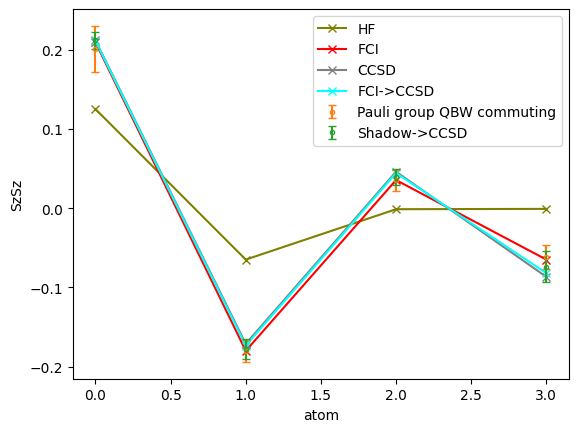

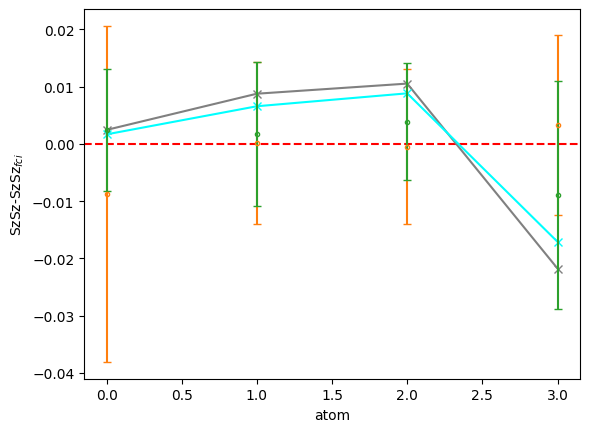

In [25]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0","1","2","3"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")

    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[:36].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[:36].std()

    shadow_ccsd_mean=((data["CS_CCSD"]))[:36].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[:36].std()

    shadow_ccsdt_mean=((data["CS_CCSDT"])).mean()
    shadow_ccsdt_std=((data["CS_CCSDT"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    shadow_ccsdt_list.append(shadow_ccsdt_mean)
    shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)


# plt.errorbar(range(4),hf_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
# plt.errorbar(range(4),hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
# plt.errorbar(range(4),pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# 
# plt.plot(c0_list,hf_list,c="C7",label="HF")   

plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
plt.plot(range(4),fci_list,c="red",marker="x",label="FCI")  
plt.plot(range(4),ccsd_list,c="grey",marker="x",label="CCSD")   


plt.plot(range(4),fci_ccsd_list,c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),shadow_ccsd_list,shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")
plt.xlabel("atom")
plt.ylabel("SzSz")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()


# plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
# plt.plot(range(4),fci_list,c="red",marker="x",label="FCI") 

plt.axhline(0.0,c="r",ls="--") 
plt.plot(range(4),[ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="grey",marker="x",label="CCSD")   


plt.plot(range(4),[fci_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),[pauli_qbw_list[x] - fci_list[x] for x in range(len(fci_list))],pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),[shadow_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")


plt.xlabel("atom")
plt.ylabel(r"SzSz-SzSz$_{fci}$")
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3819431/4227579641.py:27: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")


Text(0, 0.5, 'SzSz-SzSz$_{fci}$')

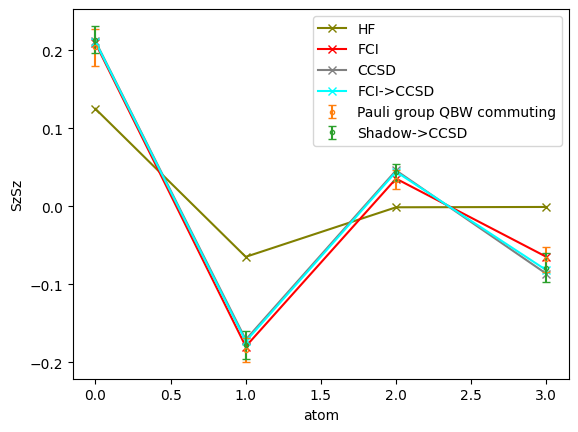

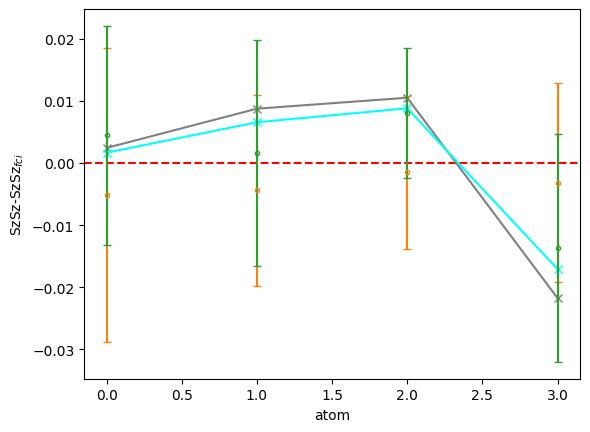

In [26]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0","1","2","3"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]

fci_list=[]
ccsd_list=[]
hf_list=[]

fci_ccsd_list=[]
fci_ccsdt_list=[]

shadow_ccsd_list=[]
shadow_ccsdt_list=[]
pauli_qbw_list=[]

shadow_ccsd_err_list = []
shadow_ccsdt_err_list = []
pauli_qbw_err_list = []

hf_list=[]
for U_str in data_files_list:
    data = pd.read_csv("SzSz_0"+U_str+"_H_4_d_1.5_nshots_1000.dat", sep="\s+")

    # c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["FCI"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["HF"])).mean()

    fci_ccsd_mean=data["FCI_CCSD"].mean()
    fci_ccsdt_mean=data["FCI_CCSDT"].mean()


    pauli_qbw_mean=((data["Pauli_group_qwc"]))[36:].mean()
    pauli_qbw_std=((data["Pauli_group_qwc"]))[36:].std()

    shadow_ccsd_mean=((data["CS_CCSD"]))[36:].mean()
    shadow_ccsd_std=((data["CS_CCSD"]))[36:].std()

    shadow_ccsdt_mean=((data["CS_CCSDT"])).mean()
    shadow_ccsdt_std=((data["CS_CCSDT"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)

    fci_ccsd_list.append(fci_ccsd_mean)
    fci_ccsdt_list.append(fci_ccsdt_mean)
    
    shadow_ccsd_list.append(shadow_ccsd_mean)
    shadow_ccsd_err_list.append(shadow_ccsd_std)

    shadow_ccsdt_list.append(shadow_ccsdt_mean)
    shadow_ccsdt_err_list.append(shadow_ccsdt_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)


# plt.errorbar(range(4),hf_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
# plt.errorbar(range(4),hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
# plt.errorbar(range(4),pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# 
# plt.plot(c0_list,hf_list,c="C7",label="HF")   

plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
plt.plot(range(4),fci_list,c="red",marker="x",label="FCI")  
plt.plot(range(4),ccsd_list,c="grey",marker="x",label="CCSD")   


plt.plot(range(4),fci_ccsd_list,c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),shadow_ccsd_list,shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")
plt.xlabel("atom")
plt.ylabel("SzSz")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()


# plt.plot(range(4),hf_list,c="olive",marker="x",label="HF")
# plt.plot(range(4),fci_list,c="red",marker="x",label="FCI") 

plt.axhline(0.0,c="r",ls="--") 
plt.plot(range(4),[ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="grey",marker="x",label="CCSD")   


plt.plot(range(4),[fci_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],c="cyan",marker="x",label="FCI->CCSD")
# plt.plot(range(4),fci_ccsdt_list,c="teal",marker="x",label="FCI->CCSDT")


plt.errorbar(range(4),[pauli_qbw_list[x] - fci_list[x] for x in range(len(fci_list))],pauli_qbw_err_list,capsize=3.,c="C1",marker=".",mfc="none",ls="none",label="Pauli group QBW commuting")
plt.errorbar(range(4),[shadow_ccsd_list[x] - fci_list[x] for x in range(len(fci_list))],shadow_ccsd_err_list,capsize=3.,c="C2",marker=".",mfc="none",ls="none",label="Shadow->CCSD")


plt.xlabel("atom")
plt.ylabel(r"SzSz-SzSz$_{fci}$")
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hyd1d_12qb_300shots_new_style.png",bbox_inches="tight",dpi=500)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3819431/424065460.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("SzSz_00_H_4_d_1.5_nshots_1000.dat", sep="\s+")


<ErrorbarContainer object of 3 artists>

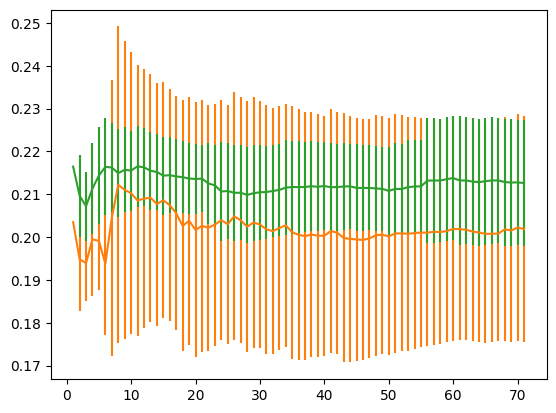

In [29]:
qbw_means=[]
qbw_stds=[]

cs_ccsd_means=[]
cs_ccsd_stds=[]

data = pd.read_csv("SzSz_00_H_4_d_1.5_nshots_1000.dat", sep="\s+")
for n in range(72):
    qbw_means.append(((data["Pauli_group_qwc"]))[:n].mean())
    qbw_stds.append(((data["Pauli_group_qwc"]))[:n].std())

    cs_ccsd_means.append(((data["CS_CCSD"]))[:n].mean())
    cs_ccsd_stds.append(((data["CS_CCSD"]))[:n].std())

plt.errorbar(range(72),qbw_means,qbw_stds,c="C1")
plt.errorbar(range(72),cs_ccsd_means,cs_ccsd_stds,c="C2")    